## Intermediate time point analysis D12, 14, 24, and 26 from protocol 1 and protocol 2

In [1]:
library(Seurat)
library(clustree)
library(scrattch.vis)
library(ggrastr)
library(pheatmap)
library(ggExtra)
library(glue)
library(reshape)
library(GGally)
library(gridExtra)

Loading required package: ggplot2

Loading required package: cowplot


********************************************************

Note: As of version 1.0.0, cowplot does not change the

  default ggplot2 theme anymore. To recover the previous

  behavior, execute:
  theme_set(theme_cowplot())

********************************************************


Loading required package: Matrix

Loading required package: ggraph

Loading required package: dplyr


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Loading required package: ggbeeswarm

Loading required package: purrr


Attaching package: ‘glue’


The following object is masked from ‘package:dplyr’:

    collapse



Attaching package: ‘reshape’


The following object is masked from ‘package:dplyr’:

    rename


The following object is masked from ‘package:Matrix’:

    expand


The follo

In [2]:
SAVE=TRUE

PNG_DIR = "plots/pngs"
SVG_DIR = "plots/svgs"
PDF_DIR = "plots/heatmap_pdfs"

if (SAVE) {
    dir.create("plots/pngs")
    dir.create("plots/svgs")
    dir.create("plots/heatmap_pdfs")
}

Warning message in dir.create("plots/pngs"):
“'plots/pngs' already exists”
Warning message in dir.create("plots/svgs"):
“'plots/svgs' already exists”
Warning message in dir.create("plots/heatmap_pdfs"):
“'plots/heatmap_pdfs' already exists”


Load data

In [3]:
load("../protocol_experiment_cell_line_comparison/both_protocols_seq_exp1_paper_figures.RData")

In [5]:
table(cardio@meta.data$day)


 D12  D14  D24  D26 
5494 5135 2493 2756 

Load plotting scripts

In [ ]:
source("/allen/aics/gene-editing/Manuscripts/Transcriptomics_2019/scrnaseq_supplement/cardio_scrnaseq_code/scripts/plotting/plot_utils.R")

Make data frame for plots

In [ ]:
umap_embeddings = as.data.frame(GetCellEmbeddings(object = cardio, reduction.type = "umap", dims.use = 1:2, cells.use = colnames(cardio@data)))
umap_embeddings = cbind(umap_embeddings, cardio@meta.data[, c("day", "protocol", "cell_line", "seq_exp", "res.0.4", "res.0.8", "diff_exp", "sample_num", "nGene", "nUMI")])

# add genes for plotting
umap_embeddings$tnnt2 = cardio@data["TNNT2", ]
umap_embeddings$cdh1 = cardio@data["CDH1", ]
umap_embeddings$mki67 = cardio@data["MKI67", ]
umap_embeddings$sox2 = cardio@data["SOX2", ]
umap_embeddings$myh6 = cardio@data["MYH6", ]
umap_embeddings$myh7 = cardio@data["MYH7", ]

In [6]:
set.seed(40)

In [7]:
cardio@meta.data$res.0.4 = factor(cardio@meta.data$res.0.4, levels = c("0", "1", "2", "3", "7", "4", "5", "9", "6", "10", "8"))

### Figure 4A

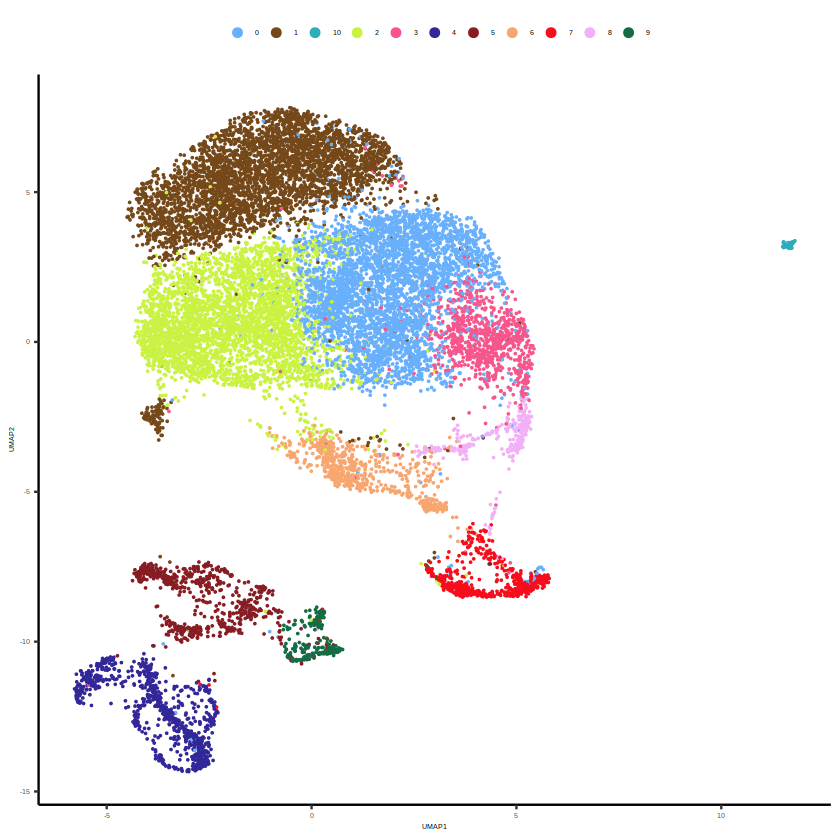

In [9]:
p.cluster = make_umap_subset(umap_embeddings[sample(nrow(umap_embeddings), replace=FALSE), ],
                             point_size = 0.00005,
                             font_size=4,
                             guide_size=2,
                             rasterize = FALSE,
                             color="res.0.4",
                             values = c("0" = "#68AFFC",
                            "1" = "#754819",
                            "10" = "#2DADB8",
                            "2" = "#CAF243",
                            "3" = "#F6568B",
                            "4" = "#322799",
                            "5" = "#881C23",
                            "6" = "#F8A670",
                            "7" = "#F70C1B",
                            "8" = "#F2B0F6",
                            "9" = "#146C45"
                           ))
p.cluster

if (SAVE) {
    ggsave(p.cluster, filename = glue("{SVG_DIR}/figure_4B_cluster_umap.svg"), device = "svg", width = 4, height=4.2, dpi = 300)
    ggsave(p.cluster, filename = glue("{PNG_DIR}/figure_4B_cluster_umap.png"), device = "png", width = 4, height=4.2, dpi = 300)
}

### Figure C

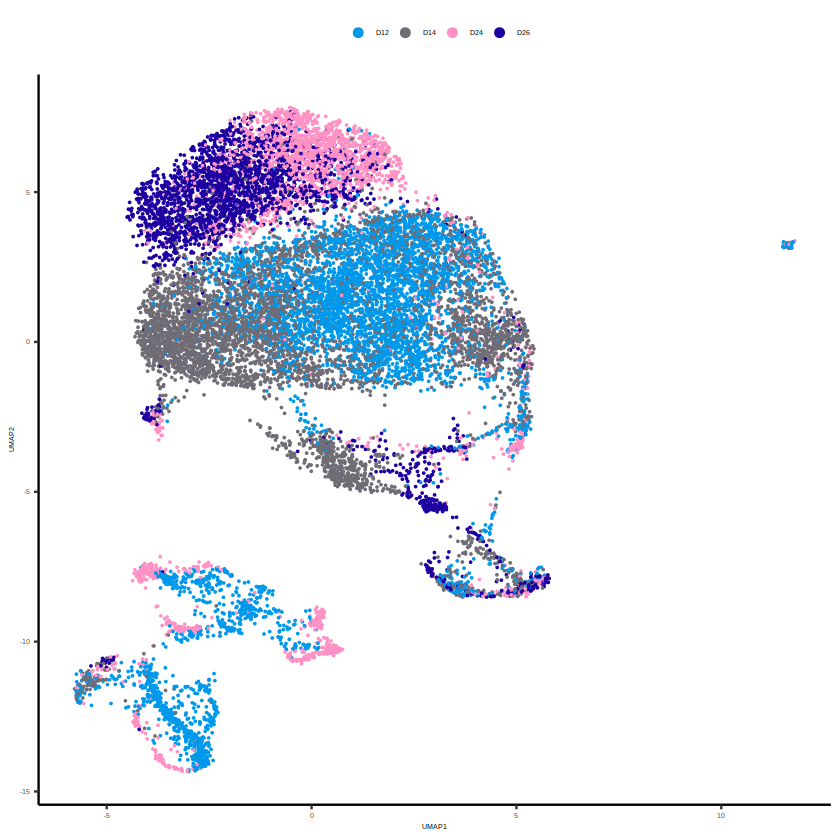

In [10]:
p.day = make_umap_subset(umap_embeddings[sample(nrow(umap_embeddings), replace=FALSE), ],
                         point_size = 0.00005,
                         font_size=4,
                         guide_size=2,
                         rasterize = FALSE,
                         color="day",
                         values = c("D12" = "#0098EA",
                            "D14" = "#706C75",
                            "D24" = "#FF91C4",
                            "D26" = "#1D009F"
                                  ))
p.day

if (SAVE) {
    ggsave(p.day, filename = glue("{SVG_DIR}/figure_4C_day_umap.svg"), device = "svg", width = 4, height=4.2, dpi = 300)
    ggsave(p.day, filename = glue("{PNG_DIR}/figure_4C_day_umap.png"), device = "png", width = 4, height=4.2, dpi = 300)
}

### Figure 4D

In [11]:
cluster_color_df = read.csv("../protocol_experiment_cell_line_comparison/cluster_colors.csv")
cluster_color_df$cluster = as.character(cluster_color_df$cluster)

In [14]:
group_order = c("0", "1", "2", "3", "7", "4", "5", "9", "6", "10", "8")
genes.plot = c("MKI67", "TNNT2", "MYH6", "MYH7", "TRPM3", "FN1", "AFP", "GRHL2", "CTNNA2", "EGFL7")

p.violin = cluster_group_violin(cardio,
                     group_order=group_order,
                     resolution="res.0.4",
                     genes.plot=genes.plot,
                     cluster_color_df=cluster_color_df
                    )

if (SAVE) {
    ggsave(p.violin, filename = glue("{SVG_DIR}/figure_4D_cell_type_violin.svg"), device = "svg", width = 6, height=5.5, dpi = 300)
    ggsave(p.violin, filename = glue("{PNG_DIR}/figure_4D_cell_type_violin.png"), device = "png", width = 6, height=5.5, dpi = 300)
}

Warning message:
“`fun.y` is deprecated. Use `fun` instead.”
Warning message:
“`fun.ymin` is deprecated. Use `fun.min` instead.”
Warning message:
“`fun.ymax` is deprecated. Use `fun.max` instead.”
Warning message:
“`fun.y` is deprecated. Use `fun` instead.”
Warning message:
“`fun.ymin` is deprecated. Use `fun.min` instead.”
Warning message:
“`fun.ymax` is deprecated. Use `fun.max` instead.”
Warning message:
“`fun.y` is deprecated. Use `fun` instead.”
Warning message:
“`fun.ymin` is deprecated. Use `fun.min` instead.”
Warning message:
“`fun.ymax` is deprecated. Use `fun.max` instead.”
Warning message:
“`fun.y` is deprecated. Use `fun` instead.”
Warning message:
“`fun.ymin` is deprecated. Use `fun.min` instead.”
Warning message:
“`fun.ymax` is deprecated. Use `fun.max` instead.”
Warning message:
“`fun.y` is deprecated. Use `fun` instead.”
Warning message:
“`fun.ymin` is deprecated. Use `fun.min` instead.”
Warning message:
“`fun.ymax` is deprecated. Use `fun.max` instead.”
Warning message

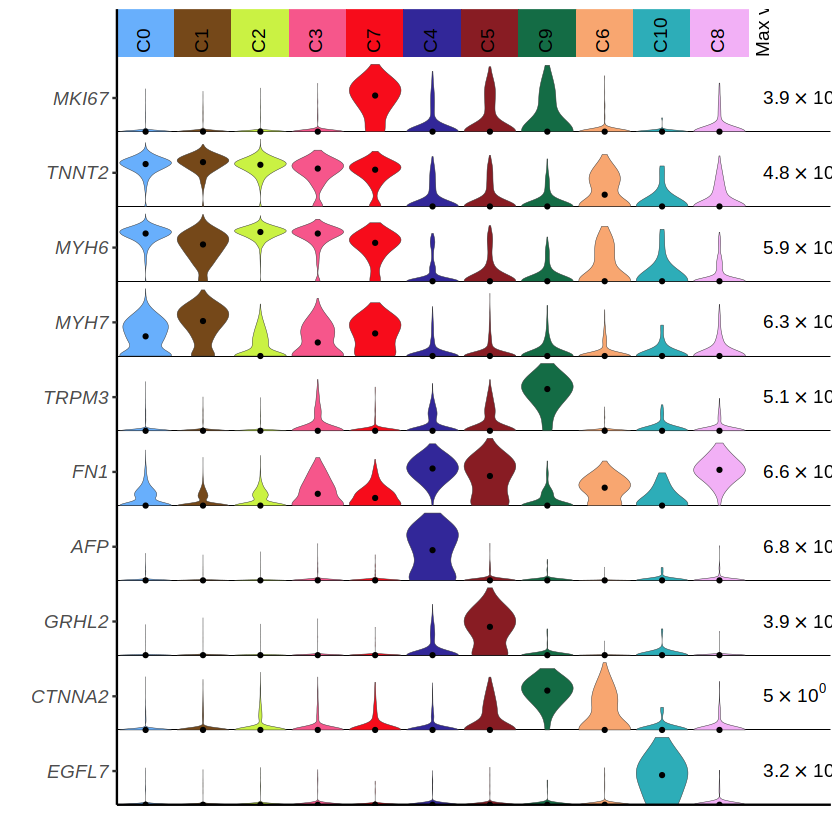

In [15]:
p.violin

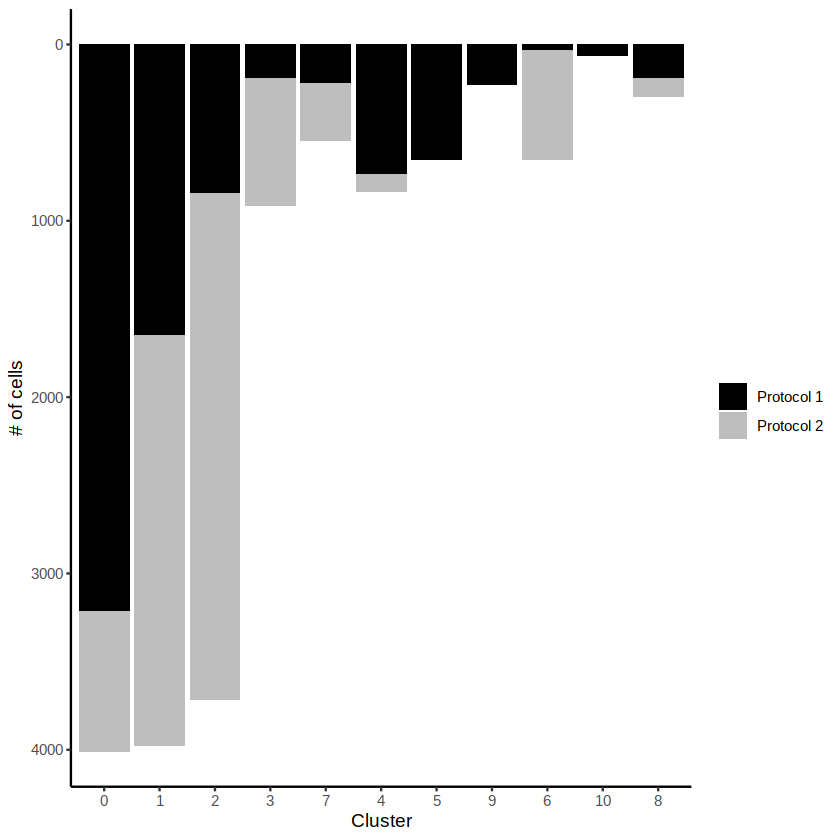

In [16]:
p.cluster_breakdown_protocol <- ggplot(cardio@meta.data,
                            aes(x = factor(res.0.4, levels = c("0", "1", "2", "3", "7", "4", "5", "9", "6", "10", "8")),
                                fill = protocol)) +
    geom_bar() +
    scale_fill_manual(name="",
                      breaks = c("SM", "C"),
                      labels = c("Protocol 1", "Protocol 2"),
                      values = c("SM" = "black",
                                 "C" = "gray"
                                )) +
    guides(color = guide_legend(nrow = 1, override.aes = list(size=4))) +
    theme(legend.text = element_text(size = 13)) + 
    theme(legend.position = "top", legend.justification = "center") +
    theme(text = element_text(size = 13), axis.text = element_text(size = 13)) +
    theme_bw() + theme(panel.border = element_blank(), panel.grid.major = element_blank(),
    panel.grid.minor = element_blank(), axis.line = element_line(colour = "black")) +
    xlab("Cluster") +
    ylab("# of cells") +
    scale_y_reverse()

plot(p.cluster_breakdown_protocol)

if (SAVE) {
    ggsave(p.cluster_breakdown_protocol, filename = glue("{SVG_DIR}/figure_4D_cluster_by_protocol.svg"), device = "svg", width = 4, height=1.5, dpi = 300)
    ggsave(p.cluster_breakdown_protocol, filename = glue("{PNG_DIR}/figure_4D_cluster_by_protocol.png"), device = "png", width = 4, height=1.5, dpi = 300)
}

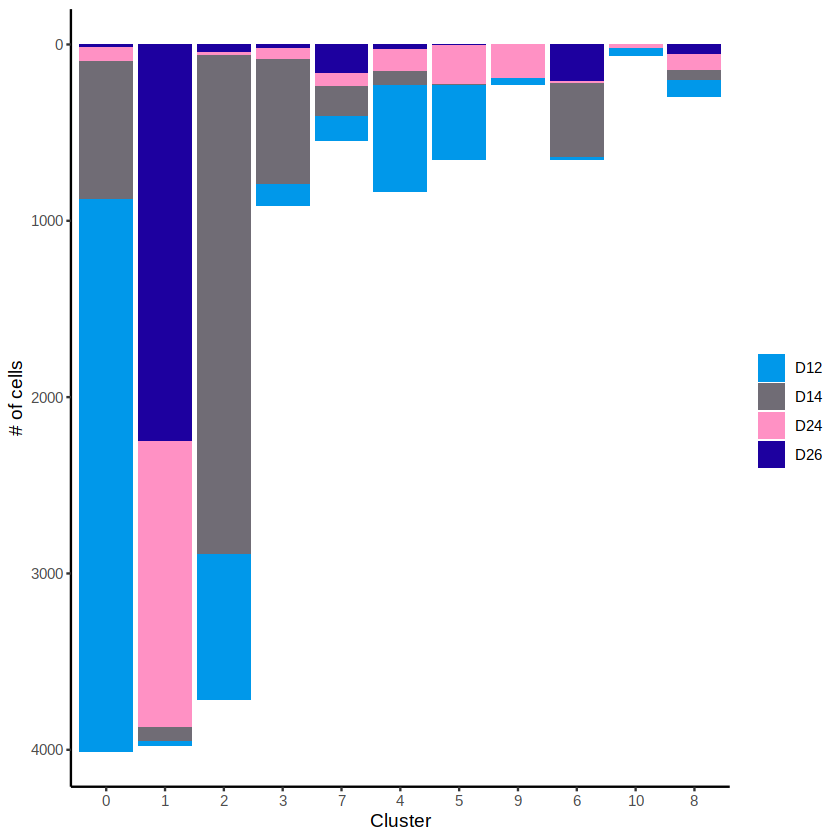

In [17]:
p.cluster_breakdown_day <- ggplot(cardio@meta.data,
                            aes(x = factor(res.0.4, levels = c("0", "1", "2", "3", "7", "4", "5", "9", "6", "10", "8")),
                                fill = day)) +
    geom_bar() +
    scale_fill_manual(name = "",
                      breaks = c("D12", "D14", "D24", "D26"), 
                      values = c(
                          "D12" = "#0098EA",
                          "D14" = "#706C75",
                          "D24" = "#FF91C4",
                          "D26" = "#1D009F"
                     ))+
    guides(color = guide_legend(nrow = 1, override.aes = list(size=4))) +
    theme(legend.text = element_text(size = 13)) + 
    theme(legend.position = "top", legend.justification = "center") +
    theme(text = element_text(size = 13), axis.text = element_text(size = 13)) +
    theme_bw() + theme(panel.border = element_blank(), panel.grid.major = element_blank(),
    panel.grid.minor = element_blank(), axis.line = element_line(colour = "black")) +
    xlab("Cluster") +
    ylab("# of cells") +
    scale_y_reverse()

plot(p.cluster_breakdown_day)

if (SAVE) {
    ggsave(p.cluster_breakdown_day, filename = glue("{SVG_DIR}/figure_4D_cluster_by_day.svg"), device = "svg", width = 4, height=1.5, dpi = 300)
    ggsave(p.cluster_breakdown_day, filename = glue("{PNG_DIR}/figure_4D_cluster_by_day.png"), device = "png", width = 4, height=1.5, dpi = 300)
}

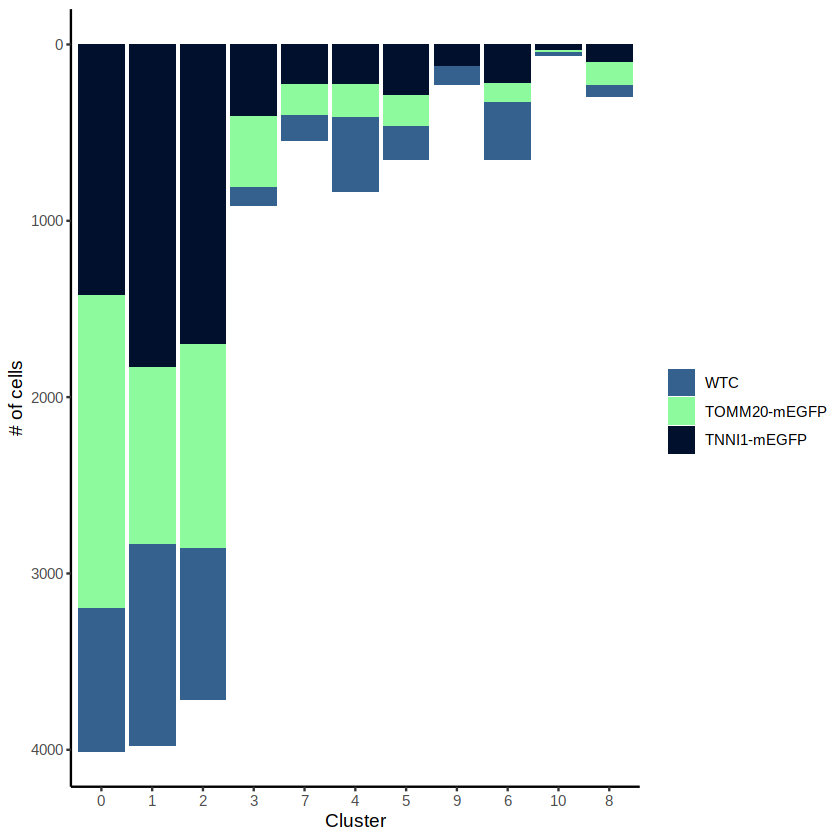

In [18]:
p.cluster_breakdown_cellline <- ggplot(cardio@meta.data,
                            aes(x = factor(res.0.4, levels = c("0", "1", "2", "3", "7", "4", "5", "9", "6", "10", "8")),
                                fill = cell_line)) +
    geom_bar() +
    scale_fill_manual(name = "",
                      breaks = c("AICS0", "AICS11", "AICS37"),
                      labels = c("WTC", "TOMM20-mEGFP", "TNNI1-mEGFP"),
                      values = c("AICS0" = "#35618F", "AICS11" = "#8DFA9D", "AICS37" = "#01102C")
                     ) +
    guides(color = guide_legend(nrow = 1, override.aes = list(size=4))) +
    theme(legend.text = element_text(size = 13)) + 
    theme(legend.position = "top", legend.justification = "center") +
    theme(text = element_text(size = 13), axis.text = element_text(size = 13)) +
    theme_bw() + theme(panel.border = element_blank(), panel.grid.major = element_blank(),
    panel.grid.minor = element_blank(), axis.line = element_line(colour = "black")) +
    xlab("Cluster") +
    ylab("# of cells") +
    scale_y_reverse()

plot(p.cluster_breakdown_cellline)

if (SAVE) {
    ggsave(p.cluster_breakdown_cellline, filename = glue("{SVG_DIR}/figure_4D_cluster_by_cell_line.svg"), device = "svg", width = 4, height=1.5, dpi = 300)
    ggsave(p.cluster_breakdown_cellline, filename = glue("{PNG_DIR}/figure_4D_cluster_by_cell_line.png"), device = "png", width = 4, height=1.5, dpi = 300)
}

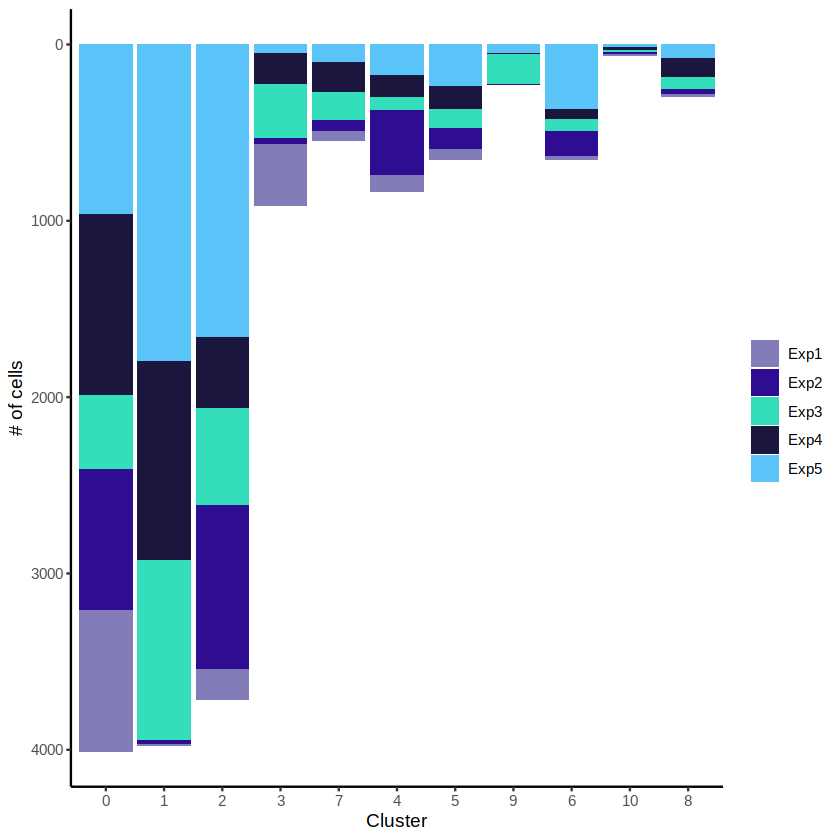

In [19]:
p.cluster_breakdown_diffexp <- ggplot(cardio@meta.data,
                            aes(x = factor(res.0.4, levels = c("0", "1", "2", "3", "7", "4", "5", "9", "6", "10", "8")),
                                fill = diff_exp)) +
    geom_bar() +
    scale_fill_manual(name = "",
                      breaks = c("7_10_2017", "7_13_2017", "7_20_2017", "7_24_2017", "7_27_2017"),
                      labels = c("Exp1", "Exp2", "Exp3", "Exp4", "Exp5"),
                      values = c("7_10_2017" = "#827DB8",
                                 "7_13_2017" = "#2E0D93",
                                 "7_20_2017" = "#34DEBB",
                                 "7_24_2017" = "#1A163E",
                                 "7_27_2017" = "#5AC4F8"
                                )
                                             ) +
    guides(color = guide_legend(nrow = 1, override.aes = list(size=4))) +
    theme(legend.text = element_text(size = 13)) + 
    theme(legend.position = "top", legend.justification = "center") +
    theme(text = element_text(size = 13), axis.text = element_text(size = 13)) +
    theme_bw() + theme(panel.border = element_blank(), panel.grid.major = element_blank(),
    panel.grid.minor = element_blank(), axis.line = element_line(colour = "black")) +
    xlab("Cluster") +
    ylab("# of cells") +
    scale_y_reverse()

plot(p.cluster_breakdown_diffexp)

if (SAVE) {
    ggsave(p.cluster_breakdown_diffexp, filename = glue("{SVG_DIR}/figure_4D_cluster_by_diff_exp.svg"), device = "svg", width = 4, height=1.5, dpi = 300)
    ggsave(p.cluster_breakdown_diffexp, filename = glue("{PNG_DIR}/figure_4D_cluster_by_diff_exp.png"), device = "png", width = 4, height=1.5, dpi = 300)
}

### Figure 5A Correlation b/w cell lines

In [20]:
unique(cardio@meta.data$cell_line)

[1] "AICS11" "AICS37" "AICS0"

In [25]:
cells_AICS0 <- rownames(cardio@meta.data[cardio@meta.data$cell_line == "AICS0", ])
cells_AICS37 <- rownames(cardio@meta.data[cardio@meta.data$cell_line == "AICS37", ])
cells_AICS11 <- rownames(cardio@meta.data[cardio@meta.data$cell_line == "AICS11", ])

In [26]:
mat_AICS0 <- cardio@raw.data[, cells_AICS0]
mat_AICS37<- cardio@raw.data[, cells_AICS37]
mat_AICS11 <- cardio@raw.data[, cells_AICS11]

In [27]:
cell_line_df <- data.frame("WTC" = log(rowSums(mat_AICS0) + 1),
                     "TNNI1-mEGFP" = log(rowSums(mat_AICS37) + 1),
                     "TOMM20-mEGFP" = log(rowSums(mat_AICS11) + 1)
                     )

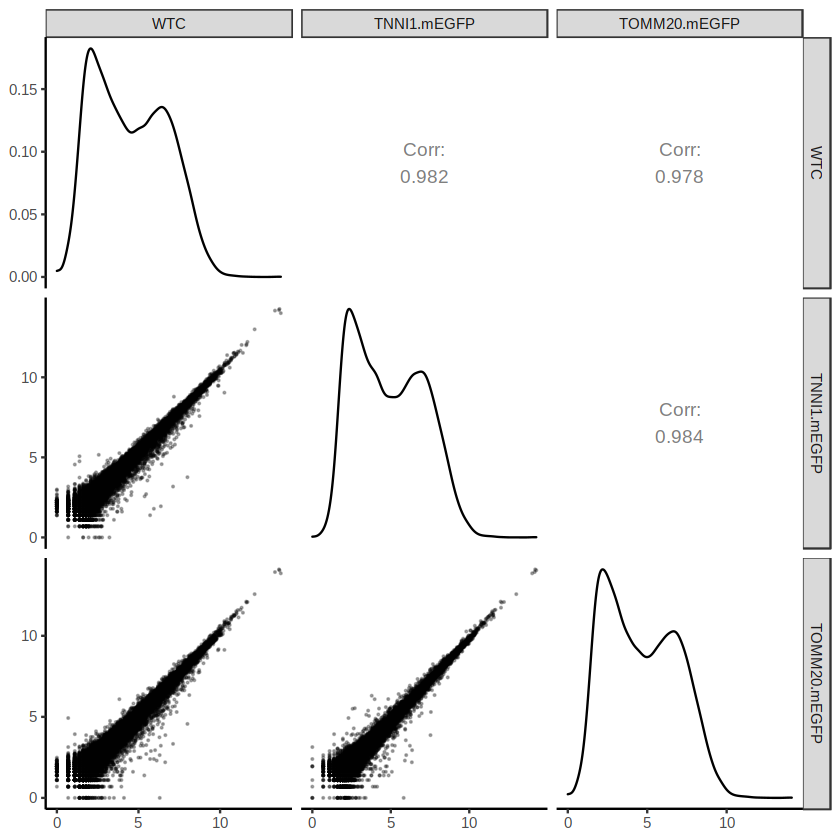

In [28]:
p.corr_cellline <- ggpairs(cell_line_df, lower = list(continuous = wrap("points", alpha = 0.3, size=0.1)),
        upper = list(continuous = wrap("cor", size = 4, method = "spearman"))
       ) +
        theme(text = element_text(size = 13), axis.text = element_text(size = 13)) +
        theme_bw() + theme(panel.border = element_blank(), panel.grid.major = element_blank(),
        panel.grid.minor = element_blank(), axis.line = element_line(colour = "black"))

p.corr_cellline

if (SAVE) {
    ggsave(p.corr_cellline, filename = glue("{SVG_DIR}/figure_5A_cell_line_population_spearman.svg"), device = "svg", width = 5, height=5, dpi = 300)
    ggsave(p.corr_cellline, filename = glue("{PNG_DIR}/figure_5A_cell_line_population_spearman.png"), device = "png", width = 5, height=5, dpi = 300)
}

In [65]:
p.aics11 = plot_single_cell_line(umap_embeddings, "AICS11", point_size=0.00005)
p.aics0 = plot_single_cell_line(umap_embeddings, "AICS0", point_size=0.00005)
p.aics37 = plot_single_cell_line(umap_embeddings, "AICS37", point_size=0.00005)

In [66]:
options(repr.plot.width = 10, repr.plot.height = 3, repr.plot.res = 120)

In [ ]:
p.line_combo = grid.arrange(p.aics0, p.aics37, p.aics11, nrow=1)
if (SAVE) {
    ggsave(p.line_combo, filename = glue("{SVG_DIR}/figure_5A_cell_line_mini_umaps.svg"), device = "svg", width = 4, height=1.2, dpi = 300)
    ggsave(p.line_combo, filename = glue("{PNG_DIR}/figure_5A_cell_line_mini_umaps.png"), device = "png", width = 4, height=1.2, dpi = 300)
}

restore defaults

In [68]:
options(repr.plot.width = 7, repr.plot.height = 7, repr.plot.res = 120)

### Figure 5B D12 experiments

In [70]:
diff_exp_color_df = data.frame("diff_exp" = c("7_10_2017", "7_13_2017", "7_20_2017", "7_24_2017", "7_27_2017"),
                             "diff_exp_color" = c("#827DB8", "#2E0D93", "#34DEBB", "#1A163E", "#5AC4F8"))

In [71]:
diff_exp_color_df$diff_exp = as.character(diff_exp_color_df$diff_exp)

In [72]:
# load D12 Seurat
load("../protocol_experiment_cell_line_comparison/plots/experiment_comparison/D12/D12_experiments_cardio_clusters.RData")

In [73]:
subset_cardio

An object of class seurat in project CardioDiff 
 28786 genes across 4259 samples.

In [74]:
D12_umap_embeddings <- as.data.frame(GetCellEmbeddings(object = subset_cardio, reduction.type = "umap", dims.use = 1:2, cells.use = colnames(subset_cardio@data)))
D12_umap_embeddings <- cbind(D12_umap_embeddings, subset_cardio@meta.data[, c("day", "protocol", "cell_line", "seq_exp", "res.0.4", "res.0.5", "res.0.6", "res.0.8", "diff_exp", "nGene", "nUMI", "sample_num")])
D12_umap_embeddings$tnnt2 <- subset_cardio@data["TNNT2", ]
D12_umap_embeddings$cdh1 <- subset_cardio@data["CDH1", ]
D12_umap_embeddings$mki67 <- subset_cardio@data["MKI67", ]
D12_umap_embeddings$sox2 <- subset_cardio@data["SOX2", ]
D12_umap_embeddings$myh6 <- subset_cardio@data["MYH6", ]
D12_umap_embeddings$myh7 <- subset_cardio@data["MYH7", ]
D12_umap_embeddings$mki67 <- subset_cardio@data["MKI67", ]

In [75]:
unique(D12_umap_embeddings$res.0.4)

[1] "4" "0" "1" "2" "3"

In [81]:
source("/allen/aics/gene-editing/Manuscripts/Transcriptomics_2019/scrnaseq_supplement/cardio_scrnaseq_code/scripts/plotting/plot_utils.R")

In [86]:
p.single_exp1 = plot_single_exp(D12_umap_embeddings, "7_10_2017", point_size = 1)
p.single_exp2 = plot_single_exp(D12_umap_embeddings, "7_13_2017", point_size = 1)
p.single_exp3 = plot_single_exp(D12_umap_embeddings, "7_20_2017", point_size = 1)
p.single_exp4 = plot_single_exp(D12_umap_embeddings, "7_24_2017", point_size = 1)
p.single_exp5 = plot_single_exp(D12_umap_embeddings, "7_27_2017", point_size = 1)

p.cluster_d12 = make_umap_subset(D12_umap_embeddings[sample(nrow(D12_umap_embeddings), replace=FALSE), ], point_size = 1,
                                 font_size=4,
                                 guide_size=2,
                 color="res.0.4", 
                 values = c("0" = "#68AFFC",
                            "1" = "#754819",
                            "10" = "#2DADB8",
                            "2" = "#CAF243",
                            "3" = "#F6568B",
                            "4" = "#322799",
                            "5" = "#881C23",
                            "6" = "#F8A670",
                            "7" = "#F70C1B",
                            "8" = "#F2B0F6",
                            "9" = "#146C45"
                           ))

bar_cluster_by_cell_line <- ggplot(D12_umap_embeddings, aes(x = res.0.4, fill = cell_line)) + geom_bar() +
    scale_fill_manual(name = "",
                             breaks = c("AICS0", "AICS11", "AICS37"), 
                             labels = c("WTC", "TOMM20-mEGFP", "TNNI1-mEGFP"),
                             values = c("AICS0" = "#35618F", "AICS11" = "#8DFA9D", "AICS37" = "#01102C")
                            ) +
    guides(fill = guide_legend(nrow = 1, override.aes = list(size=4))) +
    theme_bw() + theme(panel.border = element_blank(), panel.grid.major = element_blank(),
    panel.grid.minor = element_blank(), axis.line = element_line(colour = "black")) +
    theme(legend.position = "top") +
    xlab("cluster") +
    scale_y_reverse()

bar_cluster_by_diff_exp <- ggplot(D12_umap_embeddings, aes(x = res.0.4, fill = diff_exp)) + geom_bar() +
                            scale_fill_manual(name = "",
                                              breaks = c("7_10_2017", "7_13_2017", "7_20_2017", "7_24_2017", "7_27_2017"), 
                                              labels = c("Exp1", "Exp2", "Exp3", "Exp4", "Exp5"),
                                              values = c("7_10_2017" = "#827DB8",
                                                         "7_13_2017" = "#2E0D93",
                                                         "7_20_2017" = "#34DEBB",
                                                         "7_24_2017" = "#1A163E",
                                                         "7_27_2017" = "#5AC4F8"
                                                        )
                                             ) +
                     guides(fill = guide_legend(nrow = 1, override.aes = list(size=4))) +
                     theme_bw() + theme(panel.border = element_blank(), panel.grid.major = element_blank(),
                     panel.grid.minor = element_blank(), axis.line = element_line(colour = "black")) +
                     theme(legend.position = "top") +
                     xlab("cluster") +
                     scale_y_reverse()

group_order = c("0", "1", "2", "3", "4")
genes.plot = c("MKI67", "TNNT2", "MYH6", "MYH7")

p.violin_d12 = cluster_group_violin(subset_cardio,
                     group_order=group_order,
                     resolution="res.0.4",
                     genes.plot=genes.plot,
                     cluster_color_df=cluster_color_df
                    )

Warning message:
“Column `cluster_id` joining character vector and factor, coercing into character vector”
Warning message:
“`fun.y` is deprecated. Use `fun` instead.”
Warning message:
“`fun.ymin` is deprecated. Use `fun.min` instead.”
Warning message:
“`fun.ymax` is deprecated. Use `fun.max` instead.”
Warning message:
“`fun.y` is deprecated. Use `fun` instead.”
Warning message:
“`fun.ymin` is deprecated. Use `fun.min` instead.”
Warning message:
“`fun.ymax` is deprecated. Use `fun.max` instead.”
Warning message:
“`fun.y` is deprecated. Use `fun` instead.”
Warning message:
“`fun.ymin` is deprecated. Use `fun.min` instead.”
Warning message:
“`fun.ymax` is deprecated. Use `fun.max` instead.”
Warning message:
“`fun.y` is deprecated. Use `fun` instead.”
Warning message:
“`fun.ymin` is deprecated. Use `fun.min` instead.”
Warning message:
“`fun.ymax` is deprecated. Use `fun.max` instead.”


In [87]:
options(repr.plot.width = 10, repr.plot.height = 10, repr.plot.res = 120)

In [88]:
plot_list = list(p.single_exp1,
             p.single_exp2,
             p.single_exp3,
             p.single_exp4,
             p.single_exp5,
             p.cluster_d12,
             p.violin_d12,
             bar_cluster_by_diff_exp,
             bar_cluster_by_cell_line)

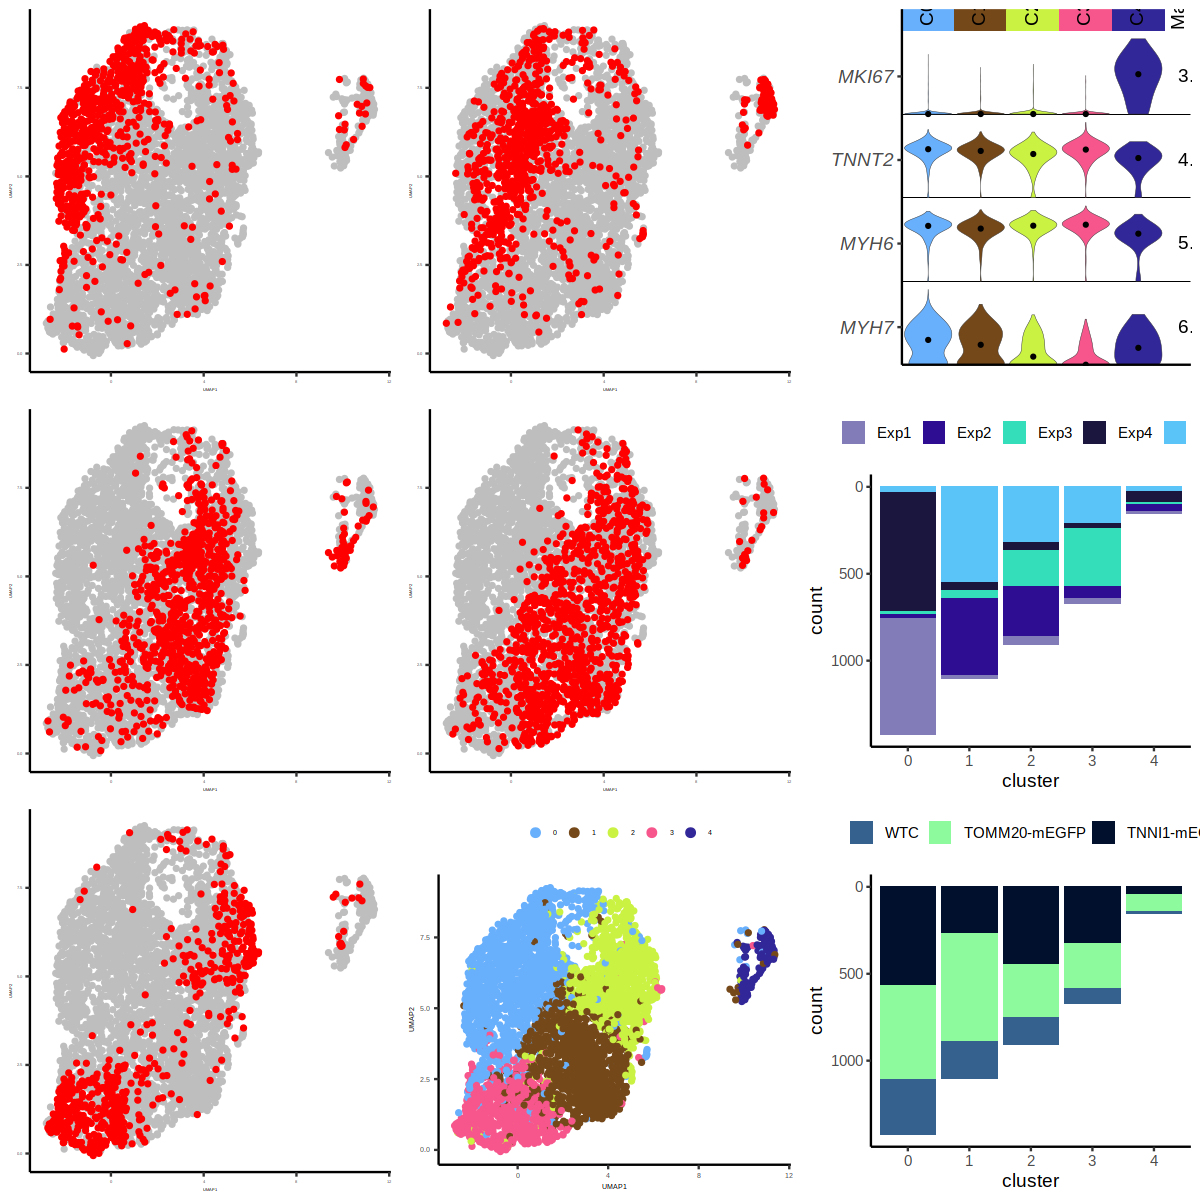

In [94]:
combo_plot = do.call("grid.arrange", c(plot_list, nrow=3, ncol=3, as.table = FALSE))
if (SAVE) {
    ggsave(combo_plot, filename = glue("{SVG_DIR}/figure_5B_D12_diff_exps.svg"), device = "svg", width = 14, height=9, dpi = 300)
    ggsave(combo_plot, filename = glue("{PNG_DIR}/figure_5B_D12_diff_exps.png"), device = "png", width = 10, height=10, dpi = 300)
}

### Figure 5C DE genes within D12 experiments

In [163]:
de_files <- list.dirs(path = "/allen/aics/gene-editing/Manuscripts/Transcriptomics_2019/scrnaseq_supplement/paper_plots/protocol_experiment_cell_line_comparison/de_analysis_d12_diff_exp/cluster_de_genes_heatmap", full.names = FALSE, recursive = TRUE)

In [164]:
top_de_genes <- sapply(X = de_files[2:length(de_files)],
                       FUN = function(x) {
                           de_genes_df <- read.csv(paste0("/allen/aics/gene-editing/Manuscripts/Transcriptomics_2019/scrnaseq_supplement/paper_plots/protocol_experiment_cell_line_comparison/de_analysis_d12_diff_exp/cluster_de_genes_heatmap/", x, "/", x, ".csv"), header = TRUE, row.names = 1, stringsAsFactors = FALSE)
                           return(rownames(de_genes_df[1:10, ]))
                       }
      )

In [165]:
markers <- unique(as.vector(top_de_genes))
markers <- markers[!is.na(markers)]
markers

[1] "ACTA1"         "TAGLN"         "MYH11"         "ACTA2"        
 [5] "NPPA"          "SCD"           "HMGCS1"        "MYL9"         
 [9] "DHCR24"        "ACTC1"         "KCNH7"         "LAMA2"        
[13] "DIAPH3"        "KCNIP2"        "ANKRD1"        "SYNPO2L"      
[17] "RP11-155G15.2" "MYH7"          "TENM3"         "FN1"          
[21] "LRP1B"         "LSAMP"         "CORIN"         "PRDM16"       
[25] "RP11-3B12.2"   "GPC3"          "TECRL"         "KCNQ3"        
[29] "CNTN5"         "MECOM"         "ADCY5"         "CREB5"        
[33] "ANGPT1"        "RP11-820L6.1"  "RELN"          "SEMA5A"       
[37] "NLGN1"

In [166]:
length(markers)

[1] 37

In [167]:
keep.cells <- rownames(subset_cardio@meta.data[subset_cardio@meta.data$res.0.4 %in% c("0", "1", "2", "3"), ])

In [168]:
top.marker.mat <- subset_cardio@scale.data[unique(markers), keep.cells]
top.marker.mat <- t(scale(t(top.marker.mat), center = TRUE, scale = TRUE))

marker.gene.names <- rownames(top.marker.mat)
top.marker.metdata <- subset_cardio@meta.data[keep.cells, c("res.0.4", "diff_exp", "day")]

top.marker.metdata$cell <- rownames(top.marker.metdata)

top.marker.metdata$Cluster <- factor(top.marker.metdata$res.0.4, levels = c("0", "1", "2", "3"
                                                                           )
                                    )
top.marker.metdata <- top.marker.metdata %>% arrange(Cluster)

In [169]:
unique(top.marker.metdata$day)

[1] "D12"

In [170]:
cells <- top.marker.metdata$cell
top.marker.metdata <- top.marker.metdata[, c("day", "Cluster", "diff_exp")]
rownames(top.marker.metdata) <- cells

In [171]:
top_marker.mat.ordered <- top.marker.mat[, cells]

In [172]:
max(top.marker.mat)

[1] 6.676043

In [173]:
min(top.marker.mat)

[1] -2.55154

In [174]:
top_marker.mat.ordered[top_marker.mat.ordered > 4] <- 4

In [175]:
table(top.marker.metdata$Cluster)


   0    1    2    3 
1424 1104  905  673 

In [176]:
table(top.marker.metdata$Cluster, top.marker.metdata$diff_exp)

   
    7_10_2017 7_13_2017 7_20_2017 7_24_2017 7_27_2017
  0       670        26        15       688        25
  1        22       445        45        46       546
  2        47       293       204        44       317
  3        39        68       334        29       203

In [177]:
palette_length <- 1000
my_palette <- colorRampPalette(c("blue", "white", "red"))(n = palette_length)

my_breaks <- c(seq(min(top_marker.mat.ordered), 0, length.out=ceiling(palette_length/2) + 1), 
              seq(max(top_marker.mat.ordered)/palette_length, max(top_marker.mat.ordered), length.out=floor(palette_length/2)))

In [178]:
options(repr.plot.width = 10, repr.plot.height = 7, repr.plot.res = 120)

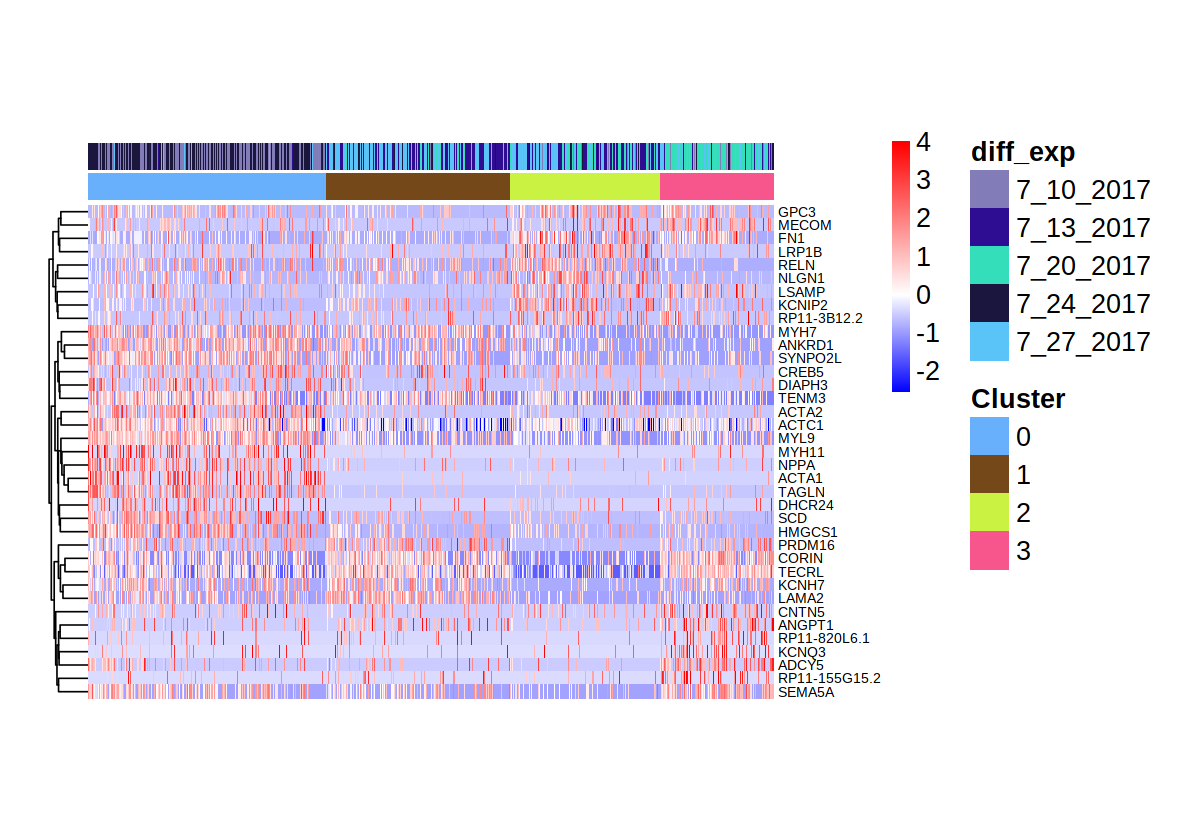

In [183]:
ann_colors <- list(
    diff_exp = c("7_10_2017" = "#827DB8", "7_13_2017" = "#2E0D93", "7_20_2017" = "#34DEBB", "7_24_2017" = "#1A163E", "7_27_2017" = "#5AC4F8"),
    Cluster = c("0" = "#68AFFC",
                "1" = "#754819",
                "2" = "#CAF243",
                "3" = "#F6568B"
               )
)
pheatmap(top_marker.mat.ordered, scale = "none",
         cluster_rows = TRUE,
         cluster_cols = FALSE,
         annotation_col = top.marker.metdata[, c("Cluster", "diff_exp")],
         labels_col = top.marker.metdata$Cluster,
         cellheight = 8,
         cellwidth = 0.1,
         fontsize_row = 8,
         color = my_palette,
         breaks = my_breaks,
         annotation_names_col = FALSE,
         show_colnames = FALSE,
         annotation_colors = ann_colors,
         border_color = NA,
         fontsize = 16,
         treeheight_row = 20
        )

if (SAVE) {
    pheatmap(top_marker.mat.ordered, scale = "none",
         cluster_rows = TRUE,
         cluster_cols = FALSE,
         annotation_col = top.marker.metdata[, c("Cluster", "diff_exp")],
         labels_col = top.marker.metdata$Cluster,
         cellheight = 8,
         cellwidth = 0.1,
         fontsize_row = 8,
         color = my_palette,
         breaks = my_breaks,
         annotation_names_col = FALSE,
         show_colnames = FALSE,
         annotation_colors = ann_colors,
         border_color = NA,
         fontsize = 16,
         treeheight_row = 20,
         filename = glue("{PDF_DIR}/figure_5C_d12_diff_exp_de_genes.pdf"),
         width = 10, height=6, dpi = 300
        )
    pheatmap(top_marker.mat.ordered, scale = "none",
         cluster_rows = TRUE,
         cluster_cols = FALSE,
         annotation_col = top.marker.metdata[, c("Cluster", "diff_exp")],
         labels_col = top.marker.metdata$Cluster,
         cellheight = 8,
         cellwidth = 0.1,
         fontsize_row = 8,
         color = my_palette,
         breaks = my_breaks,
         annotation_names_col = FALSE,
         show_colnames = FALSE,
         annotation_colors = ann_colors,
         border_color = NA,
         fontsize = 16,
         treeheight_row = 20,
         filename = glue("{PNG_DIR}/figure_5C_d12_diff_exp_de_genes.png"),
         width = 10, height=6, dpi = 300
        )
}



In [95]:
options(repr.plot.width = 7, repr.plot.height = 7, repr.plot.res = 120)

### Figure 5D protocol comparison Exp5

In [96]:
load("../protocol_experiment_cell_line_comparison/plots/protocol_comparison/7_27_2017/7_27_2017_experiments_protocol_cardio_clusters.RData")

In [97]:
exp5_umap_embeddings <- as.data.frame(GetCellEmbeddings(object = subset_cardio, reduction.type = "umap", dims.use = 1:2, cells.use = colnames(subset_cardio@data)))
exp5_umap_embeddings <- cbind(exp5_umap_embeddings, subset_cardio@meta.data[, c("day", "protocol", "cell_line", "seq_exp", "res.0.4", "res.0.5", "res.0.6", "res.0.8", "diff_exp", "nGene", "nUMI", "sample_num")])
exp5_umap_embeddings$tnnt2 <- subset_cardio@data["TNNT2", ]
exp5_umap_embeddings$cdh1 <- subset_cardio@data["CDH1", ]
exp5_umap_embeddings$mki67 <- subset_cardio@data["MKI67", ]
exp5_umap_embeddings$sox2 <- subset_cardio@data["SOX2", ]
exp5_umap_embeddings$myh6 <- subset_cardio@data["MYH6", ]
exp5_umap_embeddings$myh7 <- subset_cardio@data["MYH7", ]
exp5_umap_embeddings$mki67 <- subset_cardio@data["MKI67", ]

In [98]:
subset_cardio

An object of class seurat in project CardioDiff 
 28786 genes across 4548 samples.

In [99]:
unique(exp5_umap_embeddings$res.0.4)

[1] "2" "1" "3" "4" "5" "0" "6"

In [100]:
unique(exp5_umap_embeddings$sample_num)

[1] "21" "23" "28" "27" "45" "26" "48" "40" "22" "44" "46" "43" "41" "39" "24"
[16] "25" "42" "47"

In [101]:
exp5_umap_embeddings$res.0.4 = factor(exp5_umap_embeddings$res.0.4, levels = c("2", "1", "4", "3", "0", "5", "6"))

In [106]:
p.cluster_exp5 = make_umap_subset(exp5_umap_embeddings[sample(nrow(exp5_umap_embeddings), replace=FALSE), ], point_size = 1,
                                  font_size=4,
                                  guide_size=2,
                                  rasterize=FALSE,
                 color="res.0.4", 
                 values = c("0" = "#68AFFC",
                            "1" = "#754819",
                            "10" = "#2DADB8",
                            "2" = "#CAF243",
                            "3" = "#F6568B",
                            "4" = "#322799",
                            "5" = "#881C23",
                            "6" = "#F8A670",
                            "7" = "#F70C1B",
                            "8" = "#F2B0F6",
                            "9" = "#146C45"
                           ))

p.day_exp5 = make_umap_subset(exp5_umap_embeddings[sample(nrow(exp5_umap_embeddings), replace=FALSE), ], point_size = 1,
                              font_size=4,
                              guide_size=2,
                              rasterize=FALSE,
                 color="day", 
                 values = c("D12" = "#0098EA",
                            "D14" = "#706C75",
                            "D24" = "#FF91C4",
                            "D26" = "#1D009F"
                           ))

bar_cluster_by_sample <- ggplot(exp5_umap_embeddings, aes(x = res.0.4, fill = as.factor(sample_num))) + geom_bar() +
    scale_fill_manual(name="Sample",
        values = c("21" = "#68AFFC",
                                  "22" = "#754819",
                                  "23" = "#2DADB8",
                                  "24" = "#8270F6",
                                  "25" = "#F6EEFA",
                                  "26" = "#042C17",
                                  "27" = "#B3F1BB",
                                  "28" = "#0A60A8",
                                  "39" = "#64AF5C",
                                  "40" = "#CAF243",
                                  "41" = "#F6568B",
                                  "42" = "#322799",
                                  "43" = "#881C23",
                                  "44" = "#F8A670",
                                  "45" = "#F70C1B",
                                  "46" = "#F2B0F6",
                                  "47" = "#146C45",
                                  "48" = "gray"
                                  )) +
    guides(fill = guide_legend(ncol = 1, override.aes = list(size=4))) +
    theme_bw() + theme(panel.border = element_blank(), panel.grid.major = element_blank(),
    panel.grid.minor = element_blank(), axis.line = element_line(colour = "black")) +
    theme(legend.position = "right") +
    xlab("cluster") +
    scale_y_reverse()

bar_cluster_by_cell_line <- ggplot(exp5_umap_embeddings, aes(x = res.0.4, fill = cell_line)) + geom_bar() +
    scale_fill_manual(name = "",
                             breaks = c("AICS0", "AICS11", "AICS37"), 
                             labels = c("WTC", "TOMM20-mEGFP", "TNNI1-mEGFP"),
                             values = c("AICS0" = "#35618F", "AICS11" = "#8DFA9D", "AICS37" = "#01102C")
                            ) +
    guides(fill = guide_legend(nrow = 1, override.aes = list(size=4))) +
    theme_bw() + theme(panel.border = element_blank(), panel.grid.major = element_blank(),
    panel.grid.minor = element_blank(), axis.line = element_line(colour = "black")) +
    theme(legend.position = "top") +
    xlab("cluster") +
    scale_y_reverse()

bar_day_by_cell_line <- ggplot(exp5_umap_embeddings, aes(x = day, fill = cell_line)) + geom_bar() +
    scale_fill_manual(name = "",
                             breaks = c("AICS0", "AICS11", "AICS37"), 
                             labels = c("WTC", "TOMM20-mEGFP", "TNNI1-mEGFP"),
                             values = c("AICS0" = "#35618F", "AICS11" = "#8DFA9D", "AICS37" = "#01102C")
                            ) +
    guides(fill = guide_legend(nrow = 1, override.aes = list(size=4))) +
    theme_bw() + theme(panel.border = element_blank(), panel.grid.major = element_blank(),
    panel.grid.minor = element_blank(), axis.line = element_line(colour = "black")) +
    theme(legend.position = "top") +
    xlab("cluster") +
    scale_y_reverse()

bar_cluster_by_protocol <- ggplot(exp5_umap_embeddings, aes(x = res.0.4, fill = protocol)) + geom_bar() +
                            scale_fill_manual(name = "",
                                              breaks = c("SM", "C"), 
                                              labels = c("Protocol 1", "Protocol 2"),
                                              values = c("SM" = "black",
                                                         "C" = "gray"
                                                        )
                                             ) +
                     guides(fill = guide_legend(nrow = 1, override.aes = list(size=4))) +
                     theme_bw() + theme(panel.border = element_blank(), panel.grid.major = element_blank(),
                     panel.grid.minor = element_blank(), axis.line = element_line(colour = "black")) +
                     theme(legend.position = "top") +
                     xlab("cluster") +
                     scale_y_reverse()

bar_cluster_by_day <- ggplot(exp5_umap_embeddings, aes(x = res.0.4, fill = day)) +
    geom_bar() +
    scale_fill_manual(name = "",
                         breaks = c("D12", "D14", "D24", "D26"), 
                         values = c("D12" = "#0098EA",
                                    "D14" = "#706C75",
                                    "D24" = "#FF91C4",
                                    "D26" = "#1D009F")
                      ) +
    guides(color = guide_legend(nrow = 1, override.aes = list(size=4))) +
    theme(legend.text = element_text(size = 13)) + 
    theme(legend.position = "top", legend.justification = "center") +
    theme(text = element_text(size = 13), axis.text = element_text(size = 13)) +
    theme_bw() + theme(panel.border = element_blank(), panel.grid.major = element_blank(),
    panel.grid.minor = element_blank(), axis.line = element_line(colour = "black")) +
    theme(legend.position = "top") +
    xlab("Cluster") +
    ylab("# of cells") +
    scale_y_reverse()

group_order = c("2", "1", "4", "3", "0", "5", "6")
genes.plot = c("MKI67", "TNNT2", "MYH6", "MYH7")

p.violin_exp5 = cluster_group_violin(subset_cardio,
                     group_order=group_order,
                     resolution="res.0.4",
                     genes.plot=genes.plot,
                     cluster_color_df=cluster_color_df
                    )

Warning message:
“Column `cluster_id` joining character vector and factor, coercing into character vector”
Warning message:
“`fun.y` is deprecated. Use `fun` instead.”
Warning message:
“`fun.ymin` is deprecated. Use `fun.min` instead.”
Warning message:
“`fun.ymax` is deprecated. Use `fun.max` instead.”
Warning message:
“`fun.y` is deprecated. Use `fun` instead.”
Warning message:
“`fun.ymin` is deprecated. Use `fun.min` instead.”
Warning message:
“`fun.ymax` is deprecated. Use `fun.max` instead.”
Warning message:
“`fun.y` is deprecated. Use `fun` instead.”
Warning message:
“`fun.ymin` is deprecated. Use `fun.min` instead.”
Warning message:
“`fun.ymax` is deprecated. Use `fun.max` instead.”
Warning message:
“`fun.y` is deprecated. Use `fun` instead.”
Warning message:
“`fun.ymin` is deprecated. Use `fun.min` instead.”
Warning message:
“`fun.ymax` is deprecated. Use `fun.max` instead.”


In [107]:
options(repr.plot.width = 9, repr.plot.height = 14, repr.plot.res = 120)

In [108]:
plot_list = list(
             p.day_exp5,
             p.cluster_exp5,
             p.violin_exp5,
             bar_cluster_by_day,
             bar_cluster_by_cell_line,
             bar_cluster_by_sample
            )

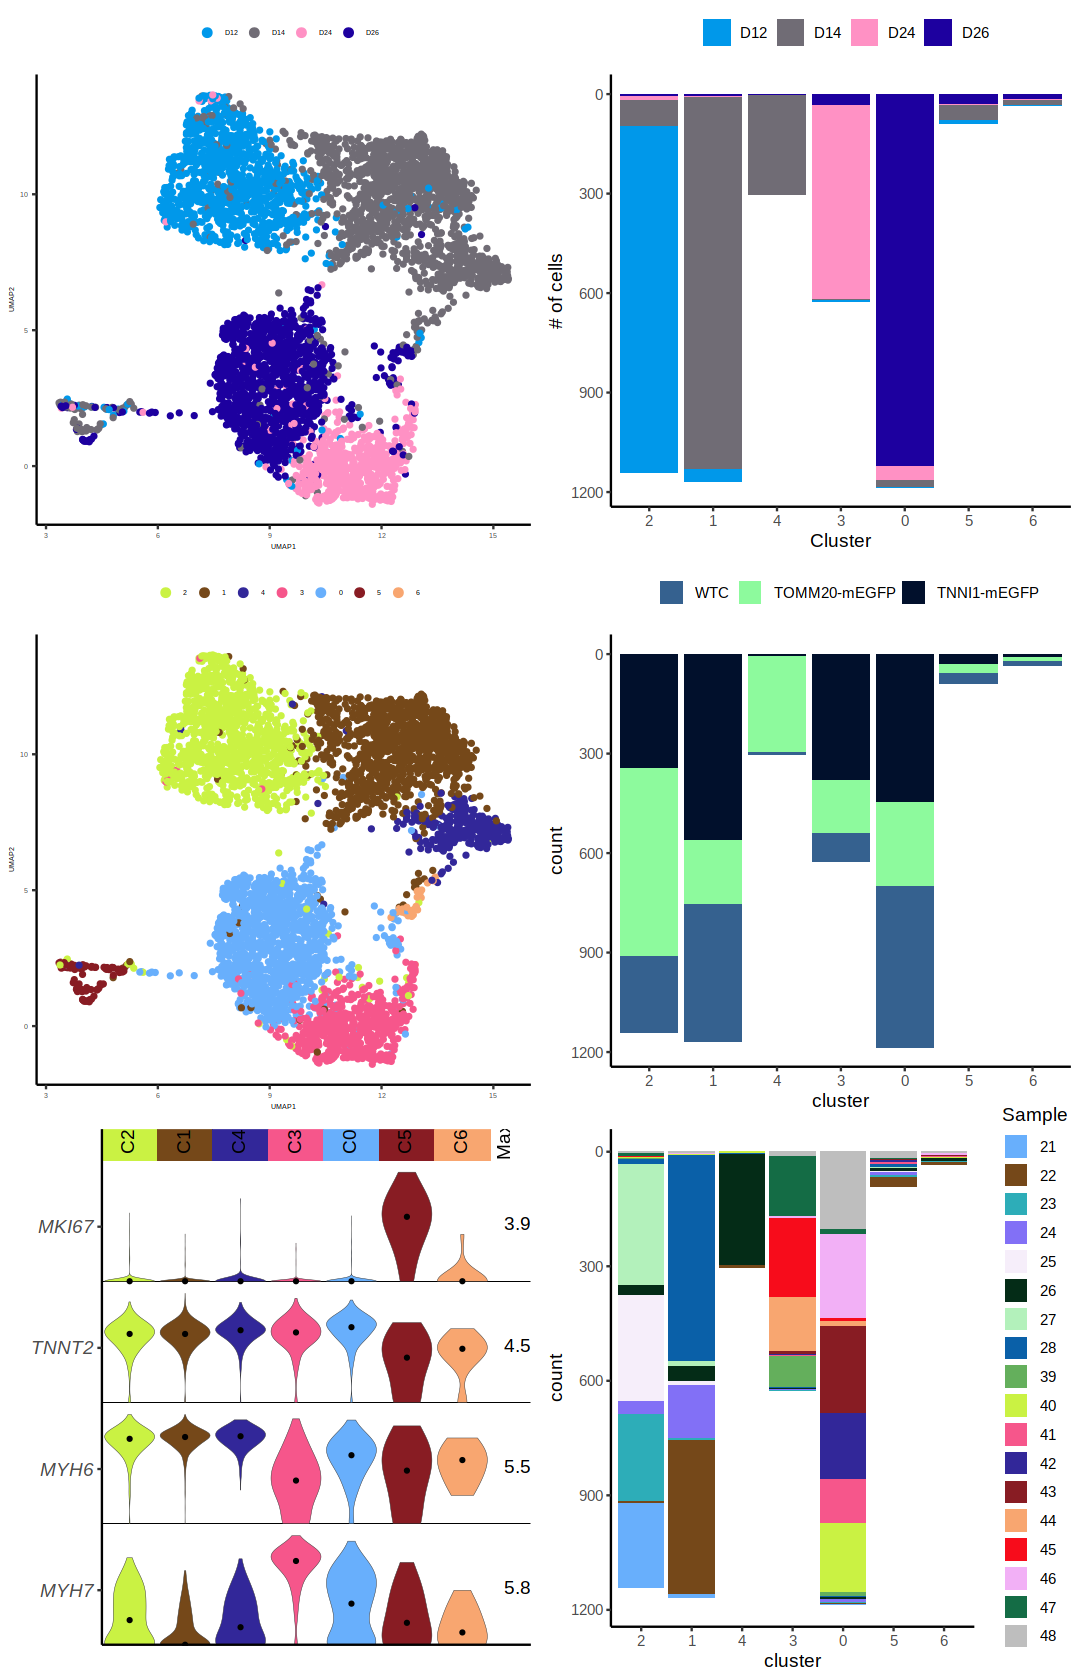

In [109]:
combo_plot = do.call("grid.arrange", c(plot_list, nrow=3, ncol=2, as.table = FALSE))

if (SAVE) {
    ggsave(combo_plot, filename = glue("{SVG_DIR}/figure_5D_exp5.svg"), device = "svg", width = 9, height=14, dpi = 300)
    ggsave(combo_plot, filename = glue("{PNG_DIR}/figure_5D_exp5.png"), device = "png", width = 9, height=14, dpi = 300)
}

MYH6 and MYH7 distributions

In [110]:
group_time = sapply(exp5_umap_embeddings$day,
                    FUN = function(x) {
                        if (x %in% c("D12", "D14")) {
                            return("D12v14")
                        }
                        else if (x %in% c("D24", "D26")) {
                            return("D24v26")
                        }
    
})

exp5_umap_embeddings$time = group_time

In [117]:
exp5_myh7 = ggplot(exp5_umap_embeddings, aes(x = myh7, fill=day)) + geom_density(alpha=0.5) + facet_grid(vars(time), scales="free_y") +
    scale_fill_manual(name = "",
                         breaks = c("D12", "D14", "D24", "D26"), 
                         values = c("D12" = "#0098EA",
                                    "D14" = "#706C75",
                                    "D24" = "#FF91C4",
                                    "D26" = "#1D009F"
                                  )
                        ) +
    theme_bw() + theme(panel.border = element_blank(), panel.grid.major = element_blank(),
    panel.grid.minor = element_blank(), axis.line = element_line(colour = "black")) +
    guides(color = guide_legend(nrow = 1, override.aes = list(size=2))) +
    theme(legend.text = element_text(size = 5)) + 
    theme(legend.position = "top", legend.justification = "center") +
    theme(text = element_text(size = 5), axis.text = element_text(size = 5))

In [120]:
exp5_myh6 = ggplot(exp5_umap_embeddings, aes(x = myh6, fill=day)) + geom_density(alpha=0.5) + facet_grid(vars(time), scales="free_y") +
    scale_fill_manual(name = "",
                         breaks = c("D12", "D14", "D24", "D26"), 
                         values = c("D12" = "#0098EA",
                                    "D14" = "#706C75",
                                    "D24" = "#FF91C4",
                                    "D26" = "#1D009F"
                                    )
                        ) +
    theme_bw() + theme(panel.border = element_blank(), panel.grid.major = element_blank(),
    panel.grid.minor = element_blank(), axis.line = element_line(colour = "black")) +
    guides(color = guide_legend(nrow = 1, override.aes = list(size=2))) +
    theme(legend.text = element_text(size = 5)) + 
    theme(legend.position = "top", legend.justification = "center") +
    theme(text = element_text(size = 5), axis.text = element_text(size = 5))

In [121]:
options(repr.plot.width = 7, repr.plot.height = 7, repr.plot.res = 120)

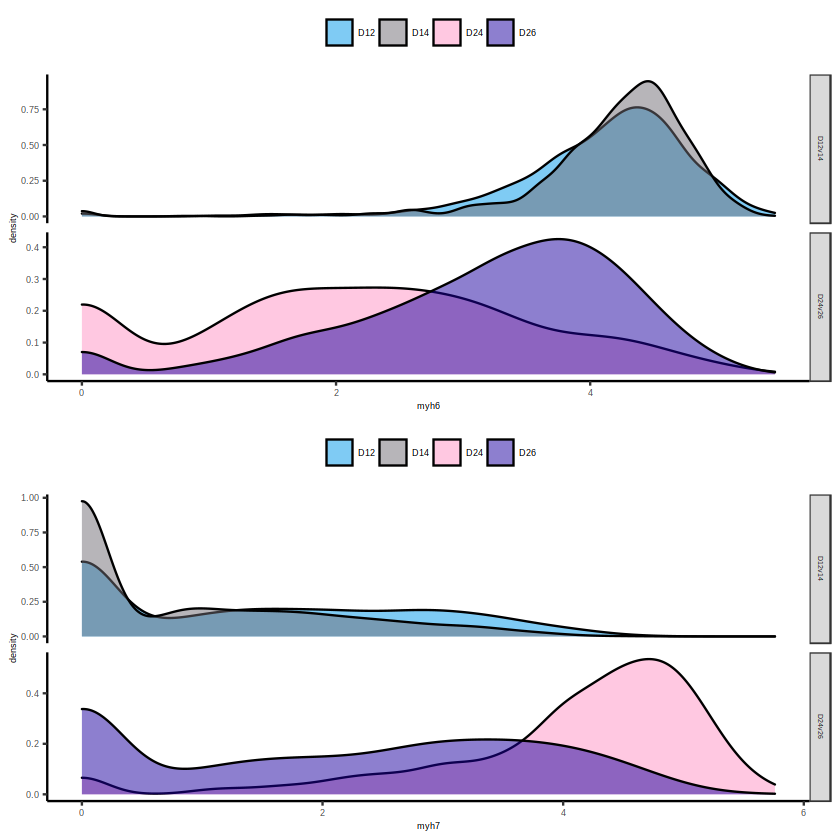

In [124]:
exp5_myh67 = grid.arrange(exp5_myh6, exp5_myh7, ncol=1)
if (SAVE) {
    ggsave(exp5_myh67, filename = glue("{SVG_DIR}/figure_5D_exp5_myh6_myh7.svg"), device = "svg", width = 5, height=4, dpi = 300)
    ggsave(exp5_myh67, filename = glue("{PNG_DIR}/figure_5D_exp5_myh6_myh7.png"), device = "png", width = 10, height=10, dpi = 300)
}

### Supplemental Figure 1

In [170]:
source("/allen/aics/gene-editing/Manuscripts/Transcriptomics_2019/scrnaseq_supplement/cardio_scrnaseq_code/scripts/plotting/plot_utils.R")

In [157]:
mini_umap_df = unique(umap_embeddings[, c("sample_num", "day")])
mini_umap_df$sample_num = as.integer(mini_umap_df$sample_num)

In [158]:
mini_umap_df = mini_umap_df %>% arrange(day, sample_num)
mini_umap_df$sample_num = as.character(mini_umap_df$sample_num)

In [177]:
mini_umap_df

sample_num day
1  1          D12
2  3          D12
3  5          D12
4  7          D12
5  9          D12
6  11         D12
7  13         D12
8  15         D12
9  17         D12
10 19         D12
11 21         D12
12 23         D12
13 25         D12
14 27         D12
15 2          D14
16 4          D14
17 6          D14
18 8          D14
19 10         D14
20 12         D14
21 14         D14
22 16         D14
23 18         D14
24 20         D14
25 22         D14
26 24         D14
27 26         D14
28 28         D14
29 29         D24
30 31         D24
31 33         D24
32 35         D24
33 37         D24
34 39         D24
35 44         D24
36 45         D24
37 47         D24
38 30         D26
39 32         D26
40 34         D26
41 36         D26
42 38         D26
43 40         D26
44 41         D26
45 42         D26
46 43         D26
47 46         D26
48 48         D26

In [171]:
all_sample_plots = vector("list", 48)
i = 1
for (n in mini_umap_df$sample_num) {
    p_sample = plot_single_sample(umap_embeddings, sample=n, point_size=0.000005) + theme_void()
    all_sample_plots[[i]] = p_sample
    i = i+1
}

In [175]:
options(repr.plot.width = 17, repr.plot.height = 5, repr.plot.res = 120)

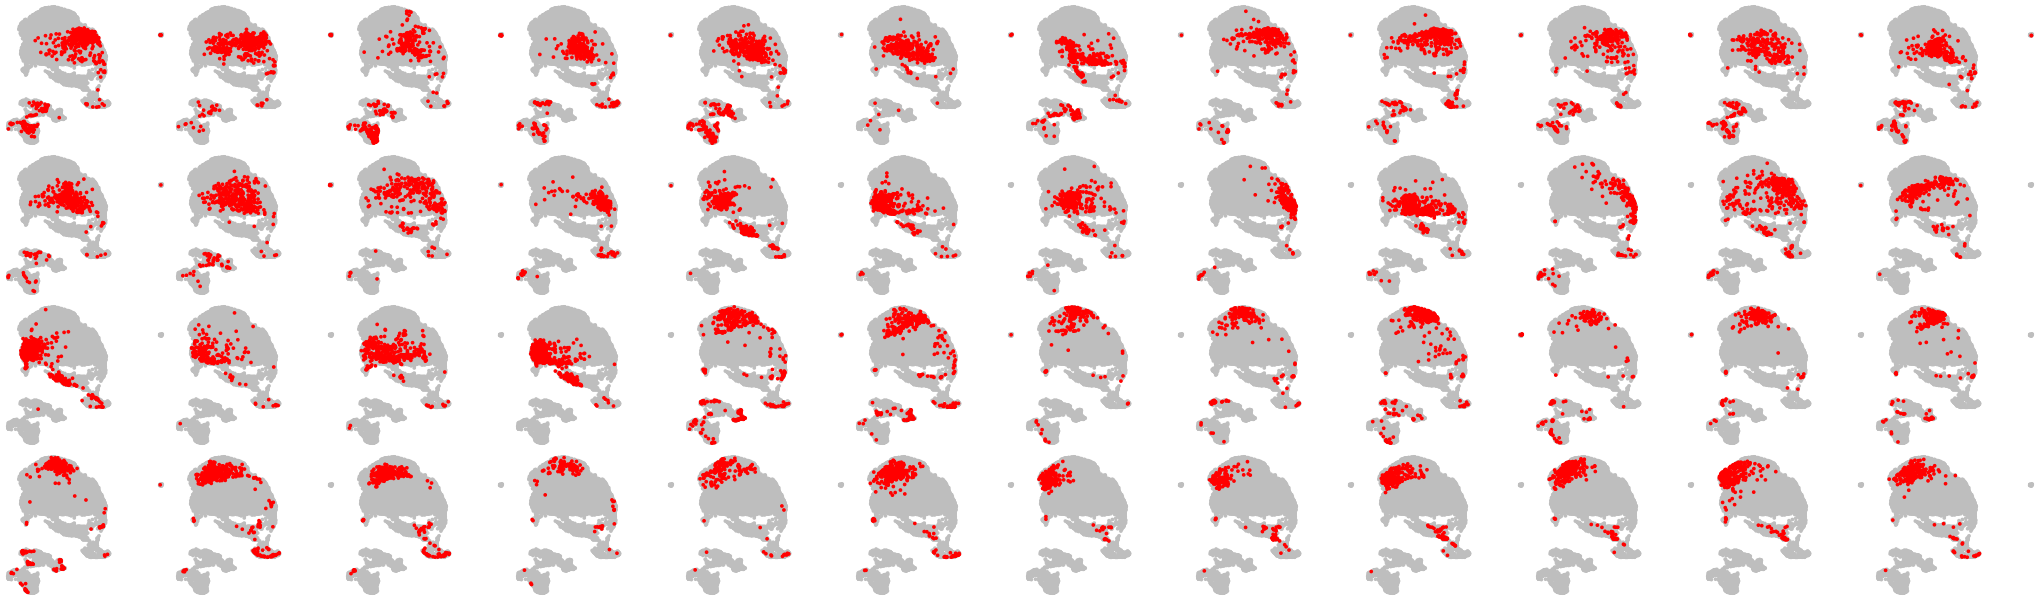

In [176]:
sample_combo = do.call("grid.arrange", c(all_sample_plots, ncol=12, nrow=4))
if (SAVE) {
    ggsave(sample_combo, filename = glue("{SVG_DIR}/supp_figure_1E_d12_14_24_26_samples.svg"), device = "svg", width = 14, height=6, dpi = 300)
    ggsave(sample_combo, filename = glue("{PNG_DIR}/supp_figure_1E_d12_14_24_26_samples.png"), device = "png", width = 14, height=6, dpi = 300)
}

In [183]:
options(repr.plot.width = 7, repr.plot.height = 7, repr.plot.res = 120)

### Supplemental Figure 6A coefficient of variation distribution

Changing the conda env from seurat_v2_20200414 to pilot mini timecoarse scanpy general

In [4]:
library(scater)
library(scran)

Loading required package: SingleCellExperiment

Loading required package: SummarizedExperiment

Loading required package: GenomicRanges

Loading required package: stats4

Loading required package: BiocGenerics

Loading required package: parallel


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:parallel’:

    clusterApply, clusterApplyLB, clusterCall, clusterEvalQ,
    clusterExport, clusterMap, parApply, parCapply, parLapply,
    parLapplyLB, parRapply, parSapply, parSapplyLB


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    anyDuplicated, append, as.data.frame, basename, cbind, colnames,
    dirname, do.call, duplicated, eval, evalq, Filter, Find, get, grep,
    grepl, intersect, is.unsorted, lapply, Map, mapply, match, mget,
    order, paste, pmax, pmax.int, pmin, pmin.int, Position, rank,
    rbind, Reduce, rownames, sapply, setdiff, sort, table, tap

In [5]:
day_grouped = gsub(pattern = "D12|D14", replacement = "early", x=cardio@meta.data[, "day"])
day_grouped = gsub(pattern = "D24|D26", replacement = "late", x=day_grouped)
cardio@meta.data[, "day_grouped"] = as.factor(day_grouped)

In [6]:
sce = SingleCellExperiment(cardio@raw.data, colData=cardio@meta.data)

In [7]:
names(assays(sce)) = c("counts")

#### Do scater normalization and scran variance modeling

In [8]:
sce = logNormCounts(sce)

In [9]:
dec = modelGeneVar(sce)

#### Top 5% highly variable genes

In [10]:
top.hvgs = getTopHVGs(dec, prop=0.05)

In [11]:
length(top.hvgs)

[1] 602

In [12]:
sce = runPCA(sce, subset_row=top.hvgs)

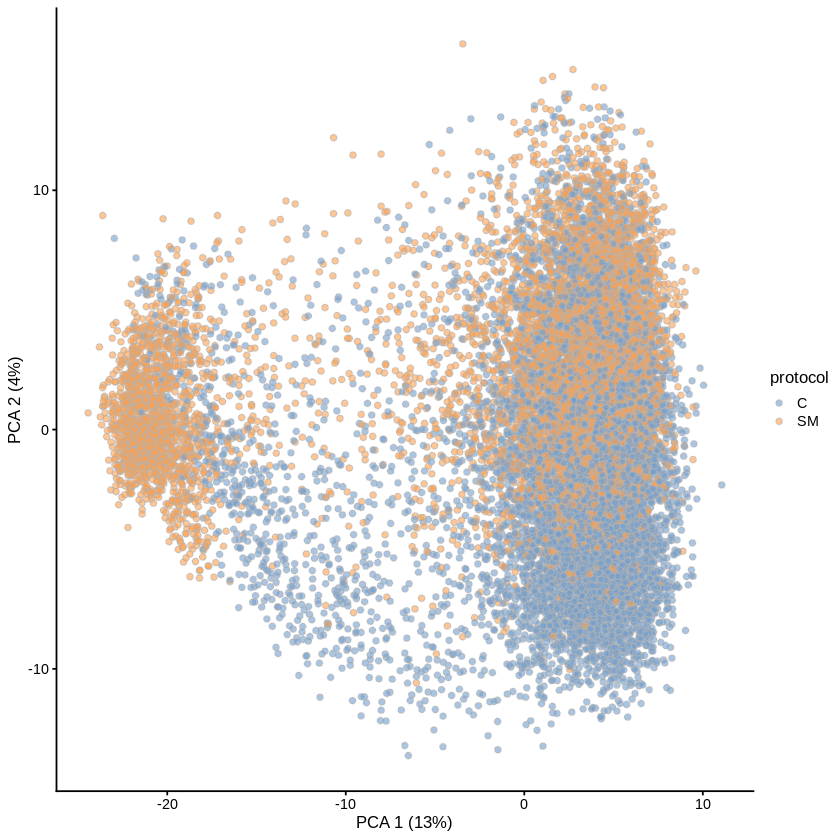

In [13]:
plotReducedDim(sce, dimred = "PCA", colour_by = "protocol")

In [14]:
pc_var = getExplanatoryPCs(sce, dimred="PCA")

Warning message in .get_variance_explained(assay(x, exprs_values), variables = variables, :
“ignoring 'seq_exp' with fewer than 2 unique levels”
Warning message in .get_variance_explained(assay(x, exprs_values), variables = variables, :
“ignoring 'orig.ident' with fewer than 2 unique levels”


In [15]:
# Seurat norm
pc_var

nGene      nUMI       day        protocol   cell_line passage   scientist
PC1   1.3849771  3.0224611  4.7823811  4.6719599 2.8556533  5.439670 0.4814446
PC2   0.2311107  1.1255890 18.3236281 18.1383830 2.3314666 22.171228 6.0230620
PC3   0.9072687  0.3499686 44.6929263  2.0565312 1.5660091 16.825993 1.6388805
PC4   0.4173568  0.7892666 14.3427699  3.7474596 0.4383942 11.496457 0.1829885
PC5   0.5008279  0.4616297  4.3374570  2.4435209 0.9660788  5.062086 0.7740786
PC6  14.4621094 14.3354572  4.0538403  1.1126564 1.3789101  5.488502 1.7216213
PC7   1.3568241  1.9925260 10.4803883  9.2244095 1.1248788  4.757633 0.2089438
PC8   0.7734792  0.6420540  6.9494918  4.5984672 1.6268917  8.732555 2.7287741
PC9   2.3080061  2.1692432  0.6411926  0.3050225 1.5830433  9.667835 0.8000838
PC10  1.9046320  1.3137086  3.4554509  2.1532913 0.2203630  4.576445 2.7078803
     diff_exp  ctnt      seq_exp ⋯ orig.ident percent.mito res.0.3  res.0.4 
PC1   2.550335 13.833663 NA      ⋯ NA         3.935285e+00 81.07215 82.16328
PC2  16.149132 26.559813 NA      ⋯ NA         7.186359e+00 39.00204 39.36318
PC3   9.468015 26.026408 NA      ⋯ NA         1.236968e-01 51.18086 52.97143
PC4   7.120353 11.806055 NA      ⋯ NA         4.287660e+00 41.87401 48.95970
PC5   2.363066 14.120928 NA      ⋯ NA         1.787886e+00 25.28951 25.56048
PC6   2.980387  8.618705 NA      ⋯ NA         1.104950e+01 15.54171 19.03838
PC7   1.131703 14.941300 NA      ⋯ NA         1.432192e+00 27.78521 32.64090
PC8   5.859954  8.190232 NA      ⋯ NA         2.093789e-04 23.06807 31.25534
PC9   5.508243  6.173216 NA      ⋯ NA         3.211248e-04 15.67807 16.31722
PC10  3.447599  6.802102 NA      ⋯ NA         1.034379e-02 23.42107 24.72292
     res.0.5  res.0.6  res.0.8  res.1    tree.ident  day_grouped 
PC1  82.64888 82.46954 83.35287 83.34454 24.23764736  0.026212366
PC2  41.87825 48.06810 59.82818 63.97293  0.01112145  0.007839541
PC3  53.05144 58.85523 62.85778 62.95525 20.83569345 42.977057594
PC4  51.05096 52.72336 52.12902 52.98681  3.26121385 10.530210904
PC5  28.78147 39.58138 41.73168 41.05036  6.23786941  1.461358408
PC6  22.36971 26.32127 27.94452 30.74254  2.38581702  2.590534749
PC7  36.45615 39.48685 45.97096 44.78906  4.52083340  0.616184207
PC8  31.39371 32.10613 36.67729 37.13288  0.21063998  1.507921141
PC9  25.77486 29.50090 29.26777 30.23263  3.40142635  0.345067719
PC10 24.69623 28.76042 31.96080 31.44756  0.30342777  0.496236557

In [16]:
max_rsquared = apply(as.matrix(pc_var), 2, max, na.rm=TRUE)

Warning message in FUN(newX[, i], ...):
“no non-missing arguments to max; returning -Inf”
Warning message in FUN(newX[, i], ...):
“no non-missing arguments to max; returning -Inf”


In [17]:
max_rsquared

nGene         nUMI          day     protocol    cell_line      passage 
   14.462109    14.335457    44.692926    18.138383     2.855653    22.171228 
   scientist     diff_exp         ctnt      seq_exp   sample_num   orig.ident 
    6.023062    16.149132    26.559813         -Inf    55.371111         -Inf 
percent.mito      res.0.3      res.0.4      res.0.5      res.0.6      res.0.8 
   11.049496    81.072155    82.163277    82.648881    82.469544    83.352871 
       res.1   tree.ident  day_grouped 
   83.344540    24.237647    42.977058

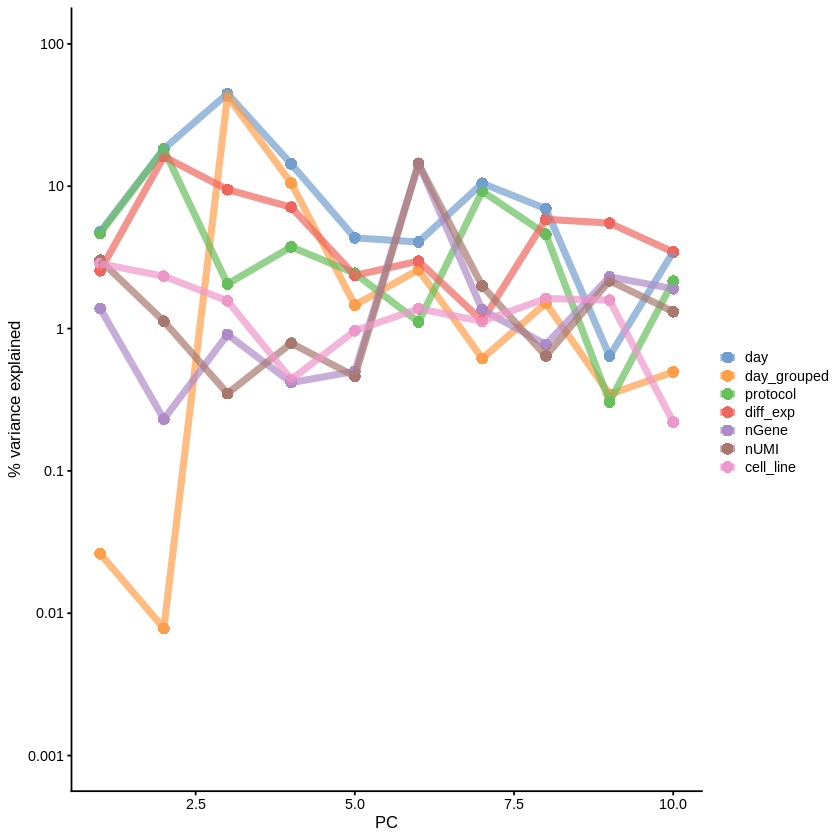

In [18]:
plotExplanatoryPCs((pc_var/100)[, c("day", "day_grouped", "protocol", "diff_exp", "cell_line", "nGene", "nUMI")])

In [19]:
vars_high_var_genes = getVarianceExplained(sce, subset_row=rownames(assay(sce)) %in% top.hvgs,
    variables=c("day", "day_grouped", "nGene", "nUMI", "diff_exp", "cell_line", "protocol"))

In [20]:
max(vars_high_var_genes)

[1] 40.20183

In [21]:
# scater norm
p.var = plotExplanatoryVariables(vars_high_var_genes)

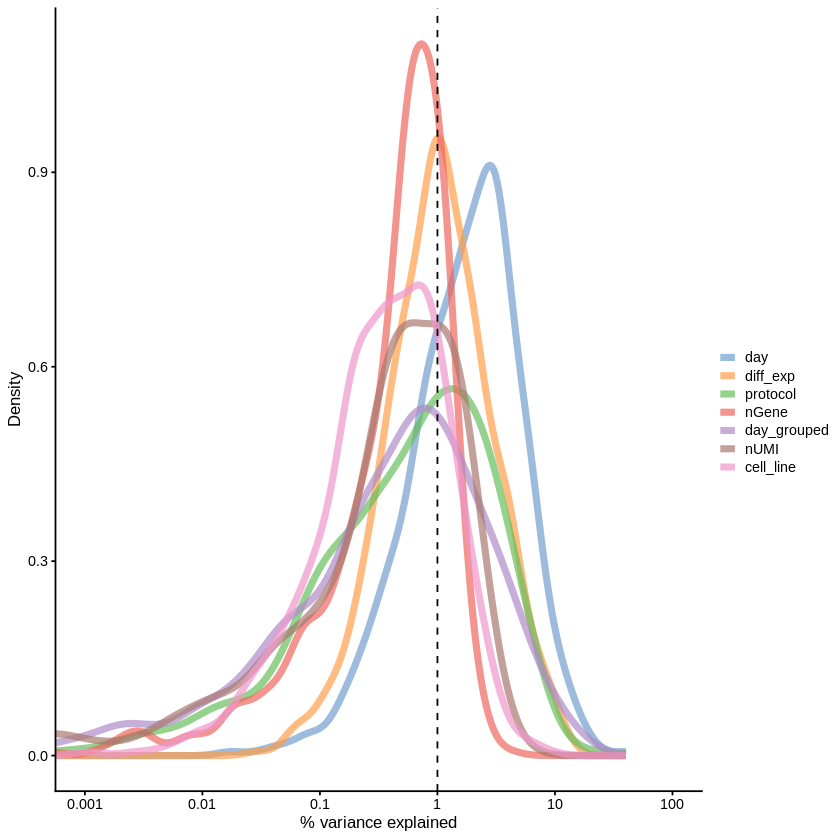

In [24]:
p.var
if (SAVE) {
    ggsave(p.var, filename = glue("{SVG_DIR}/supp_figure_6A_d12_14_24_26_var_explained.svg"), device = "svg", width = 6, height=5, dpi = 300)
    ggsave(p.var, filename = glue("{PNG_DIR}/supp_figure_6A_d12_14_24_26_var_explained.png"), device = "png", width = 6, height=5, dpi = 300)
}

### Supplemental figure 6B correlation between diff experiments

In [178]:
unique(cardio@meta.data$diff_exp)

[1] "7_24_2017" "7_10_2017" "7_13_2017" "7_27_2017" "7_20_2017"

In [179]:
cells_7_13 <- rownames(cardio@meta.data[cardio@meta.data$diff_exp == "7_13_2017", ])
cells_7_10 <- rownames(cardio@meta.data[cardio@meta.data$diff_exp == "7_10_2017", ])
cells_7_20 <- rownames(cardio@meta.data[cardio@meta.data$diff_exp == "7_20_2017", ])
cells_7_24 <- rownames(cardio@meta.data[cardio@meta.data$diff_exp == "7_24_2017", ])
cells_7_27 <- rownames(cardio@meta.data[cardio@meta.data$diff_exp == "7_27_2017", ])

In [180]:
mat_7_13 <- cardio@raw.data[, cells_7_13]
mat_7_10 <- cardio@raw.data[, cells_7_10]
mat_7_20 <- cardio@raw.data[, cells_7_20]
mat_7_24 <- cardio@raw.data[, cells_7_24]
mat_7_27 <- cardio@raw.data[, cells_7_27]

In [181]:
exp_df <- data.frame(exp7_10 = log(rowSums(mat_7_10) + 1),
                     exp7_13 = log(rowSums(mat_7_13) + 1),
                     exp7_20 = log(rowSums(mat_7_20) + 1),
                     exp7_24 = log(rowSums(mat_7_24) + 1),
                     exp7_27 = log(rowSums(mat_7_27) + 1)
                     )

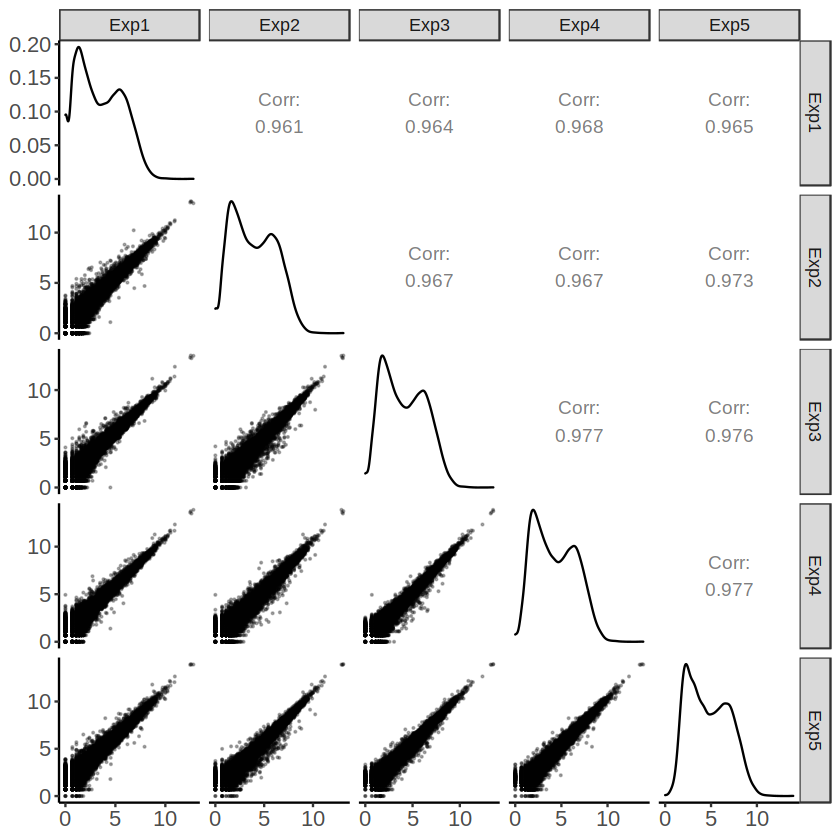

In [184]:
p.corr_diff_exp <- ggpairs(exp_df, lower = list(continuous = wrap("points", alpha = 0.3, size=0.1)),
        upper = list(continuous = wrap("cor", size = 4, method = "spearman")),
        columnLabels = c("Exp1", "Exp2", "Exp3", "Exp4", "Exp5")
       ) +
      theme_bw() + theme(panel.border = element_blank(), panel.grid.major = element_blank(),
                         panel.grid.minor = element_blank(), axis.line = element_line(colour = "black")) +
      theme(text = element_text(size = 13), axis.text = element_text(size = 13))
p.corr_diff_exp

if (SAVE) {
    ggsave(p.corr_diff_exp, filename = glue("{SVG_DIR}/supp_figure_6B_diff_exp_population_spearman.svg"), device = "svg", width = 5, height=5, dpi = 300)
    ggsave(p.corr_diff_exp, filename = glue("{PNG_DIR}/supp_figure_6B_diff_exp_population_spearman.png"), device = "png", width = 5, height=5, dpi = 300)
}

In [188]:
p.single_exp1 = plot_single_exp(umap_embeddings, "7_10_2017", point_size = 0.000005)
p.single_exp2 = plot_single_exp(umap_embeddings, "7_13_2017", point_size = 0.000005)
p.single_exp3 = plot_single_exp(umap_embeddings, "7_20_2017", point_size = 0.000005)
p.single_exp4 = plot_single_exp(umap_embeddings, "7_24_2017", point_size = 0.000005)
p.single_exp5 = plot_single_exp(umap_embeddings, "7_27_2017", point_size = 0.000005)

In [191]:
options(repr.plot.width = 3, repr.plot.height = 14, repr.plot.res = 120)

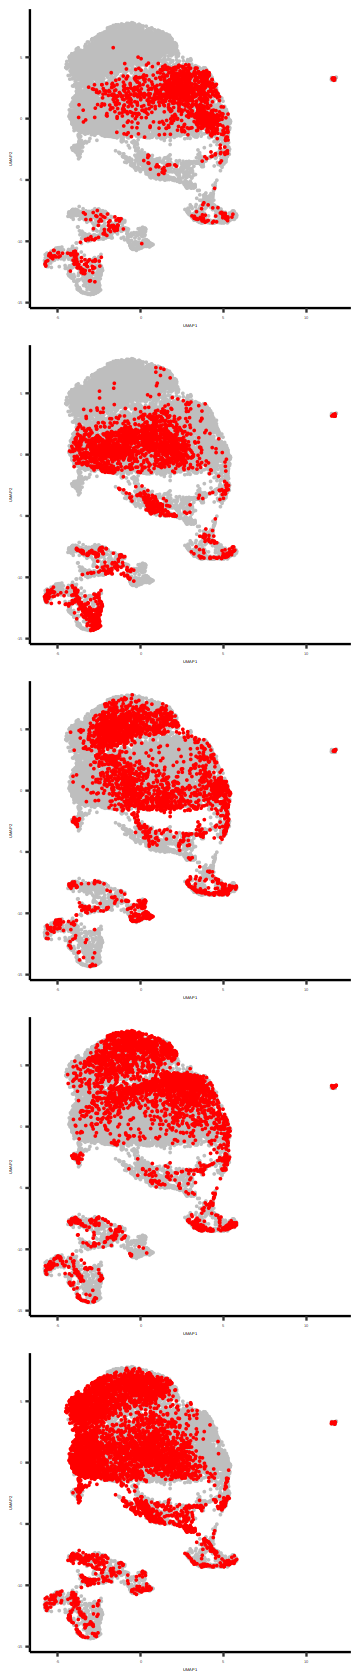

In [192]:
p.exp_combo = grid.arrange(p.single_exp1, p.single_exp2, p.single_exp3, p.single_exp4, p.single_exp5, nrow=5)
if (SAVE) {
    ggsave(p.exp_combo, filename = glue("{SVG_DIR}/supp_figure_6B_diff_exp_mini_umaps.svg"), device = "svg", width = 1.2, height=5, dpi = 300)
    ggsave(p.exp_combo, filename = glue("{PNG_DIR}/supp_figure_6B_diff_exp_mini_umaps.png"), device = "png", width = 1.2, height=5, dpi = 300)
}

### Supplemental figure 1

In [17]:
all_sample_plots = vector("list", 48)
i = 1
for (n in unique(umap_embeddings$sample_num)) {
    p_sample = plot_single_sample(n)
    all_sample_plots[[i]] = p_sample
    i = i+1
}

In [18]:
options(repr.plot.width = 40, repr.plot.height = 20, repr.plot.res = 120)

In [ ]:
sample_combo = do.call("grid.arrange", c(all_sample_plots, ncol=8, nrow=6))

### Supplemental Figure 6C, D, E

### Supp Figure 6C D14 experiments

In [193]:
diff_exp_color_df = data.frame("diff_exp" = c("7_10_2017", "7_13_2017", "7_20_2017", "7_24_2017", "7_27_2017"),
                             "diff_exp_color" = c("#827DB8", "#2E0D93", "#34DEBB", "#1A163E", "#5AC4F8"))

In [194]:
diff_exp_color_df$diff_exp = as.character(diff_exp_color_df$diff_exp)

In [195]:
# load D14 Seurat
load("../protocol_experiment_cell_line_comparison/plots/experiment_comparison/D14/D14_experiments_cardio_clusters.RData")

In [196]:
subset_cardio

An object of class seurat in project CardioDiff 
 28786 genes across 4572 samples.

In [197]:
D14_umap_embeddings <- as.data.frame(GetCellEmbeddings(object = subset_cardio, reduction.type = "umap", dims.use = 1:2, cells.use = colnames(subset_cardio@data)))
D14_umap_embeddings <- cbind(D14_umap_embeddings, subset_cardio@meta.data[, c("day", "protocol", "cell_line", "seq_exp", "res.0.4", "res.0.5", "res.0.6", "res.0.8", "diff_exp", "nGene", "nUMI", "sample_num")])
D14_umap_embeddings$tnnt2 <- subset_cardio@data["TNNT2", ]
D14_umap_embeddings$cdh1 <- subset_cardio@data["CDH1", ]
D14_umap_embeddings$mki67 <- subset_cardio@data["MKI67", ]
D14_umap_embeddings$sox2 <- subset_cardio@data["SOX2", ]
D14_umap_embeddings$myh6 <- subset_cardio@data["MYH6", ]
D14_umap_embeddings$myh7 <- subset_cardio@data["MYH7", ]
D14_umap_embeddings$mki67 <- subset_cardio@data["MKI67", ]

In [198]:
unique(D14_umap_embeddings$res.0.4)

[1] "2" "0" "1" "4" "5" "3"

In [199]:
source("/allen/aics/gene-editing/Manuscripts/Transcriptomics_2019/scrnaseq_supplement/cardio_scrnaseq_code/scripts/plotting/plot_utils.R")

In [200]:
p.single_exp1 = plot_single_exp(D14_umap_embeddings, "7_10_2017", point_size = 1)
p.single_exp2 = plot_single_exp(D14_umap_embeddings, "7_13_2017", point_size = 1)
p.single_exp3 = plot_single_exp(D14_umap_embeddings, "7_20_2017", point_size = 1)
p.single_exp4 = plot_single_exp(D14_umap_embeddings, "7_24_2017", point_size = 1)
p.single_exp5 = plot_single_exp(D14_umap_embeddings, "7_27_2017", point_size = 1)

p.cluster_d14 = make_umap_subset(D14_umap_embeddings[sample(nrow(D14_umap_embeddings), replace=FALSE), ], point_size = 1,
                                 font_size=4,
                                 guide_size=2,
                 color="res.0.4", 
                 values = c("0" = "#68AFFC",
                            "1" = "#754819",
                            "10" = "#2DADB8",
                            "2" = "#CAF243",
                            "3" = "#F6568B",
                            "4" = "#322799",
                            "5" = "#881C23",
                            "6" = "#F8A670",
                            "7" = "#F70C1B",
                            "8" = "#F2B0F6",
                            "9" = "#146C45"
                           ))

bar_cluster_by_cell_line <- ggplot(D14_umap_embeddings, aes(x = res.0.4, fill = cell_line)) + geom_bar() +
    scale_fill_manual(name = "",
                             breaks = c("AICS0", "AICS11", "AICS37"), 
                             labels = c("WTC", "TOMM20-mEGFP", "TNNI1-mEGFP"),
                             values = c("AICS0" = "#35618F", "AICS11" = "#8DFA9D", "AICS37" = "#01102C")
                            ) +
    guides(fill = guide_legend(nrow = 1, override.aes = list(size=4))) +
    theme_bw() + theme(panel.border = element_blank(), panel.grid.major = element_blank(),
    panel.grid.minor = element_blank(), axis.line = element_line(colour = "black")) +
    theme(legend.position = "top") +
    xlab("cluster") +
    scale_y_reverse()

bar_cluster_by_diff_exp <- ggplot(D14_umap_embeddings, aes(x = res.0.4, fill = diff_exp)) + geom_bar() +
                            scale_fill_manual(name = "",
                                              breaks = c("7_10_2017", "7_13_2017", "7_20_2017", "7_24_2017", "7_27_2017"), 
                                              labels = c("Exp1", "Exp2", "Exp3", "Exp4", "Exp5"),
                                              values = c("7_10_2017" = "#827DB8",
                                                         "7_13_2017" = "#2E0D93",
                                                         "7_20_2017" = "#34DEBB",
                                                         "7_24_2017" = "#1A163E",
                                                         "7_27_2017" = "#5AC4F8"
                                                        )
                                             ) +
                     guides(fill = guide_legend(nrow = 1, override.aes = list(size=4))) +
                     theme_bw() + theme(panel.border = element_blank(), panel.grid.major = element_blank(),
                     panel.grid.minor = element_blank(), axis.line = element_line(colour = "black")) +
                     theme(legend.position = "top") +
                     xlab("cluster") +
                     scale_y_reverse()

group_order = c("0", "1", "2", "3", "4")
genes.plot = c("MKI67", "TNNT2", "MYH6", "MYH7")

p.violin_d14 = cluster_group_violin(subset_cardio,
                     group_order=group_order,
                     resolution="res.0.4",
                     genes.plot=genes.plot,
                     cluster_color_df=cluster_color_df
                    )

Warning message:
“Column `cluster_id` joining character vector and factor, coercing into character vector”
Warning message:
“`fun.y` is deprecated. Use `fun` instead.”
Warning message:
“`fun.ymin` is deprecated. Use `fun.min` instead.”
Warning message:
“`fun.ymax` is deprecated. Use `fun.max` instead.”
Warning message:
“`fun.y` is deprecated. Use `fun` instead.”
Warning message:
“`fun.ymin` is deprecated. Use `fun.min` instead.”
Warning message:
“`fun.ymax` is deprecated. Use `fun.max` instead.”
Warning message:
“`fun.y` is deprecated. Use `fun` instead.”
Warning message:
“`fun.ymin` is deprecated. Use `fun.min` instead.”
Warning message:
“`fun.ymax` is deprecated. Use `fun.max` instead.”
Warning message:
“`fun.y` is deprecated. Use `fun` instead.”
Warning message:
“`fun.ymin` is deprecated. Use `fun.min` instead.”
Warning message:
“`fun.ymax` is deprecated. Use `fun.max` instead.”


In [201]:
options(repr.plot.width = 10, repr.plot.height = 10, repr.plot.res = 120)

In [202]:
plot_list = list(p.single_exp1,
             p.single_exp2,
             p.single_exp3,
             p.single_exp4,
             p.single_exp5,
             p.cluster_d14,
             p.violin_d14,
             bar_cluster_by_diff_exp,
             bar_cluster_by_cell_line)

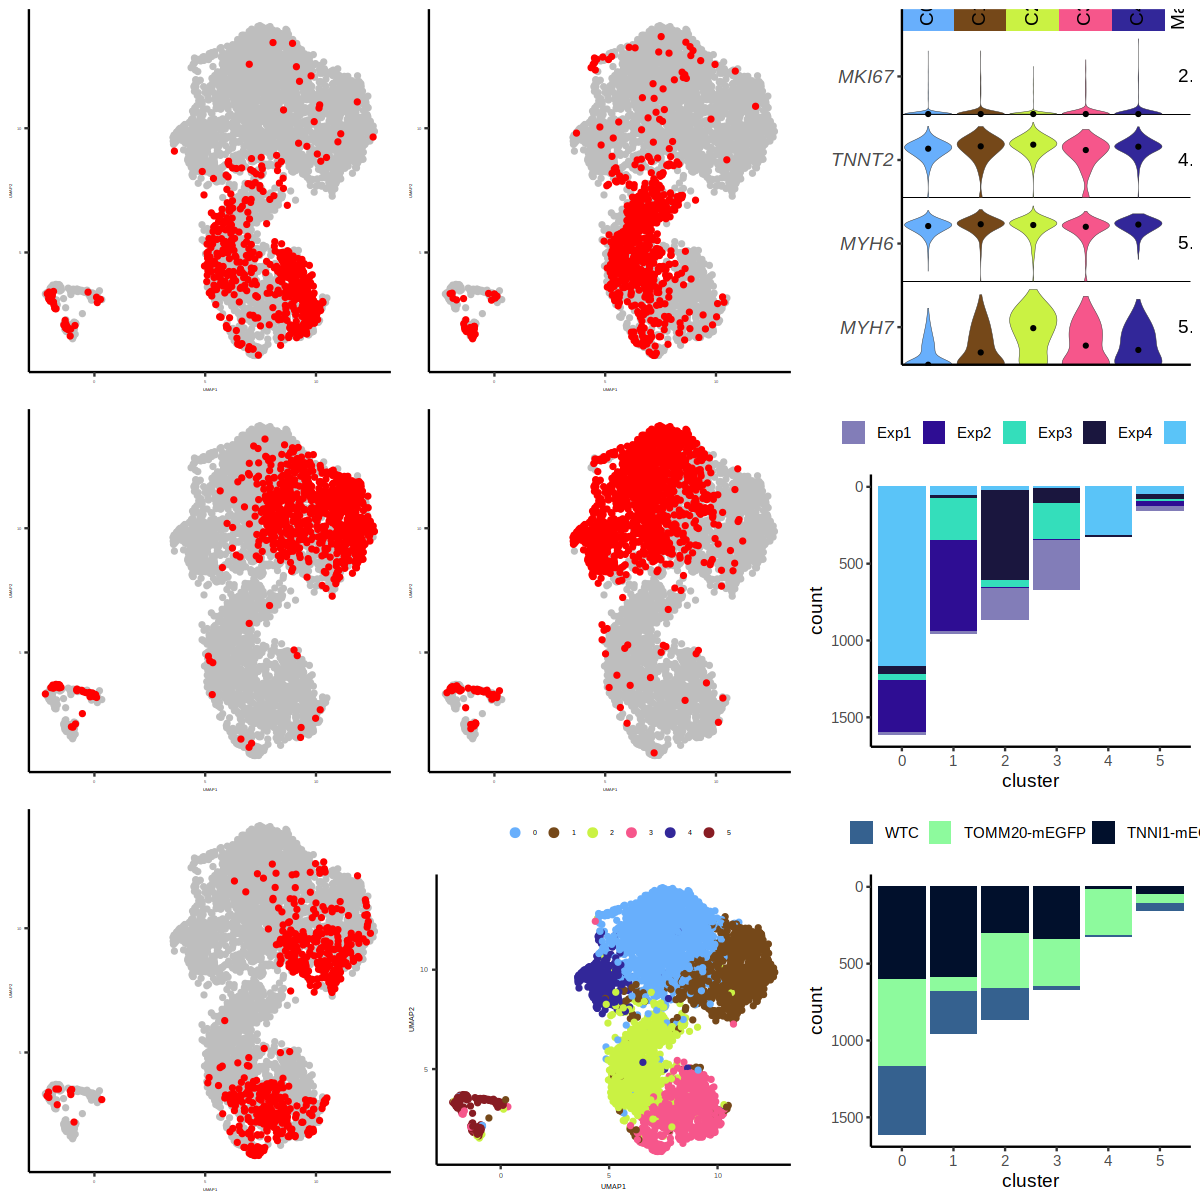

In [203]:
combo_plot = do.call("grid.arrange", c(plot_list, nrow=3, ncol=3, as.table = FALSE))
if (SAVE) {
    ggsave(combo_plot, filename = glue("{SVG_DIR}/supp_figure_6C_D14_diff_exps.svg"), device = "svg", width = 14, height=9, dpi = 300)
    ggsave(combo_plot, filename = glue("{PNG_DIR}/supp_figure_6C_D14_diff_exps.png"), device = "png", width = 10, height=10, dpi = 300)
}

### Supp Figure 6D D24 experiments

In [204]:
diff_exp_color_df = data.frame("diff_exp" = c("7_10_2017", "7_13_2017", "7_20_2017", "7_24_2017", "7_27_2017"),
                             "diff_exp_color" = c("#827DB8", "#2E0D93", "#34DEBB", "#1A163E", "#5AC4F8"))

In [205]:
diff_exp_color_df$diff_exp = as.character(diff_exp_color_df$diff_exp)

In [206]:
# load D24 Seurat
load("../protocol_experiment_cell_line_comparison/plots/experiment_comparison/D24/D24_experiments_cardio_clusters.RData")

In [207]:
subset_cardio

An object of class seurat in project CardioDiff 
 28786 genes across 1842 samples.

In [208]:
D24_umap_embeddings <- as.data.frame(GetCellEmbeddings(object = subset_cardio, reduction.type = "umap", dims.use = 1:2, cells.use = colnames(subset_cardio@data)))
D24_umap_embeddings <- cbind(D24_umap_embeddings, subset_cardio@meta.data[, c("day", "protocol", "cell_line", "seq_exp", "res.0.4", "res.0.5", "res.0.6", "res.0.8", "diff_exp", "nGene", "nUMI", "sample_num")])
D24_umap_embeddings$tnnt2 <- subset_cardio@data["TNNT2", ]
D24_umap_embeddings$cdh1 <- subset_cardio@data["CDH1", ]
D24_umap_embeddings$mki67 <- subset_cardio@data["MKI67", ]
D24_umap_embeddings$sox2 <- subset_cardio@data["SOX2", ]
D24_umap_embeddings$myh6 <- subset_cardio@data["MYH6", ]
D24_umap_embeddings$myh7 <- subset_cardio@data["MYH7", ]
D24_umap_embeddings$mki67 <- subset_cardio@data["MKI67", ]

In [238]:
unique(D24_umap_embeddings$res.0.4)

[1] "2" "0" "1" "3"

In [210]:
source("/allen/aics/gene-editing/Manuscripts/Transcriptomics_2019/scrnaseq_supplement/cardio_scrnaseq_code/scripts/plotting/plot_utils.R")

In [211]:
p.single_exp1 = plot_single_exp(D24_umap_embeddings, "7_10_2017", point_size = 1)
p.single_exp2 = plot_single_exp(D24_umap_embeddings, "7_13_2017", point_size = 1)
p.single_exp3 = plot_single_exp(D24_umap_embeddings, "7_20_2017", point_size = 1)
p.single_exp4 = plot_single_exp(D24_umap_embeddings, "7_24_2017", point_size = 1)
p.single_exp5 = plot_single_exp(D24_umap_embeddings, "7_27_2017", point_size = 1)

p.cluster_d24 = make_umap_subset(D24_umap_embeddings[sample(nrow(D24_umap_embeddings), replace=FALSE), ], point_size = 1,
                                 font_size=4,
                                 guide_size=2,
                 color="res.0.4", 
                 values = c("0" = "#68AFFC",
                            "1" = "#754819",
                            "10" = "#2DADB8",
                            "2" = "#CAF243",
                            "3" = "#F6568B",
                            "4" = "#322799",
                            "5" = "#881C23",
                            "6" = "#F8A670",
                            "7" = "#F70C1B",
                            "8" = "#F2B0F6",
                            "9" = "#146C45"
                           ))

bar_cluster_by_cell_line <- ggplot(D24_umap_embeddings, aes(x = res.0.4, fill = cell_line)) + geom_bar() +
    scale_fill_manual(name = "",
                             breaks = c("AICS0", "AICS11", "AICS37"), 
                             labels = c("WTC", "TOMM20-mEGFP", "TNNI1-mEGFP"),
                             values = c("AICS0" = "#35618F", "AICS11" = "#8DFA9D", "AICS37" = "#01102C")
                            ) +
    guides(fill = guide_legend(nrow = 1, override.aes = list(size=4))) +
    theme_bw() + theme(panel.border = element_blank(), panel.grid.major = element_blank(),
    panel.grid.minor = element_blank(), axis.line = element_line(colour = "black")) +
    theme(legend.position = "top") +
    xlab("cluster") +
    scale_y_reverse()

bar_cluster_by_diff_exp <- ggplot(D24_umap_embeddings, aes(x = res.0.4, fill = diff_exp)) + geom_bar() +
                            scale_fill_manual(name = "",
                                              breaks = c("7_10_2017", "7_13_2017", "7_20_2017", "7_24_2017", "7_27_2017"), 
                                              labels = c("Exp1", "Exp2", "Exp3", "Exp4", "Exp5"),
                                              values = c("7_10_2017" = "#827DB8",
                                                         "7_13_2017" = "#2E0D93",
                                                         "7_20_2017" = "#34DEBB",
                                                         "7_24_2017" = "#1A163E",
                                                         "7_27_2017" = "#5AC4F8"
                                                        )
                                             ) +
                     guides(fill = guide_legend(nrow = 1, override.aes = list(size=4))) +
                     theme_bw() + theme(panel.border = element_blank(), panel.grid.major = element_blank(),
                     panel.grid.minor = element_blank(), axis.line = element_line(colour = "black")) +
                     theme(legend.position = "top") +
                     xlab("cluster") +
                     scale_y_reverse()

group_order = c("0", "1", "2", "3", "4")
genes.plot = c("MKI67", "TNNT2", "MYH6", "MYH7")

p.violin_d24 = cluster_group_violin(subset_cardio,
                     group_order=group_order,
                     resolution="res.0.4",
                     genes.plot=genes.plot,
                     cluster_color_df=cluster_color_df
                    )

Warning message:
“Column `cluster_id` joining character vector and factor, coercing into character vector”
Warning message:
“`fun.y` is deprecated. Use `fun` instead.”
Warning message:
“`fun.ymin` is deprecated. Use `fun.min` instead.”
Warning message:
“`fun.ymax` is deprecated. Use `fun.max` instead.”
Warning message:
“`fun.y` is deprecated. Use `fun` instead.”
Warning message:
“`fun.ymin` is deprecated. Use `fun.min` instead.”
Warning message:
“`fun.ymax` is deprecated. Use `fun.max` instead.”
Warning message:
“`fun.y` is deprecated. Use `fun` instead.”
Warning message:
“`fun.ymin` is deprecated. Use `fun.min` instead.”
Warning message:
“`fun.ymax` is deprecated. Use `fun.max` instead.”
Warning message:
“`fun.y` is deprecated. Use `fun` instead.”
Warning message:
“`fun.ymin` is deprecated. Use `fun.min` instead.”
Warning message:
“`fun.ymax` is deprecated. Use `fun.max` instead.”


In [212]:
options(repr.plot.width = 10, repr.plot.height = 10, repr.plot.res = 120)

In [213]:
plot_list = list(p.single_exp1,
             p.single_exp2,
             p.single_exp3,
             p.single_exp4,
             p.single_exp5,
             p.cluster_d24,
             p.violin_d24,
             bar_cluster_by_diff_exp,
             bar_cluster_by_cell_line)

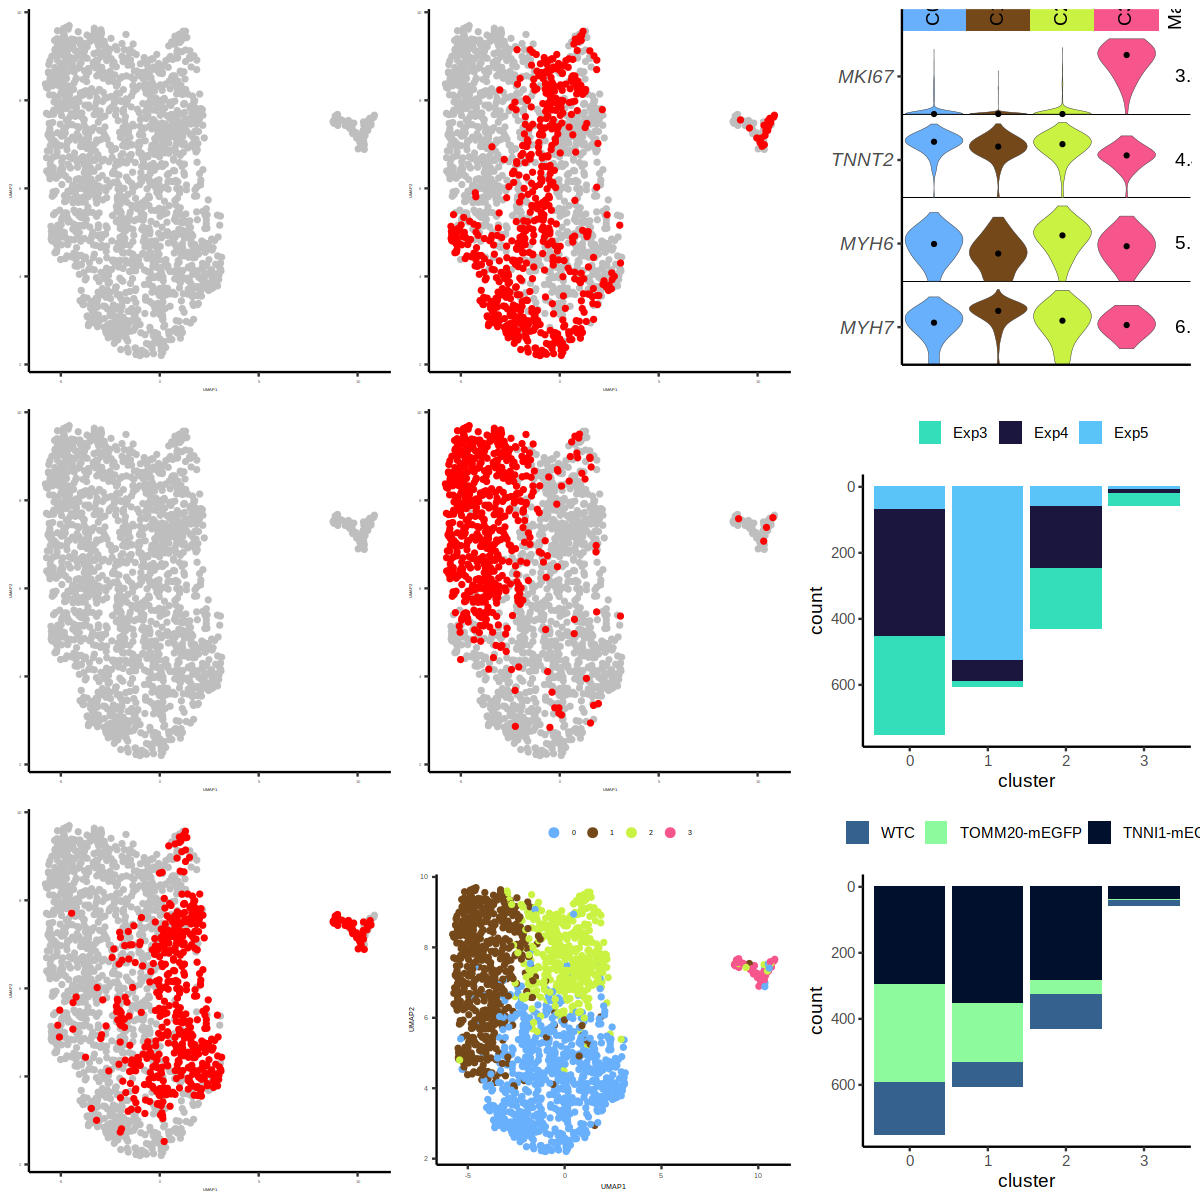

In [214]:
combo_plot = do.call("grid.arrange", c(plot_list, nrow=3, ncol=3, as.table = FALSE))
if (SAVE) {
    ggsave(combo_plot, filename = glue("{SVG_DIR}/supp_figure_6D_D24_diff_exps.svg"), device = "svg", width = 14, height=9, dpi = 300)
    ggsave(combo_plot, filename = glue("{PNG_DIR}/supp_figure_6D_D24_diff_exps.png"), device = "png", width = 10, height=10, dpi = 300)
}

### Supp Figure 6E D26 experiments

In [215]:
diff_exp_color_df = data.frame("diff_exp" = c("7_10_2017", "7_13_2017", "7_20_2017", "7_24_2017", "7_27_2017"),
                             "diff_exp_color" = c("#827DB8", "#2E0D93", "#34DEBB", "#1A163E", "#5AC4F8"))

In [216]:
diff_exp_color_df$diff_exp = as.character(diff_exp_color_df$diff_exp)

In [217]:
# load D26 Seurat
load("../protocol_experiment_cell_line_comparison/plots/experiment_comparison/D26/D26_experiments_cardio_clusters.RData")

In [218]:
subset_cardio

An object of class seurat in project CardioDiff 
 28786 genes across 2478 samples.

In [221]:
D26_umap_embeddings <- as.data.frame(GetCellEmbeddings(object = subset_cardio, reduction.type = "umap", dims.use = 1:2, cells.use = colnames(subset_cardio@data)))
D26_umap_embeddings <- cbind(D26_umap_embeddings, subset_cardio@meta.data[, c("day", "protocol", "cell_line", "seq_exp", "res.0.4", "res.0.5", "res.0.6", "res.0.8", "diff_exp", "nGene", "nUMI", "sample_num")])
D26_umap_embeddings$tnnt2 <- subset_cardio@data["TNNT2", ]
D26_umap_embeddings$cdh1 <- subset_cardio@data["CDH1", ]
D26_umap_embeddings$mki67 <- subset_cardio@data["MKI67", ]
D26_umap_embeddings$sox2 <- subset_cardio@data["SOX2", ]
D26_umap_embeddings$myh6 <- subset_cardio@data["MYH6", ]
D26_umap_embeddings$myh7 <- subset_cardio@data["MYH7", ]
D26_umap_embeddings$mki67 <- subset_cardio@data["MKI67", ]

In [222]:
unique(D26_umap_embeddings$res.0.4)

[1] "0" "2" "1" "3"

In [223]:
source("/allen/aics/gene-editing/Manuscripts/Transcriptomics_2019/scrnaseq_supplement/cardio_scrnaseq_code/scripts/plotting/plot_utils.R")

In [224]:
p.single_exp1 = plot_single_exp(D26_umap_embeddings, "7_10_2017", point_size = 1)
p.single_exp2 = plot_single_exp(D26_umap_embeddings, "7_13_2017", point_size = 1)
p.single_exp3 = plot_single_exp(D26_umap_embeddings, "7_20_2017", point_size = 1)
p.single_exp4 = plot_single_exp(D26_umap_embeddings, "7_24_2017", point_size = 1)
p.single_exp5 = plot_single_exp(D26_umap_embeddings, "7_27_2017", point_size = 1)

p.cluster_d26 = make_umap_subset(D26_umap_embeddings[sample(nrow(D26_umap_embeddings), replace=FALSE), ], point_size = 1,
                                 font_size=4,
                                 guide_size=2,
                 color="res.0.4", 
                 values = c("0" = "#68AFFC",
                            "1" = "#754819",
                            "10" = "#2DADB8",
                            "2" = "#CAF243",
                            "3" = "#F6568B",
                            "4" = "#322799",
                            "5" = "#881C23",
                            "6" = "#F8A670",
                            "7" = "#F70C1B",
                            "8" = "#F2B0F6",
                            "9" = "#146C45"
                           ))

bar_cluster_by_cell_line <- ggplot(D26_umap_embeddings, aes(x = res.0.4, fill = cell_line)) + geom_bar() +
    scale_fill_manual(name = "",
                             breaks = c("AICS0", "AICS11", "AICS37"), 
                             labels = c("WTC", "TOMM20-mEGFP", "TNNI1-mEGFP"),
                             values = c("AICS0" = "#35618F", "AICS11" = "#8DFA9D", "AICS37" = "#01102C")
                            ) +
    guides(fill = guide_legend(nrow = 1, override.aes = list(size=4))) +
    theme_bw() + theme(panel.border = element_blank(), panel.grid.major = element_blank(),
    panel.grid.minor = element_blank(), axis.line = element_line(colour = "black")) +
    theme(legend.position = "top") +
    xlab("cluster") +
    scale_y_reverse()

bar_cluster_by_diff_exp <- ggplot(D26_umap_embeddings, aes(x = res.0.4, fill = diff_exp)) + geom_bar() +
                            scale_fill_manual(name = "",
                                              breaks = c("7_10_2017", "7_13_2017", "7_20_2017", "7_24_2017", "7_27_2017"), 
                                              labels = c("Exp1", "Exp2", "Exp3", "Exp4", "Exp5"),
                                              values = c("7_10_2017" = "#827DB8",
                                                         "7_13_2017" = "#2E0D93",
                                                         "7_20_2017" = "#34DEBB",
                                                         "7_24_2017" = "#1A163E",
                                                         "7_27_2017" = "#5AC4F8"
                                                        )
                                             ) +
                     guides(fill = guide_legend(nrow = 1, override.aes = list(size=4))) +
                     theme_bw() + theme(panel.border = element_blank(), panel.grid.major = element_blank(),
                     panel.grid.minor = element_blank(), axis.line = element_line(colour = "black")) +
                     theme(legend.position = "top") +
                     xlab("cluster") +
                     scale_y_reverse()

group_order = c("0", "1", "2", "3", "4")
genes.plot = c("MKI67", "TNNT2", "MYH6", "MYH7")

p.violin_d26 = cluster_group_violin(subset_cardio,
                     group_order=group_order,
                     resolution="res.0.4",
                     genes.plot=genes.plot,
                     cluster_color_df=cluster_color_df
                    )

Warning message:
“Column `cluster_id` joining character vector and factor, coercing into character vector”
Warning message:
“`fun.y` is deprecated. Use `fun` instead.”
Warning message:
“`fun.ymin` is deprecated. Use `fun.min` instead.”
Warning message:
“`fun.ymax` is deprecated. Use `fun.max` instead.”
Warning message:
“`fun.y` is deprecated. Use `fun` instead.”
Warning message:
“`fun.ymin` is deprecated. Use `fun.min` instead.”
Warning message:
“`fun.ymax` is deprecated. Use `fun.max` instead.”
Warning message:
“`fun.y` is deprecated. Use `fun` instead.”
Warning message:
“`fun.ymin` is deprecated. Use `fun.min` instead.”
Warning message:
“`fun.ymax` is deprecated. Use `fun.max` instead.”
Warning message:
“`fun.y` is deprecated. Use `fun` instead.”
Warning message:
“`fun.ymin` is deprecated. Use `fun.min` instead.”
Warning message:
“`fun.ymax` is deprecated. Use `fun.max` instead.”


In [225]:
options(repr.plot.width = 10, repr.plot.height = 10, repr.plot.res = 120)

In [226]:
plot_list = list(p.single_exp1,
             p.single_exp2,
             p.single_exp3,
             p.single_exp4,
             p.single_exp5,
             p.cluster_d26,
             p.violin_d26,
             bar_cluster_by_diff_exp,
             bar_cluster_by_cell_line)

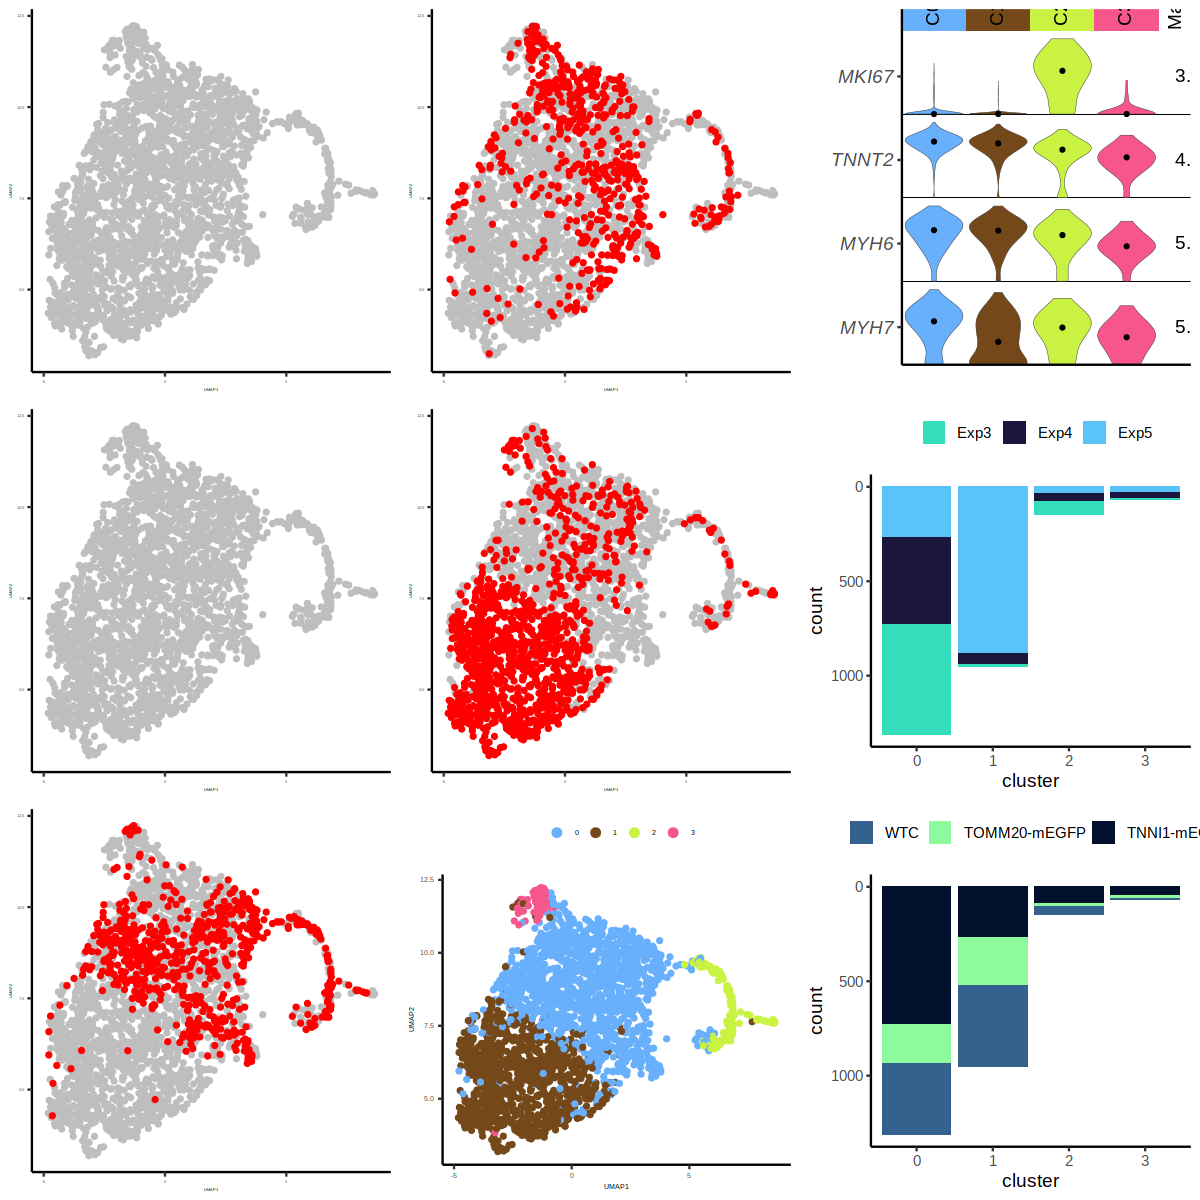

In [227]:
combo_plot = do.call("grid.arrange", c(plot_list, nrow=3, ncol=3, as.table = FALSE))
if (SAVE) {
    ggsave(combo_plot, filename = glue("{SVG_DIR}/supp_figure_6E_D26_diff_exps.svg"), device = "svg", width = 14, height=9, dpi = 300)
    ggsave(combo_plot, filename = glue("{PNG_DIR}/supp_figure_6E_D26_diff_exps.png"), device = "png", width = 10, height=10, dpi = 300)
}

### Supplemenatal Figure 7A, B, C, D, E F, G
- already have B in feature selection notebook

### Supp. FIgure 7A

In [343]:
cells.d12 <- rownames(cardio@meta.data[cardio@meta.data$day == "D12", ])
cells.d14 <- rownames(cardio@meta.data[cardio@meta.data$day == "D14", ])
cells.d24 <- rownames(cardio@meta.data[cardio@meta.data$day == "D24", ])
cells.d26 <- rownames(cardio@meta.data[cardio@meta.data$day == "D26", ])

In [344]:
mat.d12 <- cardio@raw.data[, cells.d12]
mat.d14 <- cardio@raw.data[, cells.d14]
mat.d24 <- cardio@raw.data[, cells.d24]
mat.d26 <- cardio@raw.data[, cells.d26]

early_df <- data.frame(sm = rowSums(mat.d12), cytokine = rowSums(mat.d14), row.names = rownames(mat.d12))

In [345]:
late_df <- data.frame(sm = rowSums(mat.d24), cytokine = rowSums(mat.d26), row.names = rownames(mat.d24))

In [384]:
p.early_corr <- ggplot(early_df, aes(log(sm + 1), log(cytokine + 1))) + geom_point(alpha = 0.1, size = 1) +
    labs(x = "Protocol 1", y = "Protocol 2", title = "D12/D14") +
    theme(text = element_text(size = 7), axis.text = element_text(size = 7)) +
    theme(plot.title = element_text(size=7)) +
    theme_bw() + theme(panel.border = element_blank(), panel.grid.major = element_blank(),
    panel.grid.minor = element_blank(), axis.line = element_line(colour = "black")) +
    annotate("text", x = 12, y = 0, label = "italic(r) [s]==0.97", parse = TRUE, hjust = 0, size = 4)


p.late_corr <- ggplot(late_df, aes(log(sm + 1), log(cytokine + 1))) + geom_point(alpha = 0.1, size = 1) +
    theme(text = element_text(size = 7), axis.text = element_text(size = 7)) +
    labs(x = "Protocol 1", y = "Protocol 2", title = "D24/D26") +
    theme(plot.title = element_text(size=7)) +
    theme_bw() + theme(panel.border = element_blank(), panel.grid.major = element_blank(),
    panel.grid.minor = element_blank(), axis.line = element_line(colour = "black")) +
    annotate("text", x = 12, y = 0, label = "italic(r) [s]==0.96", parse = TRUE, hjust = 0, size = 4)



In [385]:
options(repr.plot.width = 11, repr.plot.height = 6, repr.plot.res = 120)

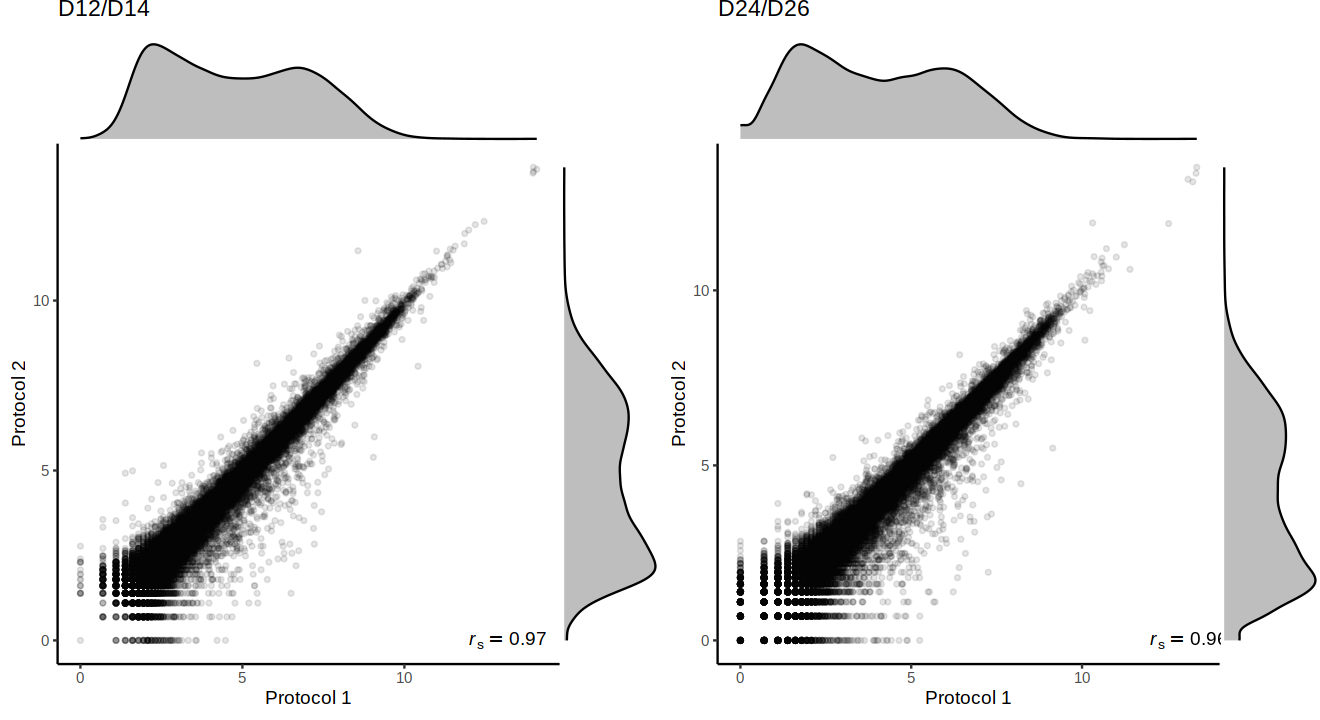

In [386]:
p.early_corr.marg <- ggMarginal(p.early_corr, fill = "gray")
p.late_corr.marg <- ggMarginal(p.late_corr, fill = "gray")
early_late_combo = grid.arrange(p.early_corr.marg, p.late_corr.marg, ncol=2)

In [387]:
if (SAVE) {
    ggsave(early_late_combo, filename = glue("{SVG_DIR}/supp_figure_7A_protocol_corr.svg"), device = "svg", width = 11, height=6, dpi = 300)
    ggsave(early_late_combo, filename = glue("{PNG_DIR}/supp_figure_7A_protocol_corr.png"), device = "png", width = 11, height=6, dpi = 300)
}

In [352]:
cor.test(log(early_df$sm + 1), log(early_df$cytokine + 1), method = "spearman", exact = FALSE)


	Spearman's rank correlation rho

data:  log(early_df$sm + 1) and log(early_df$cytokine + 1)
S = 1.0362e+11, p-value < 2.2e-16
alternative hypothesis: true rho is not equal to 0
sample estimates:
     rho 
0.973936 


In [353]:
cor.test(log(late_df$sm + 1), log(late_df$cytokine + 1), method = "spearman", exact = FALSE)


	Spearman's rank correlation rho

data:  log(late_df$sm + 1) and log(late_df$cytokine + 1)
S = 1.5575e+11, p-value < 2.2e-16
alternative hypothesis: true rho is not equal to 0
sample estimates:
      rho 
0.9608233 


### Supp Figure 7C protocol comparison Exp1

In [388]:
load("../protocol_experiment_cell_line_comparison/plots/protocol_comparison/7_10_2017/7_10_2017_experiments_protocol_cardio_clusters.RData")

In [389]:
exp1_umap_embeddings <- as.data.frame(GetCellEmbeddings(object = subset_cardio, reduction.type = "umap", dims.use = 1:2, cells.use = colnames(subset_cardio@data)))
exp1_umap_embeddings <- cbind(exp1_umap_embeddings, subset_cardio@meta.data[, c("day", "protocol", "cell_line", "seq_exp", "res.0.4", "res.0.5", "res.0.6", "res.0.8", "diff_exp", "nGene", "nUMI", "sample_num")])
exp1_umap_embeddings$tnnt2 <- subset_cardio@data["TNNT2", ]
exp1_umap_embeddings$cdh1 <- subset_cardio@data["CDH1", ]
exp1_umap_embeddings$mki67 <- subset_cardio@data["MKI67", ]
exp1_umap_embeddings$sox2 <- subset_cardio@data["SOX2", ]
exp1_umap_embeddings$myh6 <- subset_cardio@data["MYH6", ]
exp1_umap_embeddings$myh7 <- subset_cardio@data["MYH7", ]
exp1_umap_embeddings$mki67 <- subset_cardio@data["MKI67", ]

In [390]:
subset_cardio

An object of class seurat in project CardioDiff 
 28786 genes across 1396 samples.

In [391]:
unique(exp1_umap_embeddings$res.0.4)

[1] "3" "2" "0" "1"

In [392]:
unique(exp1_umap_embeddings$sample_num)

[1] "1" "3" "4" "2"

In [393]:
exp1_umap_embeddings$res.0.4 = factor(exp1_umap_embeddings$res.0.4, levels = c("0", "1", "2", "3"))

In [394]:
p.cluster_exp1 = make_umap_subset(exp1_umap_embeddings[sample(nrow(exp1_umap_embeddings), replace=FALSE), ], point_size = 1,
                                  font_size=4,
                                  guide_size=2,
                                  rasterize=FALSE,
                 color="res.0.4", 
                 values = c("0" = "#68AFFC",
                            "1" = "#754819",
                            "10" = "#2DADB8",
                            "2" = "#CAF243",
                            "3" = "#F6568B",
                            "4" = "#322799",
                            "5" = "#881C23",
                            "6" = "#F8A670",
                            "7" = "#F70C1B",
                            "8" = "#F2B0F6",
                            "9" = "#146C45"
                           ))

p.day_exp1 = make_umap_subset(exp1_umap_embeddings[sample(nrow(exp1_umap_embeddings), replace=FALSE), ], point_size = 1,
                              font_size=4,
                              guide_size=2,
                              rasterize=FALSE,
                 color="day", 
                 values = c("D12" = "#0098EA",
                            "D14" = "#706C75",
                            "D24" = "#FF91C4",
                            "D26" = "#1D009F"
                           ))

bar_cluster_by_sample <- ggplot(exp1_umap_embeddings, aes(x = res.0.4, fill = as.factor(sample_num))) + geom_bar() +
    scale_fill_manual(name="Sample",
        values = c("1" = "#68AFFC",
                                  "2" = "#754819",
                                  "3" = "#2DADB8",
                                  "4" = "#8270F6"
                                 
                                  )) +
    guides(fill = guide_legend(ncol = 1, override.aes = list(size=4))) +
    theme_bw() + theme(panel.border = element_blank(), panel.grid.major = element_blank(),
    panel.grid.minor = element_blank(), axis.line = element_line(colour = "black")) +
    theme(legend.position = "right") +
    xlab("cluster") +
    scale_y_reverse()

bar_cluster_by_cell_line <- ggplot(exp1_umap_embeddings, aes(x = res.0.4, fill = cell_line)) + geom_bar() +
    scale_fill_manual(name = "",
                             breaks = c("AICS0", "AICS11", "AICS37"), 
                             labels = c("WTC", "TOMM20-mEGFP", "TNNI1-mEGFP"),
                             values = c("AICS0" = "#35618F", "AICS11" = "#8DFA9D", "AICS37" = "#01102C")
                            ) +
    guides(fill = guide_legend(nrow = 1, override.aes = list(size=4))) +
    theme_bw() + theme(panel.border = element_blank(), panel.grid.major = element_blank(),
    panel.grid.minor = element_blank(), axis.line = element_line(colour = "black")) +
    theme(legend.position = "top") +
    xlab("cluster") +
    scale_y_reverse()

bar_day_by_cell_line <- ggplot(exp1_umap_embeddings, aes(x = day, fill = cell_line)) + geom_bar() +
    scale_fill_manual(name = "",
                             breaks = c("AICS0", "AICS11", "AICS37"), 
                             labels = c("WTC", "TOMM20-mEGFP", "TNNI1-mEGFP"),
                             values = c("AICS0" = "#35618F", "AICS11" = "#8DFA9D", "AICS37" = "#01102C")
                            ) +
    guides(fill = guide_legend(nrow = 1, override.aes = list(size=4))) +
    theme_bw() + theme(panel.border = element_blank(), panel.grid.major = element_blank(),
    panel.grid.minor = element_blank(), axis.line = element_line(colour = "black")) +
    theme(legend.position = "top") +
    xlab("cluster") +
    scale_y_reverse()

bar_cluster_by_protocol <- ggplot(exp1_umap_embeddings, aes(x = res.0.4, fill = protocol)) + geom_bar() +
                            scale_fill_manual(name = "",
                                              breaks = c("SM", "C"), 
                                              labels = c("Protocol 1", "Protocol 2"),
                                              values = c("SM" = "black",
                                                         "C" = "gray"
                                                        )
                                             ) +
                     guides(fill = guide_legend(nrow = 1, override.aes = list(size=4))) +
                     theme_bw() + theme(panel.border = element_blank(), panel.grid.major = element_blank(),
                     panel.grid.minor = element_blank(), axis.line = element_line(colour = "black")) +
                     theme(legend.position = "top") +
                     xlab("cluster") +
                     scale_y_reverse()

bar_cluster_by_day <- ggplot(exp1_umap_embeddings, aes(x = res.0.4, fill = day)) +
    geom_bar() +
    scale_fill_manual(name = "",
                         breaks = c("D12", "D14", "D24", "D26"), 
                         values = c("D12" = "#0098EA",
                                    "D14" = "#706C75",
                                    "D24" = "#FF91C4",
                                    "D26" = "#1D009F")
                      ) +
    guides(color = guide_legend(nrow = 1, override.aes = list(size=4))) +
    theme(legend.text = element_text(size = 13)) + 
    theme(legend.position = "top", legend.justification = "center") +
    theme(text = element_text(size = 13), axis.text = element_text(size = 13)) +
    theme_bw() + theme(panel.border = element_blank(), panel.grid.major = element_blank(),
    panel.grid.minor = element_blank(), axis.line = element_line(colour = "black")) +
    theme(legend.position = "top") +
    xlab("Cluster") +
    ylab("# of cells") +
    scale_y_reverse()

group_order = c("0", "1", "2", "3")
genes.plot = c("MKI67", "TNNT2", "MYH6", "MYH7")

p.violin_exp1 = cluster_group_violin(subset_cardio,
                     group_order=group_order,
                     resolution="res.0.4",
                     genes.plot=genes.plot,
                     cluster_color_df=cluster_color_df
                    )

Warning message:
“Column `cluster_id` joining character vector and factor, coercing into character vector”
Warning message:
“`fun.y` is deprecated. Use `fun` instead.”
Warning message:
“`fun.ymin` is deprecated. Use `fun.min` instead.”
Warning message:
“`fun.ymax` is deprecated. Use `fun.max` instead.”
Warning message:
“`fun.y` is deprecated. Use `fun` instead.”
Warning message:
“`fun.ymin` is deprecated. Use `fun.min` instead.”
Warning message:
“`fun.ymax` is deprecated. Use `fun.max` instead.”
Warning message:
“`fun.y` is deprecated. Use `fun` instead.”
Warning message:
“`fun.ymin` is deprecated. Use `fun.min` instead.”
Warning message:
“`fun.ymax` is deprecated. Use `fun.max` instead.”
Warning message:
“`fun.y` is deprecated. Use `fun` instead.”
Warning message:
“`fun.ymin` is deprecated. Use `fun.min` instead.”
Warning message:
“`fun.ymax` is deprecated. Use `fun.max` instead.”


MYH6 and MYH7 distributions

In [396]:
group_time = sapply(exp1_umap_embeddings$day,
                    FUN = function(x) {
                        if (x %in% c("D12", "D14")) {
                            return("D12v14")
                        }
                        else if (x %in% c("D24", "D26")) {
                            return("D24v26")
                        }
    
})

exp1_umap_embeddings$time = group_time

In [397]:
exp1_myh7 = ggplot(exp1_umap_embeddings, aes(x = myh7, fill=day)) + geom_density(alpha=0.5) + facet_grid(vars(time), scales="free_y") +
    scale_fill_manual(name = "",
                         breaks = c("D12", "D14", "D24", "D26"), 
                         values = c("D12" = "#0098EA",
                                    "D14" = "#706C75",
                                    "D24" = "#FF91C4",
                                    "D26" = "#1D009F"
                                  )
                        ) +
    theme_bw() + theme(panel.border = element_blank(), panel.grid.major = element_blank(),
    panel.grid.minor = element_blank(), axis.line = element_line(colour = "black")) +
    guides(color = guide_legend(nrow = 1, override.aes = list(size=2))) +
    theme(legend.text = element_text(size = 5)) + 
    theme(legend.position = "top", legend.justification = "center") +
    theme(text = element_text(size = 5), axis.text = element_text(size = 5))

In [398]:
exp1_myh6 = ggplot(exp1_umap_embeddings, aes(x = myh6, fill=day)) + geom_density(alpha=0.5) + facet_grid(vars(time), scales="free_y") +
    scale_fill_manual(name = "",
                         breaks = c("D12", "D14", "D24", "D26"), 
                         values = c("D12" = "#0098EA",
                                    "D14" = "#706C75",
                                    "D24" = "#FF91C4",
                                    "D26" = "#1D009F"
                                    )
                        ) +
    theme_bw() + theme(panel.border = element_blank(), panel.grid.major = element_blank(),
    panel.grid.minor = element_blank(), axis.line = element_line(colour = "black")) +
    guides(color = guide_legend(nrow = 1, override.aes = list(size=2))) +
    theme(legend.text = element_text(size = 5)) + 
    theme(legend.position = "top", legend.justification = "center") +
    theme(text = element_text(size = 5), axis.text = element_text(size = 5))

In [399]:
plot_list = list(
             p.day_exp1,
             p.cluster_exp1,
             p.violin_exp1,
             bar_cluster_by_day,
             bar_cluster_by_sample,
             exp1_myh6,
             exp1_myh7
            )

In [406]:
options(repr.plot.width = 3.5, repr.plot.height = 16, repr.plot.res = 120)

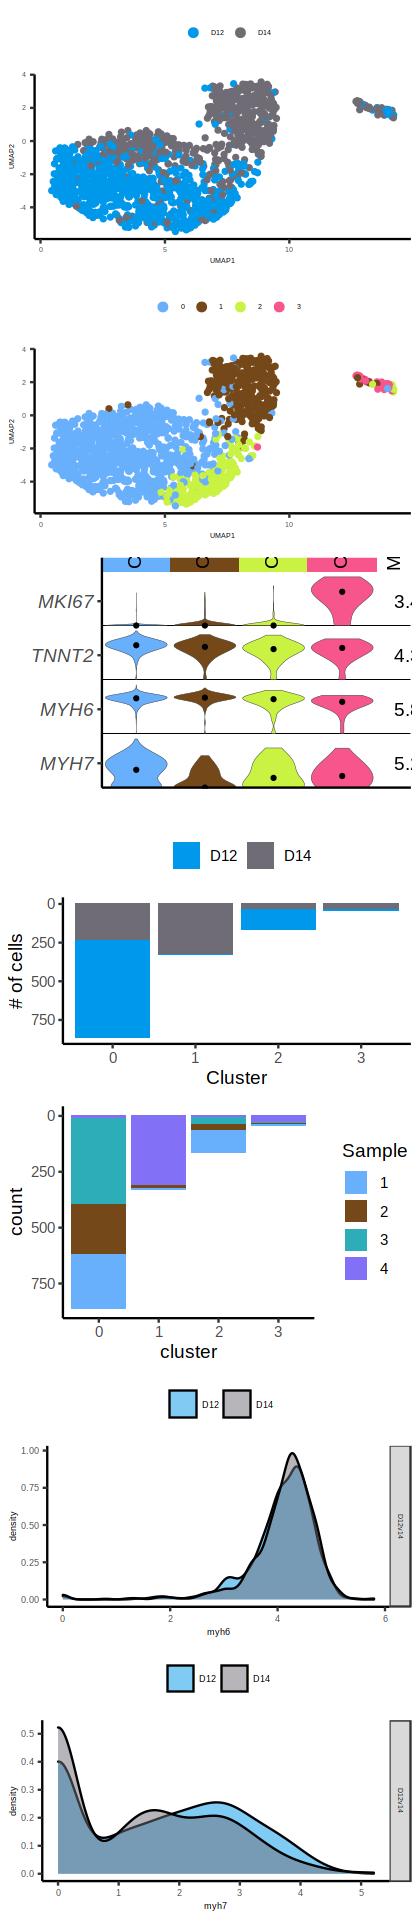

In [407]:
combo_plot = do.call("grid.arrange", c(plot_list, nrow=7, ncol=1, as.table = FALSE))

if (SAVE) {
    ggsave(combo_plot, filename = glue("{SVG_DIR}/supp_figure_7C_exp1.svg"), device = "svg", width = 3.5, height=16, dpi = 300)
    ggsave(combo_plot, filename = glue("{PNG_DIR}/supp_figure_7C_exp1.png"), device = "png", width = 3.5, height=16, dpi = 300)
}

### Supp Figure 7D protocol comparison Exp2

In [408]:
load("../protocol_experiment_cell_line_comparison/plots/protocol_comparison/7_13_2017/7_13_2017_experiments_protocol_cardio_clusters.RData")

In [409]:
exp2_umap_embeddings <- as.data.frame(GetCellEmbeddings(object = subset_cardio, reduction.type = "umap", dims.use = 1:2, cells.use = colnames(subset_cardio@data)))
exp2_umap_embeddings <- cbind(exp2_umap_embeddings, subset_cardio@meta.data[, c("day", "protocol", "cell_line", "seq_exp", "res.0.4", "res.0.5", "res.0.6", "res.0.8", "diff_exp", "nGene", "nUMI", "sample_num")])
exp2_umap_embeddings$tnnt2 <- subset_cardio@data["TNNT2", ]
exp2_umap_embeddings$cdh1 <- subset_cardio@data["CDH1", ]
exp2_umap_embeddings$mki67 <- subset_cardio@data["MKI67", ]
exp2_umap_embeddings$sox2 <- subset_cardio@data["SOX2", ]
exp2_umap_embeddings$myh6 <- subset_cardio@data["MYH6", ]
exp2_umap_embeddings$myh7 <- subset_cardio@data["MYH7", ]
exp2_umap_embeddings$mki67 <- subset_cardio@data["MKI67", ]

In [410]:
subset_cardio

An object of class seurat in project CardioDiff 
 28786 genes across 1850 samples.

In [411]:
unique(exp2_umap_embeddings$res.0.4)

[1] "2" "1" "0" "3"

In [412]:
unique(exp2_umap_embeddings$sample_num)

[1] "8"  "10" "6"  "9"  "7"  "5"

In [413]:
exp2_umap_embeddings$res.0.4 = factor(exp2_umap_embeddings$res.0.4, levels = c("0", "1", "2", "3"))

In [414]:
p.cluster_exp2 = make_umap_subset(exp2_umap_embeddings[sample(nrow(exp2_umap_embeddings), replace=FALSE), ], point_size = 1,
                                  font_size=4,
                                  guide_size=2,
                                  rasterize=FALSE,
                 color="res.0.4", 
                 values = c("0" = "#68AFFC",
                            "1" = "#754819",
                            "10" = "#2DADB8",
                            "2" = "#CAF243",
                            "3" = "#F6568B",
                            "4" = "#322799",
                            "5" = "#881C23",
                            "6" = "#F8A670",
                            "7" = "#F70C1B",
                            "8" = "#F2B0F6",
                            "9" = "#146C45"
                           ))

p.day_exp2 = make_umap_subset(exp2_umap_embeddings[sample(nrow(exp2_umap_embeddings), replace=FALSE), ], point_size = 1,
                              font_size=4,
                              guide_size=2,
                              rasterize=FALSE,
                 color="day", 
                 values = c("D12" = "#0098EA",
                            "D14" = "#706C75",
                            "D24" = "#FF91C4",
                            "D26" = "#1D009F"
                           ))

bar_cluster_by_sample <- ggplot(exp2_umap_embeddings, aes(x = res.0.4, fill = as.factor(sample_num))) + geom_bar() +
    scale_fill_manual(name="Sample",
        values = c(
                                  "5" = "#B3F1BB",
                                  "6" = "#0A60A8",
                                  "7" = "#64AF5C",
                                  "8" = "#CAF243",
                                  "9" = "#F6568B",
                                  "10" = "#322799"
                                 
                                  )) +
    guides(fill = guide_legend(ncol = 1, override.aes = list(size=4))) +
    theme_bw() + theme(panel.border = element_blank(), panel.grid.major = element_blank(),
    panel.grid.minor = element_blank(), axis.line = element_line(colour = "black")) +
    theme(legend.position = "right") +
    xlab("cluster") +
    scale_y_reverse()

bar_cluster_by_cell_line <- ggplot(exp2_umap_embeddings, aes(x = res.0.4, fill = cell_line)) + geom_bar() +
    scale_fill_manual(name = "",
                             breaks = c("AICS0", "AICS11", "AICS37"), 
                             labels = c("WTC", "TOMM20-mEGFP", "TNNI1-mEGFP"),
                             values = c("AICS0" = "#35618F", "AICS11" = "#8DFA9D", "AICS37" = "#01102C")
                            ) +
    guides(fill = guide_legend(nrow = 1, override.aes = list(size=4))) +
    theme_bw() + theme(panel.border = element_blank(), panel.grid.major = element_blank(),
    panel.grid.minor = element_blank(), axis.line = element_line(colour = "black")) +
    theme(legend.position = "top") +
    xlab("cluster") +
    scale_y_reverse()

bar_day_by_cell_line <- ggplot(exp2_umap_embeddings, aes(x = day, fill = cell_line)) + geom_bar() +
    scale_fill_manual(name = "",
                             breaks = c("AICS0", "AICS11", "AICS37"), 
                             labels = c("WTC", "TOMM20-mEGFP", "TNNI1-mEGFP"),
                             values = c("AICS0" = "#35618F", "AICS11" = "#8DFA9D", "AICS37" = "#01102C")
                            ) +
    guides(fill = guide_legend(nrow = 1, override.aes = list(size=4))) +
    theme_bw() + theme(panel.border = element_blank(), panel.grid.major = element_blank(),
    panel.grid.minor = element_blank(), axis.line = element_line(colour = "black")) +
    theme(legend.position = "top") +
    xlab("cluster") +
    scale_y_reverse()

bar_cluster_by_protocol <- ggplot(exp2_umap_embeddings, aes(x = res.0.4, fill = protocol)) + geom_bar() +
                            scale_fill_manual(name = "",
                                              breaks = c("SM", "C"), 
                                              labels = c("Protocol 1", "Protocol 2"),
                                              values = c("SM" = "black",
                                                         "C" = "gray"
                                                        )
                                             ) +
                     guides(fill = guide_legend(nrow = 1, override.aes = list(size=4))) +
                     theme_bw() + theme(panel.border = element_blank(), panel.grid.major = element_blank(),
                     panel.grid.minor = element_blank(), axis.line = element_line(colour = "black")) +
                     theme(legend.position = "top") +
                     xlab("cluster") +
                     scale_y_reverse()

bar_cluster_by_day <- ggplot(exp2_umap_embeddings, aes(x = res.0.4, fill = day)) +
    geom_bar() +
    scale_fill_manual(name = "",
                         breaks = c("D12", "D14", "D24", "D26"), 
                         values = c("D12" = "#0098EA",
                                    "D14" = "#706C75",
                                    "D24" = "#FF91C4",
                                    "D26" = "#1D009F")
                      ) +
    guides(color = guide_legend(nrow = 1, override.aes = list(size=4))) +
    theme(legend.text = element_text(size = 13)) + 
    theme(legend.position = "top", legend.justification = "center") +
    theme(text = element_text(size = 13), axis.text = element_text(size = 13)) +
    theme_bw() + theme(panel.border = element_blank(), panel.grid.major = element_blank(),
    panel.grid.minor = element_blank(), axis.line = element_line(colour = "black")) +
    theme(legend.position = "top") +
    xlab("Cluster") +
    ylab("# of cells") +
    scale_y_reverse()

group_order = c("0", "1", "2", "3")
genes.plot = c("MKI67", "TNNT2", "MYH6", "MYH7")

p.violin_exp2 = cluster_group_violin(subset_cardio,
                     group_order=group_order,
                     resolution="res.0.4",
                     genes.plot=genes.plot,
                     cluster_color_df=cluster_color_df
                    )

Warning message:
“Column `cluster_id` joining character vector and factor, coercing into character vector”
Warning message:
“`fun.y` is deprecated. Use `fun` instead.”
Warning message:
“`fun.ymin` is deprecated. Use `fun.min` instead.”
Warning message:
“`fun.ymax` is deprecated. Use `fun.max` instead.”
Warning message:
“`fun.y` is deprecated. Use `fun` instead.”
Warning message:
“`fun.ymin` is deprecated. Use `fun.min` instead.”
Warning message:
“`fun.ymax` is deprecated. Use `fun.max` instead.”
Warning message:
“`fun.y` is deprecated. Use `fun` instead.”
Warning message:
“`fun.ymin` is deprecated. Use `fun.min` instead.”
Warning message:
“`fun.ymax` is deprecated. Use `fun.max` instead.”
Warning message:
“`fun.y` is deprecated. Use `fun` instead.”
Warning message:
“`fun.ymin` is deprecated. Use `fun.min` instead.”
Warning message:
“`fun.ymax` is deprecated. Use `fun.max` instead.”


MYH6 and MYH7 distributions

In [415]:
group_time = sapply(exp2_umap_embeddings$day,
                    FUN = function(x) {
                        if (x %in% c("D12", "D14")) {
                            return("D12v14")
                        }
                        else if (x %in% c("D24", "D26")) {
                            return("D24v26")
                        }
    
})

exp2_umap_embeddings$time = group_time

In [416]:
exp2_myh7 = ggplot(exp2_umap_embeddings, aes(x = myh7, fill=day)) + geom_density(alpha=0.5) + facet_grid(vars(time), scales="free_y") +
    scale_fill_manual(name = "",
                         breaks = c("D12", "D14", "D24", "D26"), 
                         values = c("D12" = "#0098EA",
                                    "D14" = "#706C75",
                                    "D24" = "#FF91C4",
                                    "D26" = "#1D009F"
                                  )
                        ) +
    theme_bw() + theme(panel.border = element_blank(), panel.grid.major = element_blank(),
    panel.grid.minor = element_blank(), axis.line = element_line(colour = "black")) +
    guides(color = guide_legend(nrow = 1, override.aes = list(size=2))) +
    theme(legend.text = element_text(size = 5)) + 
    theme(legend.position = "top", legend.justification = "center") +
    theme(text = element_text(size = 5), axis.text = element_text(size = 5))

In [417]:
exp2_myh6 = ggplot(exp2_umap_embeddings, aes(x = myh6, fill=day)) + geom_density(alpha=0.5) + facet_grid(vars(time), scales="free_y") +
    scale_fill_manual(name = "",
                         breaks = c("D12", "D14", "D24", "D26"), 
                         values = c("D12" = "#0098EA",
                                    "D14" = "#706C75",
                                    "D24" = "#FF91C4",
                                    "D26" = "#1D009F"
                                    )
                        ) +
    theme_bw() + theme(panel.border = element_blank(), panel.grid.major = element_blank(),
    panel.grid.minor = element_blank(), axis.line = element_line(colour = "black")) +
    guides(color = guide_legend(nrow = 1, override.aes = list(size=2))) +
    theme(legend.text = element_text(size = 5)) + 
    theme(legend.position = "top", legend.justification = "center") +
    theme(text = element_text(size = 5), axis.text = element_text(size = 5))

In [418]:
options(repr.plot.width = 3.5, repr.plot.height = 16, repr.plot.res = 120)

In [419]:
plot_list = list(
             p.day_exp2,
             p.cluster_exp2,
             p.violin_exp2,
             bar_cluster_by_day,
             bar_cluster_by_sample,
    exp2_myh6,
    exp2_myh7
            )

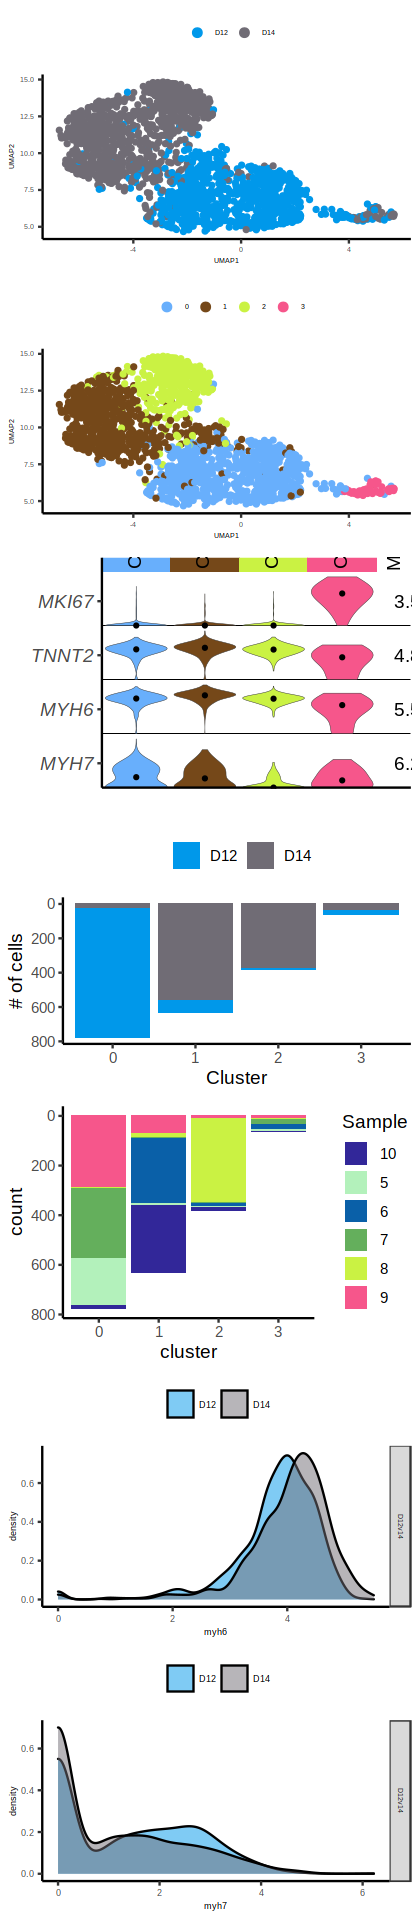

In [421]:
combo_plot = do.call("grid.arrange", c(plot_list, nrow=7, ncol=1, as.table = FALSE))

if (SAVE) {
    ggsave(combo_plot, filename = glue("{SVG_DIR}/supp_figure_7D_exp2.svg"), device = "svg", width = 3.5, height=16, dpi = 300)
    ggsave(combo_plot, filename = glue("{PNG_DIR}/supp_figure_7D_exp2.png"), device = "png", width = 3.5, height=16, dpi = 300)
}

### Supp Figure 7E protocol comparison Exp3

In [422]:
load("../protocol_experiment_cell_line_comparison/plots/protocol_comparison/7_20_2017/7_20_2017_experiments_protocol_cardio_clusters.RData")

In [423]:
exp3_umap_embeddings <- as.data.frame(GetCellEmbeddings(object = subset_cardio, reduction.type = "umap", dims.use = 1:2, cells.use = colnames(subset_cardio@data)))
exp3_umap_embeddings <- cbind(exp3_umap_embeddings, subset_cardio@meta.data[, c("day", "protocol", "cell_line", "seq_exp", "res.0.4", "res.0.5", "res.0.6", "res.0.8", "diff_exp", "nGene", "nUMI", "sample_num")])
exp3_umap_embeddings$tnnt2 <- subset_cardio@data["TNNT2", ]
exp3_umap_embeddings$cdh1 <- subset_cardio@data["CDH1", ]
exp3_umap_embeddings$mki67 <- subset_cardio@data["MKI67", ]
exp3_umap_embeddings$sox2 <- subset_cardio@data["SOX2", ]
exp3_umap_embeddings$myh6 <- subset_cardio@data["MYH6", ]
exp3_umap_embeddings$myh7 <- subset_cardio@data["MYH7", ]
exp3_umap_embeddings$mki67 <- subset_cardio@data["MKI67", ]

In [424]:
subset_cardio

An object of class seurat in project CardioDiff 
 28786 genes across 2446 samples.

In [425]:
unique(exp3_umap_embeddings$res.0.4)

[1] "0" "2" "3" "1"

In [426]:
unique(exp3_umap_embeddings$sample_num)

[1] "29" "31" "13" "12" "30" "14" "11" "32"

In [427]:
exp3_umap_embeddings$res.0.4 = factor(exp3_umap_embeddings$res.0.4, levels = c("0", "1", "2", "3"))

In [428]:
p.cluster_exp3 = make_umap_subset(exp3_umap_embeddings[sample(nrow(exp3_umap_embeddings), replace=FALSE), ], point_size = 1,
                                  font_size=4,
                                  guide_size=2,
                                  rasterize=FALSE,
                 color="res.0.4", 
                 values = c("0" = "#68AFFC",
                            "1" = "#754819",
                            "10" = "#2DADB8",
                            "2" = "#CAF243",
                            "3" = "#F6568B",
                            "4" = "#322799",
                            "5" = "#881C23",
                            "6" = "#F8A670",
                            "7" = "#F70C1B",
                            "8" = "#F2B0F6",
                            "9" = "#146C45"
                           ))

p.day_exp3 = make_umap_subset(exp3_umap_embeddings[sample(nrow(exp3_umap_embeddings), replace=FALSE), ], point_size = 1,
                              font_size=4,
                              guide_size=2,
                              rasterize=FALSE,
                 color="day", 
                 values = c("D12" = "#0098EA",
                            "D14" = "#706C75",
                            "D24" = "#FF91C4",
                            "D26" = "#1D009F"
                           ))

bar_cluster_by_sample <- ggplot(exp3_umap_embeddings, aes(x = res.0.4, fill = as.factor(sample_num))) + geom_bar() +
    scale_fill_manual(name="Sample",
        values = c(                             
                                  "11" = "#0A60A8",
                                  "12" = "#64AF5C",
                                  "13" = "#CAF243",
                                  "14" = "#F6568B",
                                  "30" = "#322799",
                                  "31" = "#881C23",
                                  "32" = "#F8A670",
                                  "29" = "#F70C1B"
                                 
                                  )) +
    guides(fill = guide_legend(ncol = 1, override.aes = list(size=4))) +
    theme_bw() + theme(panel.border = element_blank(), panel.grid.major = element_blank(),
    panel.grid.minor = element_blank(), axis.line = element_line(colour = "black")) +
    theme(legend.position = "right") +
    xlab("cluster") +
    scale_y_reverse()

bar_cluster_by_cell_line <- ggplot(exp3_umap_embeddings, aes(x = res.0.4, fill = cell_line)) + geom_bar() +
    scale_fill_manual(name = "",
                             breaks = c("AICS0", "AICS11", "AICS37"), 
                             labels = c("WTC", "TOMM20-mEGFP", "TNNI1-mEGFP"),
                             values = c("AICS0" = "#35618F", "AICS11" = "#8DFA9D", "AICS37" = "#01102C")
                            ) +
    guides(fill = guide_legend(nrow = 1, override.aes = list(size=4))) +
    theme_bw() + theme(panel.border = element_blank(), panel.grid.major = element_blank(),
    panel.grid.minor = element_blank(), axis.line = element_line(colour = "black")) +
    theme(legend.position = "top") +
    xlab("cluster") +
    scale_y_reverse()

bar_day_by_cell_line <- ggplot(exp3_umap_embeddings, aes(x = day, fill = cell_line)) + geom_bar() +
    scale_fill_manual(name = "",
                             breaks = c("AICS0", "AICS11", "AICS37"), 
                             labels = c("WTC", "TOMM20-mEGFP", "TNNI1-mEGFP"),
                             values = c("AICS0" = "#35618F", "AICS11" = "#8DFA9D", "AICS37" = "#01102C")
                            ) +
    guides(fill = guide_legend(nrow = 1, override.aes = list(size=4))) +
    theme_bw() + theme(panel.border = element_blank(), panel.grid.major = element_blank(),
    panel.grid.minor = element_blank(), axis.line = element_line(colour = "black")) +
    theme(legend.position = "top") +
    xlab("cluster") +
    scale_y_reverse()

bar_cluster_by_protocol <- ggplot(exp3_umap_embeddings, aes(x = res.0.4, fill = protocol)) + geom_bar() +
                            scale_fill_manual(name = "",
                                              breaks = c("SM", "C"), 
                                              labels = c("Protocol 1", "Protocol 2"),
                                              values = c("SM" = "black",
                                                         "C" = "gray"
                                                        )
                                             ) +
                     guides(fill = guide_legend(nrow = 1, override.aes = list(size=4))) +
                     theme_bw() + theme(panel.border = element_blank(), panel.grid.major = element_blank(),
                     panel.grid.minor = element_blank(), axis.line = element_line(colour = "black")) +
                     theme(legend.position = "top") +
                     xlab("cluster") +
                     scale_y_reverse()

bar_cluster_by_day <- ggplot(exp3_umap_embeddings, aes(x = res.0.4, fill = day)) +
    geom_bar() +
    scale_fill_manual(name = "",
                         breaks = c("D12", "D14", "D24", "D26"), 
                         values = c("D12" = "#0098EA",
                                    "D14" = "#706C75",
                                    "D24" = "#FF91C4",
                                    "D26" = "#1D009F")
                      ) +
    guides(color = guide_legend(nrow = 1, override.aes = list(size=4))) +
    theme(legend.text = element_text(size = 13)) + 
    theme(legend.position = "top", legend.justification = "center") +
    theme(text = element_text(size = 13), axis.text = element_text(size = 13)) +
    theme_bw() + theme(panel.border = element_blank(), panel.grid.major = element_blank(),
    panel.grid.minor = element_blank(), axis.line = element_line(colour = "black")) +
    theme(legend.position = "top") +
    xlab("Cluster") +
    ylab("# of cells") +
    scale_y_reverse()

group_order = c("0", "1", "2", "3")
genes.plot = c("MKI67", "TNNT2", "MYH6", "MYH7")

p.violin_exp3 = cluster_group_violin(subset_cardio,
                     group_order=group_order,
                     resolution="res.0.4",
                     genes.plot=genes.plot,
                     cluster_color_df=cluster_color_df
                    )

Warning message:
“Column `cluster_id` joining character vector and factor, coercing into character vector”
Warning message:
“`fun.y` is deprecated. Use `fun` instead.”
Warning message:
“`fun.ymin` is deprecated. Use `fun.min` instead.”
Warning message:
“`fun.ymax` is deprecated. Use `fun.max` instead.”
Warning message:
“`fun.y` is deprecated. Use `fun` instead.”
Warning message:
“`fun.ymin` is deprecated. Use `fun.min` instead.”
Warning message:
“`fun.ymax` is deprecated. Use `fun.max` instead.”
Warning message:
“`fun.y` is deprecated. Use `fun` instead.”
Warning message:
“`fun.ymin` is deprecated. Use `fun.min` instead.”
Warning message:
“`fun.ymax` is deprecated. Use `fun.max` instead.”
Warning message:
“`fun.y` is deprecated. Use `fun` instead.”
Warning message:
“`fun.ymin` is deprecated. Use `fun.min` instead.”
Warning message:
“`fun.ymax` is deprecated. Use `fun.max` instead.”


MYH6 and MYH7 distributions

In [429]:
group_time = sapply(exp3_umap_embeddings$day,
                    FUN = function(x) {
                        if (x %in% c("D12", "D14")) {
                            return("D12v14")
                        }
                        else if (x %in% c("D24", "D26")) {
                            return("D24v26")
                        }
    
})

exp3_umap_embeddings$time = group_time

In [430]:
exp3_myh7 = ggplot(exp3_umap_embeddings, aes(x = myh7, fill=day)) + geom_density(alpha=0.5) + facet_grid(vars(time), scales="free_y") +
    scale_fill_manual(name = "",
                         breaks = c("D12", "D14", "D24", "D26"), 
                         values = c("D12" = "#0098EA",
                                    "D14" = "#706C75",
                                    "D24" = "#FF91C4",
                                    "D26" = "#1D009F"
                                  )
                        ) +
    theme_bw() + theme(panel.border = element_blank(), panel.grid.major = element_blank(),
    panel.grid.minor = element_blank(), axis.line = element_line(colour = "black")) +
    guides(color = guide_legend(nrow = 1, override.aes = list(size=2))) +
    theme(legend.text = element_text(size = 5)) + 
    theme(legend.position = "top", legend.justification = "center") +
    theme(text = element_text(size = 5), axis.text = element_text(size = 5))

In [431]:
exp3_myh6 = ggplot(exp3_umap_embeddings, aes(x = myh6, fill=day)) + geom_density(alpha=0.5) + facet_grid(vars(time), scales="free_y") +
    scale_fill_manual(name = "",
                         breaks = c("D12", "D14", "D24", "D26"), 
                         values = c("D12" = "#0098EA",
                                    "D14" = "#706C75",
                                    "D24" = "#FF91C4",
                                    "D26" = "#1D009F"
                                    )
                        ) +
    theme_bw() + theme(panel.border = element_blank(), panel.grid.major = element_blank(),
    panel.grid.minor = element_blank(), axis.line = element_line(colour = "black")) +
    guides(color = guide_legend(nrow = 1, override.aes = list(size=2))) +
    theme(legend.text = element_text(size = 5)) + 
    theme(legend.position = "top", legend.justification = "center") +
    theme(text = element_text(size = 5), axis.text = element_text(size = 5))

In [432]:
options(repr.plot.width = 3.5, repr.plot.height = 16, repr.plot.res = 120)

In [436]:
plot_list = list(
             p.day_exp3,
             p.cluster_exp3,
             p.violin_exp3,
             bar_cluster_by_day,
    bar_cluster_by_sample,
    exp3_myh6,
    exp3_myh7
             
            )

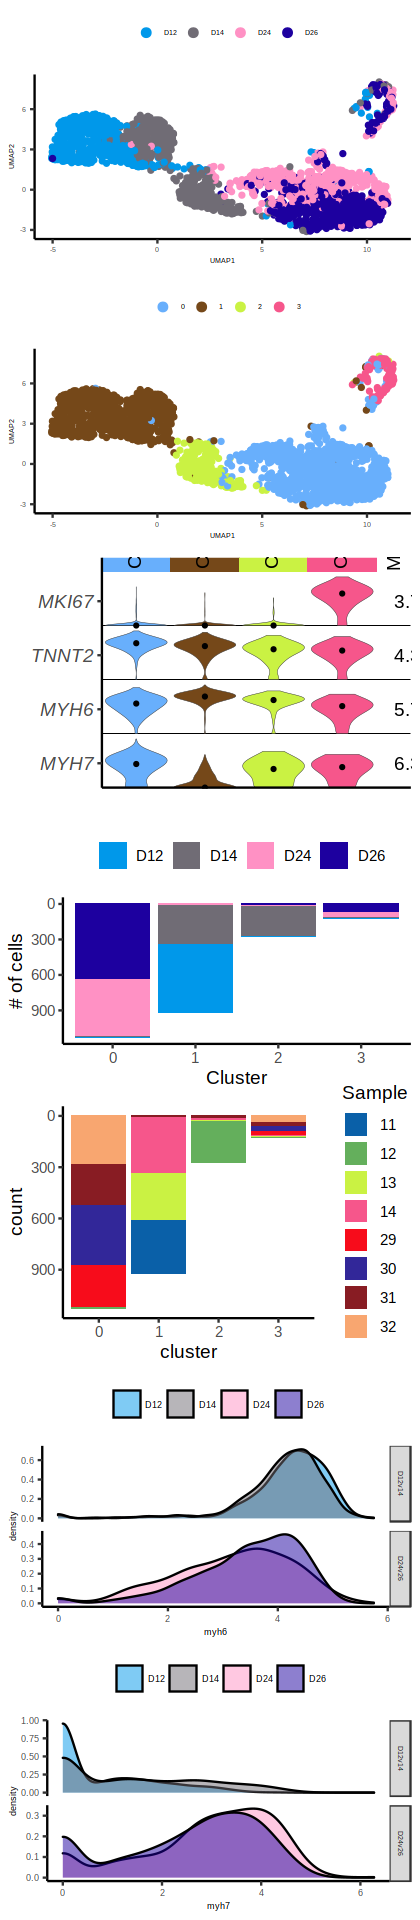

In [437]:
combo_plot = do.call("grid.arrange", c(plot_list, nrow=7, ncol=1, as.table = FALSE))

if (SAVE) {
    ggsave(combo_plot, filename = glue("{SVG_DIR}/supp_figure_7E_exp3.svg"), device = "svg", width = 3.5, height=16, dpi = 300)
    ggsave(combo_plot, filename = glue("{PNG_DIR}/supp_figure_7E_exp3.png"), device = "png", width = 3.5, height=16, dpi = 300)
}

### Supp Figure 7F protocol comparison Exp4

In [438]:
load("../protocol_experiment_cell_line_comparison/plots/protocol_comparison/7_24_2017/7_24_2017_experiments_protocol_cardio_clusters.RData")

In [439]:
exp4_umap_embeddings <- as.data.frame(GetCellEmbeddings(object = subset_cardio, reduction.type = "umap", dims.use = 1:2, cells.use = colnames(subset_cardio@data)))
exp4_umap_embeddings <- cbind(exp4_umap_embeddings, subset_cardio@meta.data[, c("day", "protocol", "cell_line", "seq_exp", "res.0.4", "res.0.5", "res.0.6", "res.0.8", "diff_exp", "nGene", "nUMI", "sample_num")])
exp4_umap_embeddings$tnnt2 <- subset_cardio@data["TNNT2", ]
exp4_umap_embeddings$cdh1 <- subset_cardio@data["CDH1", ]
exp4_umap_embeddings$mki67 <- subset_cardio@data["MKI67", ]
exp4_umap_embeddings$sox2 <- subset_cardio@data["SOX2", ]
exp4_umap_embeddings$myh6 <- subset_cardio@data["MYH6", ]
exp4_umap_embeddings$myh7 <- subset_cardio@data["MYH7", ]
exp4_umap_embeddings$mki67 <- subset_cardio@data["MKI67", ]

In [440]:
subset_cardio

An object of class seurat in project CardioDiff 
 28786 genes across 2911 samples.

In [441]:
unique(exp4_umap_embeddings$res.0.4)

[1] "3" "2" "5" "1" "0" "4"

In [442]:
unique(exp4_umap_embeddings$sample_num)

[1] "33" "20" "34" "15" "38" "16" "37" "17" "35" "19" "18" "36"

In [443]:
exp4_umap_embeddings$res.0.4 = factor(exp4_umap_embeddings$res.0.4, levels = c("0", "1", "2", "3", "4", "5"))

In [444]:
p.cluster_exp4 = make_umap_subset(exp4_umap_embeddings[sample(nrow(exp4_umap_embeddings), replace=FALSE), ], point_size = 1,
                                  font_size=4,
                                  guide_size=2,
                                  rasterize=FALSE,
                 color="res.0.4", 
                 values = c("0" = "#68AFFC",
                            "1" = "#754819",
                            "10" = "#2DADB8",
                            "2" = "#CAF243",
                            "3" = "#F6568B",
                            "4" = "#322799",
                            "5" = "#881C23",
                            "6" = "#F8A670",
                            "7" = "#F70C1B",
                            "8" = "#F2B0F6",
                            "9" = "#146C45"
                           ))

p.day_exp4 = make_umap_subset(exp4_umap_embeddings[sample(nrow(exp4_umap_embeddings), replace=FALSE), ], point_size = 1,
                              font_size=4,
                              guide_size=2,
                              rasterize=FALSE,
                 color="day", 
                 values = c("D12" = "#0098EA",
                            "D14" = "#706C75",
                            "D24" = "#FF91C4",
                            "D26" = "#1D009F"
                           ))

bar_cluster_by_sample <- ggplot(exp4_umap_embeddings, aes(x = res.0.4, fill = as.factor(sample_num))) + geom_bar() +
    scale_fill_manual(name="Sample",
        values = c(
                                  "15" = "#B3F1BB",
                                  "16" = "#0A60A8",
                                  "17" = "#64AF5C",
                                  "18" = "#CAF243",
                                  "19" = "#F6568B",
                                  "20" = "#322799",
                                  "33" = "#881C23",
                                  "34" = "#F8A670",
                                  "35" = "#F70C1B",
                                  "36" = "#F2B0F6",
                                  "37" = "#146C45",
                                  "38" = "gray"
                                 
                                  )) +
    guides(fill = guide_legend(ncol = 1, override.aes = list(size=4))) +
    theme_bw() + theme(panel.border = element_blank(), panel.grid.major = element_blank(),
    panel.grid.minor = element_blank(), axis.line = element_line(colour = "black")) +
    theme(legend.position = "right") +
    xlab("cluster") +
    scale_y_reverse()

bar_cluster_by_cell_line <- ggplot(exp4_umap_embeddings, aes(x = res.0.4, fill = cell_line)) + geom_bar() +
    scale_fill_manual(name = "",
                             breaks = c("AICS0", "AICS11", "AICS37"), 
                             labels = c("WTC", "TOMM20-mEGFP", "TNNI1-mEGFP"),
                             values = c("AICS0" = "#35618F", "AICS11" = "#8DFA9D", "AICS37" = "#01102C")
                            ) +
    guides(fill = guide_legend(nrow = 1, override.aes = list(size=4))) +
    theme_bw() + theme(panel.border = element_blank(), panel.grid.major = element_blank(),
    panel.grid.minor = element_blank(), axis.line = element_line(colour = "black")) +
    theme(legend.position = "top") +
    xlab("cluster") +
    scale_y_reverse()

bar_day_by_cell_line <- ggplot(exp4_umap_embeddings, aes(x = day, fill = cell_line)) + geom_bar() +
    scale_fill_manual(name = "",
                             breaks = c("AICS0", "AICS11", "AICS37"), 
                             labels = c("WTC", "TOMM20-mEGFP", "TNNI1-mEGFP"),
                             values = c("AICS0" = "#35618F", "AICS11" = "#8DFA9D", "AICS37" = "#01102C")
                            ) +
    guides(fill = guide_legend(nrow = 1, override.aes = list(size=4))) +
    theme_bw() + theme(panel.border = element_blank(), panel.grid.major = element_blank(),
    panel.grid.minor = element_blank(), axis.line = element_line(colour = "black")) +
    theme(legend.position = "top") +
    xlab("cluster") +
    scale_y_reverse()

bar_cluster_by_protocol <- ggplot(exp4_umap_embeddings, aes(x = res.0.4, fill = protocol)) + geom_bar() +
                            scale_fill_manual(name = "",
                                              breaks = c("SM", "C"), 
                                              labels = c("Protocol 1", "Protocol 2"),
                                              values = c("SM" = "black",
                                                         "C" = "gray"
                                                        )
                                             ) +
                     guides(fill = guide_legend(nrow = 1, override.aes = list(size=4))) +
                     theme_bw() + theme(panel.border = element_blank(), panel.grid.major = element_blank(),
                     panel.grid.minor = element_blank(), axis.line = element_line(colour = "black")) +
                     theme(legend.position = "top") +
                     xlab("cluster") +
                     scale_y_reverse()

bar_cluster_by_day <- ggplot(exp4_umap_embeddings, aes(x = res.0.4, fill = day)) +
    geom_bar() +
    scale_fill_manual(name = "",
                         breaks = c("D12", "D14", "D24", "D26"), 
                         values = c("D12" = "#0098EA",
                                    "D14" = "#706C75",
                                    "D24" = "#FF91C4",
                                    "D26" = "#1D009F")
                      ) +
    guides(color = guide_legend(nrow = 1, override.aes = list(size=4))) +
    theme(legend.text = element_text(size = 13)) + 
    theme(legend.position = "top", legend.justification = "center") +
    theme(text = element_text(size = 13), axis.text = element_text(size = 13)) +
    theme_bw() + theme(panel.border = element_blank(), panel.grid.major = element_blank(),
    panel.grid.minor = element_blank(), axis.line = element_line(colour = "black")) +
    theme(legend.position = "top") +
    xlab("Cluster") +
    ylab("# of cells") +
    scale_y_reverse()

group_order = c("0", "1", "2", "3", "4", "5")
genes.plot = c("MKI67", "TNNT2", "MYH6", "MYH7")

p.violin_exp4 = cluster_group_violin(subset_cardio,
                     group_order=group_order,
                     resolution="res.0.4",
                     genes.plot=genes.plot,
                     cluster_color_df=cluster_color_df
                    )

Warning message:
“Column `cluster_id` joining character vector and factor, coercing into character vector”
Warning message:
“`fun.y` is deprecated. Use `fun` instead.”
Warning message:
“`fun.ymin` is deprecated. Use `fun.min` instead.”
Warning message:
“`fun.ymax` is deprecated. Use `fun.max` instead.”
Warning message:
“`fun.y` is deprecated. Use `fun` instead.”
Warning message:
“`fun.ymin` is deprecated. Use `fun.min` instead.”
Warning message:
“`fun.ymax` is deprecated. Use `fun.max` instead.”
Warning message:
“`fun.y` is deprecated. Use `fun` instead.”
Warning message:
“`fun.ymin` is deprecated. Use `fun.min` instead.”
Warning message:
“`fun.ymax` is deprecated. Use `fun.max` instead.”
Warning message:
“`fun.y` is deprecated. Use `fun` instead.”
Warning message:
“`fun.ymin` is deprecated. Use `fun.min` instead.”
Warning message:
“`fun.ymax` is deprecated. Use `fun.max` instead.”


MYH6 and MYH7 distributions

In [445]:
group_time = sapply(exp4_umap_embeddings$day,
                    FUN = function(x) {
                        if (x %in% c("D12", "D14")) {
                            return("D12v14")
                        }
                        else if (x %in% c("D24", "D26")) {
                            return("D24v26")
                        }
    
})

exp4_umap_embeddings$time = group_time

In [446]:
exp4_myh7 = ggplot(exp4_umap_embeddings, aes(x = myh7, fill=day)) + geom_density(alpha=0.5) + facet_grid(vars(time), scales="free_y") +
    scale_fill_manual(name = "",
                         breaks = c("D12", "D14", "D24", "D26"), 
                         values = c("D12" = "#0098EA",
                                    "D14" = "#706C75",
                                    "D24" = "#FF91C4",
                                    "D26" = "#1D009F"
                                  )
                        ) +
    theme_bw() + theme(panel.border = element_blank(), panel.grid.major = element_blank(),
    panel.grid.minor = element_blank(), axis.line = element_line(colour = "black")) +
    guides(color = guide_legend(nrow = 1, override.aes = list(size=2))) +
    theme(legend.text = element_text(size = 5)) + 
    theme(legend.position = "top", legend.justification = "center") +
    theme(text = element_text(size = 5), axis.text = element_text(size = 5))

In [447]:
exp4_myh6 = ggplot(exp4_umap_embeddings, aes(x = myh6, fill=day)) + geom_density(alpha=0.5) + facet_grid(vars(time), scales="free_y") +
    scale_fill_manual(name = "",
                         breaks = c("D12", "D14", "D24", "D26"), 
                         values = c("D12" = "#0098EA",
                                    "D14" = "#706C75",
                                    "D24" = "#FF91C4",
                                    "D26" = "#1D009F"
                                    )
                        ) +
    theme_bw() + theme(panel.border = element_blank(), panel.grid.major = element_blank(),
    panel.grid.minor = element_blank(), axis.line = element_line(colour = "black")) +
    guides(color = guide_legend(nrow = 1, override.aes = list(size=2))) +
    theme(legend.text = element_text(size = 5)) + 
    theme(legend.position = "top", legend.justification = "center") +
    theme(text = element_text(size = 5), axis.text = element_text(size = 5))

In [448]:
options(repr.plot.width = 3.5, repr.plot.height = 16, repr.plot.res = 120)

In [449]:
plot_list = list(
             p.day_exp4,
             p.cluster_exp4,
             p.violin_exp4,
             bar_cluster_by_day,
             bar_cluster_by_sample,
    exp4_myh6,
    exp4_myh7
            )

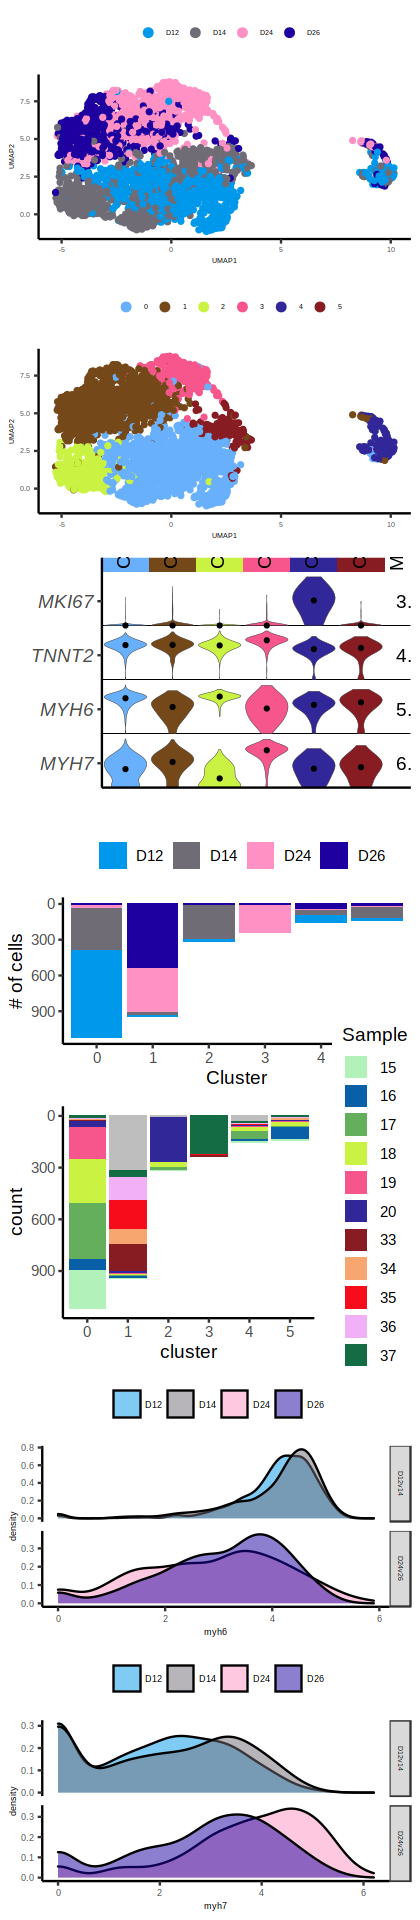

In [451]:
combo_plot = do.call("grid.arrange", c(plot_list, nrow=7, ncol=1, as.table = FALSE))

if (SAVE) {
    ggsave(combo_plot, filename = glue("{SVG_DIR}/supp_figure_7F_exp4.svg"), device = "svg", width = 3.5, height=16, dpi = 300)
    ggsave(combo_plot, filename = glue("{PNG_DIR}/supp_figure_7F_exp4.png"), device = "png", width = 3.5, height=16, dpi = 300)
}

### Figutr 7G Exp5 de genes

In [366]:
load("../protocol_experiment_cell_line_comparison/plots/protocol_comparison/7_27_2017/7_27_2017_experiments_protocol_cardio_clusters.RData")

In [367]:
de_files <- list.dirs(path = "/allen/aics/gene-editing/Manuscripts/Transcriptomics_2019/scrnaseq_supplement/paper_plots/protocol_experiment_cell_line_comparison/de_analysis_exp5_protocols/cluster_de_genes_heatmap_2", full.names = FALSE, recursive = TRUE)

In [368]:
top_de_genes <- sapply(X = de_files[2:length(de_files)],
                       FUN = function(x) {
                           de_genes_df <- read.csv(paste0("/allen/aics/gene-editing/Manuscripts/Transcriptomics_2019/scrnaseq_supplement/paper_plots/protocol_experiment_cell_line_comparison/de_analysis_exp5_protocols/cluster_de_genes_heatmap_2/", x, "/", x, ".csv"), header = TRUE, row.names = 1, stringsAsFactors = FALSE)
                           #up.genes <- de_genes_df[de_genes_df$logFC > 0, ]
                           #down.genes <- de_genes_df[de_genes_df$logFC < 0, ]
                           #return(c(rownames(up.genes)[1:4], rownames(down.genes)[1:4]))
                           return(rownames(de_genes_df[1:10, ]))
                       }
      )

In [369]:
markers <- unique(as.vector(top_de_genes))
markers <- markers[!is.na(markers)]
markers

[1] "MYH7"         "SEMA3C"       "GRIN2A"       "FAM19A4"      "H19"         
 [6] "LSAMP"        "VCAN"         "PPFIA2"       "BMP2"         "TSPAN15"     
[11] "CNTN5"        "ROBO2"        "NLGN1"        "ABRA"         "INPP4B"      
[16] "COL1A2"       "COL2A1"       "SLC1A3"       "IL1RAPL1"     "RP11-820L6.1"
[21] "CRYAB"        "DIAPH3"       "LAMA1"        "SORCS1"       "NEAT1"       
[26] "CNNM2"        "PIP4K2A"      "TOX"          "STXBP6"       "SAMD4A"      
[31] "LRP1B"        "NR4A1"        "PDZRN4"       "ANKRD1"       "GRIA4"       
[36] "COL11A1"      "EGFEM1P"      "LRRTM4"       "CDKN1A"       "LINC00478"   
[41] "CYR61"        "ARID5A"       "COLEC12"      "THBS1"        "EPHA4"       
[46] "CCDC60"       "HAS2"         "LINC00881"    "PRSS35"       "MYH6"        
[51] "XRCC4"        "MOXD1"        "HIF1A-AS2"    "FAM155A"      "MEF2C"       
[56] "FAM189A2"     "NFATC2"

In [370]:
length(markers)

[1] 57

In [371]:
keep.cells <- rownames(subset_cardio@meta.data[subset_cardio@meta.data$res.0.4 %in% c("2", "1", "4", "3", "0"), ])

In [372]:
top.marker.mat <- subset_cardio@scale.data[unique(markers), keep.cells]

marker.gene.names <- rownames(top.marker.mat)
top.marker.metdata <- subset_cardio@meta.data[keep.cells, c("res.0.4", "diff_exp", "day")]

top.marker.metdata$cell <- rownames(top.marker.metdata)

top.marker.metdata$Cluster <- factor(top.marker.metdata$res.0.4, levels = c("2", "1", "4", "3", "0"))
top.marker.metdata <- top.marker.metdata %>% arrange(Cluster)

In [373]:
unique(top.marker.metdata$day)

[1] "D12" "D14" "D24" "D26"

In [374]:
cells <- top.marker.metdata$cell
top.marker.metdata <- top.marker.metdata[, c("day", "Cluster", "diff_exp")]
rownames(top.marker.metdata) <- cells

In [375]:
top_marker.mat.ordered <- top.marker.mat[, cells]

In [376]:
top_marker.mat.ordered[top_marker.mat.ordered > 4] <- 4

In [377]:
top_marker.mat.ordered[top_marker.mat.ordered < -4] <- -4

In [378]:
table(top.marker.metdata$Cluster)


   2    1    4    3    0 
1142 1168  304  625 1185 

In [379]:
table(top.marker.metdata$Cluster, top.marker.metdata$day)

   
     D12  D14  D24  D26
  2 1047   78   13    4
  1   38 1124    1    5
  4    1  302    0    1
  3    5    4  586   30
  0    3   19   44 1119

In [380]:
palette_length <- 1000
my_palette <- colorRampPalette(c("blue", "white", "red"))(n = palette_length)

my_breaks <- c(seq(min(top_marker.mat.ordered), 0, length.out=ceiling(palette_length/2) + 1), 
              seq(max(top_marker.mat.ordered)/palette_length, max(top_marker.mat.ordered), length.out=floor(palette_length/2)))

In [455]:
options(repr.plot.width = 10, repr.plot.height = 10, repr.plot.res = 120)

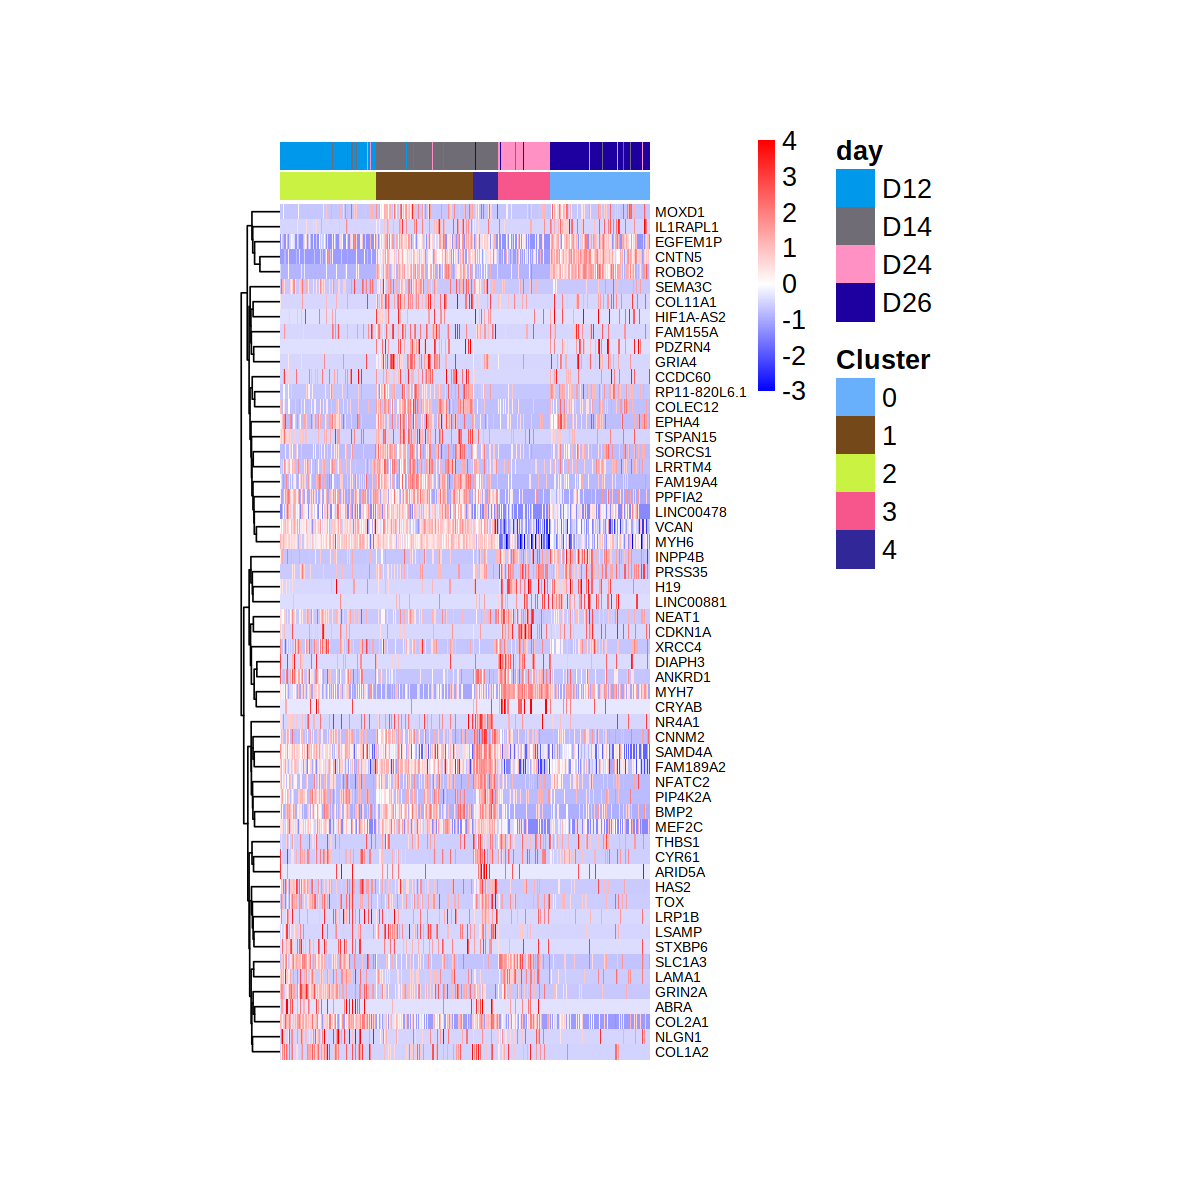

In [457]:
ann_colors <- list(
    day = c("D12" = "#0098EA", "D14" = "#706C75", "D24" = "#FF91C4", "D26" = "#1D009F"),
    Cluster = c("0" = "#68AFFC",
                "1" = "#754819",
                "2" = "#CAF243",
                "3" = "#F6568B",
                "4" = "#322799"
               )
)
pheatmap(top_marker.mat.ordered, scale = "none",
         cluster_rows = TRUE,
         cluster_cols = FALSE,
         annotation_col = top.marker.metdata[, c("Cluster", "day")],
         labels_col = top.marker.metdata$Cluster,
         cellheight = 9,
         cellwidth = 0.05,
         fontsize_row = 8,
         color = my_palette,
         breaks = my_breaks,
         annotation_names_col = FALSE,
         show_colnames = FALSE,
         annotation_colors = ann_colors,
         border_color = NA,
         fontsize = 16,
         treeheight_row = 20
        )


if (SAVE) {
    pheatmap(top_marker.mat.ordered, scale = "none",
         cluster_rows = TRUE,
         cluster_cols = FALSE,
         annotation_col = top.marker.metdata[, c("Cluster", "day")],
         labels_col = top.marker.metdata$Cluster,
         cellheight = 9,
         cellwidth = 0.05,
         fontsize_row = 8,
         color = my_palette,
         breaks = my_breaks,
         annotation_names_col = FALSE,
         show_colnames = FALSE,
         annotation_colors = ann_colors,
         border_color = NA,
         fontsize = 16,
         treeheight_row = 20,
         filename = glue("{PDF_DIR}/supp_figure_7G_exp5_de_genes.pdf"),
         width = 10, height=8, dpi = 300
        )
    pheatmap(top_marker.mat.ordered, scale = "none",
         cluster_rows = TRUE,
         cluster_cols = FALSE,
         annotation_col = top.marker.metdata[, c("Cluster", "day")],
         labels_col = top.marker.metdata$Cluster,
         cellheight = 9,
         cellwidth = 0.05,
         fontsize_row = 8,
         color = my_palette,
         breaks = my_breaks,
         annotation_names_col = FALSE,
         show_colnames = FALSE,
         annotation_colors = ann_colors,
         border_color = NA,
         fontsize = 16,
         treeheight_row = 20,
         filename = glue("{PNG_DIR}/supp_figure_7G_exp5_de_genes.png"),
         width = 10, height=8, dpi = 300
        )
}


